# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 63446 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 63446) |           | Elapsed Time: 0:00:27 ETA:  20 days, 0:20:13

  0% (   82 of 63446) |                    | Elapsed Time: 0:00:28 ETA:  0:12:42

  0% (  162 of 63446) |                    | Elapsed Time: 0:00:29 ETA:  0:12:47

  0% (  235 of 63446) |                    | Elapsed Time: 0:00:30 ETA:  0:13:09

  0% (  307 of 63446) |                    | Elapsed Time: 0:00:31 ETA:  0:13:22

  0% (  376 of 63446) |                    | Elapsed Time: 0:00:32 ETA:  0:13:37

  0% (  450 of 63446) |                    | Elapsed Time: 0:00:33 ETA:  0:13:38

  0% (  523 of 63446) |                    | Elapsed Time: 0:00:34 ETA:  0:13:41

  0% (  597 of 63446) |                    | Elapsed Time: 0:00:35 ETA:  0:13:41

  1% (  670 of 63446) |                    | Elapsed Time: 0:00:36 ETA:  0:13:41

  1% (  742 of 63446) |                    | Elapsed Time: 0:00:37 ETA:  0:13:51

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:38 ETA:  0:14:01

  1% (  869 of 63446) |                    | Elapsed Time: 0:00:39 ETA:  0:13:58

  1% (  943 of 63446) |                    | Elapsed Time: 0:00:40 ETA:  0:13:54

  1% ( 1015 of 63446) |                    | Elapsed Time: 0:00:41 ETA:  0:13:50

  1% ( 1090 of 63446) |                    | Elapsed Time: 0:00:42 ETA:  0:13:48

  1% ( 1165 of 63446) |                    | Elapsed Time: 0:00:43 ETA:  0:13:43

  1% ( 1239 of 63446) |                    | Elapsed Time: 0:00:44 ETA:  0:13:42

  2% ( 1314 of 63446) |                    | Elapsed Time: 0:00:45 ETA:  0:13:38

  2% ( 1383 of 63446) |                    | Elapsed Time: 0:00:46 ETA:  0:13:41

  2% ( 1459 of 63446) |                    | Elapsed Time: 0:00:47 ETA:  0:13:35

  2% ( 1536 of 63446) |                    | Elapsed Time: 0:00:48 ETA:  0:13:32

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:00:48 ETA:  0:13:32

  2% ( 1664 of 63446) |                    | Elapsed Time: 0:00:49 ETA:  0:13:24

  2% ( 1739 of 63446) |                    | Elapsed Time: 0:00:50 ETA:  0:13:23

  2% ( 1817 of 63446) |                    | Elapsed Time: 0:00:51 ETA:  0:13:18

  2% ( 1891 of 63446) |                    | Elapsed Time: 0:00:52 ETA:  0:13:17

  3% ( 1957 of 63446) |                    | Elapsed Time: 0:00:53 ETA:  0:13:29

  3% ( 2022 of 63446) |                    | Elapsed Time: 0:00:54 ETA:  0:13:34

  3% ( 2085 of 63446) |                    | Elapsed Time: 0:00:55 ETA:  0:13:51

  3% ( 2149 of 63446) |                    | Elapsed Time: 0:00:56 ETA:  0:14:08

  3% ( 2213 of 63446) |                    | Elapsed Time: 0:00:57 ETA:  0:14:20

  3% ( 2275 of 63446) |                    | Elapsed Time: 0:00:58 ETA:  0:14:42

  3% ( 2280 of 63446) |                    | Elapsed Time: 0:00:59 ETA:  0:16:43

  3% ( 2343 of 63446) |                    | Elapsed Time: 0:01:00 ETA:  0:17:12

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:01:01 ETA:  0:17:43

  3% ( 2444 of 63446) |                    | Elapsed Time: 0:01:02 ETA:  0:17:46

  3% ( 2511 of 63446) |                    | Elapsed Time: 0:01:03 ETA:  0:17:40

  4% ( 2581 of 63446) |                    | Elapsed Time: 0:01:04 ETA:  0:17:24

  4% ( 2649 of 63446) |                    | Elapsed Time: 0:01:05 ETA:  0:17:14

  4% ( 2714 of 63446) |                    | Elapsed Time: 0:01:06 ETA:  0:17:10

  4% ( 2781 of 63446) |                    | Elapsed Time: 0:01:07 ETA:  0:16:58

  4% ( 2849 of 63446) |                    | Elapsed Time: 0:01:08 ETA:  0:14:57

  4% ( 2919 of 63446) |                    | Elapsed Time: 0:01:09 ETA:  0:14:44

  4% ( 2989 of 63446) |                    | Elapsed Time: 0:01:10 ETA:  0:14:33

  4% ( 3057 of 63446) |                    | Elapsed Time: 0:01:11 ETA:  0:14:26

  4% ( 3126 of 63446) |                    | Elapsed Time: 0:01:12 ETA:  0:14:23

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:01:13 ETA:  0:14:23

  5% ( 3246 of 63446) |#                   | Elapsed Time: 0:01:14 ETA:  0:14:15

  5% ( 3315 of 63446) |#                   | Elapsed Time: 0:01:15 ETA:  0:14:08

  5% ( 3388 of 63446) |#                   | Elapsed Time: 0:01:16 ETA:  0:13:59

  5% ( 3460 of 63446) |#                   | Elapsed Time: 0:01:17 ETA:  0:13:53

  5% ( 3532 of 63446) |#                   | Elapsed Time: 0:01:18 ETA:  0:13:49

  5% ( 3613 of 63446) |#                   | Elapsed Time: 0:01:19 ETA:  0:13:31

  5% ( 3696 of 63446) |#                   | Elapsed Time: 0:01:20 ETA:  0:13:08

  5% ( 3779 of 63446) |#                   | Elapsed Time: 0:01:21 ETA:  0:12:48

  6% ( 3862 of 63446) |#                   | Elapsed Time: 0:01:22 ETA:  0:12:33

  6% ( 3943 of 63446) |#                   | Elapsed Time: 0:01:23 ETA:  0:12:22

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:01:23 ETA:  0:12:07

  6% ( 4051 of 63446) |#                   | Elapsed Time: 0:01:24 ETA:  0:11:51

  6% ( 4136 of 63446) |#                   | Elapsed Time: 0:01:25 ETA:  0:11:34

  6% ( 4218 of 63446) |#                   | Elapsed Time: 0:01:26 ETA:  0:11:22

  6% ( 4303 of 63446) |#                   | Elapsed Time: 0:01:27 ETA:  0:11:17

  6% ( 4384 of 63446) |#                   | Elapsed Time: 0:01:28 ETA:  0:11:19

  7% ( 4468 of 63446) |#                   | Elapsed Time: 0:01:29 ETA:  0:11:18

  7% ( 4549 of 63446) |#                   | Elapsed Time: 0:01:30 ETA:  0:11:19

  7% ( 4626 of 63446) |#                   | Elapsed Time: 0:01:31 ETA:  0:11:22

  7% ( 4702 of 63446) |#                   | Elapsed Time: 0:01:32 ETA:  0:11:29

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:01:33 ETA:  0:11:46

  7% ( 4830 of 63446) |#                   | Elapsed Time: 0:01:34 ETA:  0:12:01

  7% ( 4896 of 63446) |#                   | Elapsed Time: 0:01:35 ETA:  0:12:20

  7% ( 4961 of 63446) |#                   | Elapsed Time: 0:01:36 ETA:  0:12:45

  7% ( 5032 of 63446) |#                   | Elapsed Time: 0:01:37 ETA:  0:12:57

  8% ( 5105 of 63446) |#                   | Elapsed Time: 0:01:38 ETA:  0:13:11

  8% ( 5183 of 63446) |#                   | Elapsed Time: 0:01:39 ETA:  0:13:13

  8% ( 5262 of 63446) |#                   | Elapsed Time: 0:01:40 ETA:  0:13:10

  8% ( 5337 of 63446) |#                   | Elapsed Time: 0:01:41 ETA:  0:13:09

  8% ( 5414 of 63446) |#                   | Elapsed Time: 0:01:42 ETA:  0:12:56

  8% ( 5493 of 63446) |#                   | Elapsed Time: 0:01:43 ETA:  0:12:44

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:01:44 ETA:  0:12:35

  8% ( 5627 of 63446) |#                   | Elapsed Time: 0:01:45 ETA:  0:12:21

  8% ( 5705 of 63446) |#                   | Elapsed Time: 0:01:46 ETA:  0:12:12

  9% ( 5734 of 63446) |#                   | Elapsed Time: 0:01:47 ETA:  0:13:58

  9% ( 5808 of 63446) |#                   | Elapsed Time: 0:01:48 ETA:  0:14:03

  9% ( 5885 of 63446) |#                   | Elapsed Time: 0:01:49 ETA:  0:14:05

  9% ( 5954 of 63446) |#                   | Elapsed Time: 0:01:50 ETA:  0:14:14

  9% ( 6029 of 63446) |#                   | Elapsed Time: 0:01:51 ETA:  0:14:16

  9% ( 6103 of 63446) |#                   | Elapsed Time: 0:01:52 ETA:  0:14:22

  9% ( 6170 of 63446) |#                   | Elapsed Time: 0:01:54 ETA:  0:14:27

  9% ( 6240 of 63446) |#                   | Elapsed Time: 0:01:55 ETA:  0:14:33

  9% ( 6313 of 63446) |#                   | Elapsed Time: 0:01:56 ETA:  0:14:40

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:56 ETA:  0:12:52

 10% ( 6410 of 63446) |##                  | Elapsed Time: 0:01:57 ETA:  0:13:06

 10% ( 6475 of 63446) |##                  | Elapsed Time: 0:01:58 ETA:  0:13:24

 10% ( 6538 of 63446) |##                  | Elapsed Time: 0:01:59 ETA:  0:13:31

 10% ( 6600 of 63446) |##                  | Elapsed Time: 0:02:00 ETA:  0:13:51

 10% ( 6669 of 63446) |##                  | Elapsed Time: 0:02:01 ETA:  0:14:00

 10% ( 6737 of 63446) |##                  | Elapsed Time: 0:02:02 ETA:  0:13:56

 10% ( 6796 of 63446) |##                  | Elapsed Time: 0:02:03 ETA:  0:14:16

 10% ( 6856 of 63446) |##                  | Elapsed Time: 0:02:04 ETA:  0:14:38

 10% ( 6918 of 63446) |##                  | Elapsed Time: 0:02:05 ETA:  0:14:40

 10% ( 6977 of 63446) |##                  | Elapsed Time: 0:02:06 ETA:  0:14:49

 11% ( 7038 of 63446) |##                  | Elapsed Time: 0:02:07 ETA:  0:14:56

 11% ( 7103 of 63446) |##                  | Elapsed Time: 0:02:08 ETA:  0:14:52

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:02:09 ETA:  0:14:44

 11% ( 7221 of 63446) |##                  | Elapsed Time: 0:02:10 ETA:  0:14:17

 11% ( 7291 of 63446) |##                  | Elapsed Time: 0:02:11 ETA:  0:14:12

 11% ( 7360 of 63446) |##                  | Elapsed Time: 0:02:12 ETA:  0:13:52

 11% ( 7431 of 63446) |##                  | Elapsed Time: 0:02:13 ETA:  0:13:32

 11% ( 7500 of 63446) |##                  | Elapsed Time: 0:02:14 ETA:  0:13:20

 11% ( 7568 of 63446) |##                  | Elapsed Time: 0:02:15 ETA:  0:13:05

 12% ( 7640 of 63446) |##                  | Elapsed Time: 0:02:16 ETA:  0:12:46

 12% ( 7714 of 63446) |##                  | Elapsed Time: 0:02:17 ETA:  0:12:32

 12% ( 7786 of 63446) |##                  | Elapsed Time: 0:02:18 ETA:  0:12:29

 12% ( 7860 of 63446) |##                  | Elapsed Time: 0:02:19 ETA:  0:12:40

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:02:20 ETA:  0:12:25

 12% ( 8012 of 63446) |##                  | Elapsed Time: 0:02:21 ETA:  0:12:07

 12% ( 8083 of 63446) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:05

 12% ( 8153 of 63446) |##                  | Elapsed Time: 0:02:23 ETA:  0:12:03

 12% ( 8223 of 63446) |##                  | Elapsed Time: 0:02:24 ETA:  0:12:00

 13% ( 8295 of 63446) |##                  | Elapsed Time: 0:02:25 ETA:  0:11:59

 13% ( 8367 of 63446) |##                  | Elapsed Time: 0:02:26 ETA:  0:12:01

 13% ( 8440 of 63446) |##                  | Elapsed Time: 0:02:27 ETA:  0:11:58

 13% ( 8512 of 63446) |##                  | Elapsed Time: 0:02:28 ETA:  0:12:00

 13% ( 8585 of 63446) |##                  | Elapsed Time: 0:02:29 ETA:  0:12:09

 13% ( 8658 of 63446) |##                  | Elapsed Time: 0:02:30 ETA:  0:12:19

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:02:31 ETA:  0:12:15

 13% ( 8799 of 63446) |##                  | Elapsed Time: 0:02:32 ETA:  0:12:07

 13% ( 8875 of 63446) |##                  | Elapsed Time: 0:02:33 ETA:  0:11:59

 14% ( 8949 of 63446) |##                  | Elapsed Time: 0:02:34 ETA:  0:11:54

 14% ( 9024 of 63446) |##                  | Elapsed Time: 0:02:35 ETA:  0:11:49

 14% ( 9099 of 63446) |##                  | Elapsed Time: 0:02:36 ETA:  0:11:46

 14% ( 9172 of 63446) |##                  | Elapsed Time: 0:02:37 ETA:  0:11:45

 14% ( 9246 of 63446) |##                  | Elapsed Time: 0:02:38 ETA:  0:11:42

 14% ( 9318 of 63446) |##                  | Elapsed Time: 0:02:39 ETA:  0:11:43

 14% ( 9389 of 63446) |##                  | Elapsed Time: 0:02:40 ETA:  0:11:45

 14% ( 9463 of 63446) |##                  | Elapsed Time: 0:02:41 ETA:  0:11:46

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:02:41 ETA:  0:11:49

 15% ( 9591 of 63446) |###                 | Elapsed Time: 0:02:42 ETA:  0:11:48

 15% ( 9665 of 63446) |###                 | Elapsed Time: 0:02:43 ETA:  0:11:49

 15% ( 9737 of 63446) |###                 | Elapsed Time: 0:02:44 ETA:  0:11:51

 15% ( 9808 of 63446) |###                 | Elapsed Time: 0:02:45 ETA:  0:11:52

 15% ( 9883 of 63446) |###                 | Elapsed Time: 0:02:46 ETA:  0:11:50

 15% ( 9957 of 63446) |###                 | Elapsed Time: 0:02:47 ETA:  0:11:46

 15% ( 9986 of 63446) |###                 | Elapsed Time: 0:02:49 ETA:  0:14:19

 15% (10056 of 63446) |###                 | Elapsed Time: 0:02:50 ETA:  0:14:25

 15% (10124 of 63446) |###                 | Elapsed Time: 0:02:51 ETA:  0:14:28

 16% (10192 of 63446) |###                 | Elapsed Time: 0:02:52 ETA:  0:14:36

 16% (10268 of 63446) |###                 | Elapsed Time: 0:02:53 ETA:  0:14:31

 16% (10310 of 63446) |###                 | Elapsed Time: 0:02:54 ETA:  0:14:34

 16% (10389 of 63446) |###                 | Elapsed Time: 0:02:55 ETA:  0:14:20

 16% (10461 of 63446) |###                 | Elapsed Time: 0:02:56 ETA:  0:14:24

 16% (10539 of 63446) |###                 | Elapsed Time: 0:02:57 ETA:  0:14:16

 16% (10615 of 63446) |###                 | Elapsed Time: 0:02:58 ETA:  0:11:29

 16% (10693 of 63446) |###                 | Elapsed Time: 0:02:59 ETA:  0:11:18

 16% (10771 of 63446) |###                 | Elapsed Time: 0:03:00 ETA:  0:11:03

 17% (10848 of 63446) |###                 | Elapsed Time: 0:03:01 ETA:  0:10:51

 17% (10927 of 63446) |###                 | Elapsed Time: 0:03:02 ETA:  0:10:47

 17% (11005 of 63446) |###                 | Elapsed Time: 0:03:03 ETA:  0:10:45

 17% (11081 of 63446) |###                 | Elapsed Time: 0:03:04 ETA:  0:10:47

 17% (11104 of 63446) |###                 | Elapsed Time: 0:03:04 ETA:  0:10:40

 17% (11182 of 63446) |###                 | Elapsed Time: 0:03:05 ETA:  0:10:39

 17% (11257 of 63446) |###                 | Elapsed Time: 0:03:06 ETA:  0:10:40

 17% (11331 of 63446) |###                 | Elapsed Time: 0:03:07 ETA:  0:10:43

 17% (11404 of 63446) |###                 | Elapsed Time: 0:03:08 ETA:  0:10:49

 18% (11477 of 63446) |###                 | Elapsed Time: 0:03:09 ETA:  0:10:52

 18% (11550 of 63446) |###                 | Elapsed Time: 0:03:10 ETA:  0:10:59

 18% (11623 of 63446) |###                 | Elapsed Time: 0:03:11 ETA:  0:11:05

 18% (11698 of 63446) |###                 | Elapsed Time: 0:03:12 ETA:  0:11:05

 18% (11774 of 63446) |###                 | Elapsed Time: 0:03:13 ETA:  0:11:04

 18% (11847 of 63446) |###                 | Elapsed Time: 0:03:14 ETA:  0:11:09

 18% (11897 of 63446) |###                 | Elapsed Time: 0:03:15 ETA:  0:11:09

 18% (11973 of 63446) |###                 | Elapsed Time: 0:03:16 ETA:  0:11:05

 18% (12051 of 63446) |###                 | Elapsed Time: 0:03:17 ETA:  0:10:57

 19% (12127 of 63446) |###                 | Elapsed Time: 0:03:18 ETA:  0:10:53

 19% (12203 of 63446) |###                 | Elapsed Time: 0:03:19 ETA:  0:10:48

 19% (12278 of 63446) |###                 | Elapsed Time: 0:03:20 ETA:  0:10:44

 19% (12351 of 63446) |###                 | Elapsed Time: 0:03:21 ETA:  0:10:46

 19% (12428 of 63446) |###                 | Elapsed Time: 0:03:22 ETA:  0:10:44

 19% (12506 of 63446) |###                 | Elapsed Time: 0:03:23 ETA:  0:10:37

 19% (12583 of 63446) |###                 | Elapsed Time: 0:03:24 ETA:  0:10:33

 19% (12659 of 63446) |###                 | Elapsed Time: 0:03:25 ETA:  0:10:31

 20% (12690 of 63446) |####                | Elapsed Time: 0:03:25 ETA:  0:10:34

 20% (12767 of 63446) |####                | Elapsed Time: 0:03:27 ETA:  0:10:31

 20% (12846 of 63446) |####                | Elapsed Time: 0:03:28 ETA:  0:10:27

 20% (12924 of 63446) |####                | Elapsed Time: 0:03:29 ETA:  0:10:21

 20% (13003 of 63446) |####                | Elapsed Time: 0:03:30 ETA:  0:10:13

 20% (13082 of 63446) |####                | Elapsed Time: 0:03:31 ETA:  0:10:09

 20% (13159 of 63446) |####                | Elapsed Time: 0:03:32 ETA:  0:10:09

 20% (13238 of 63446) |####                | Elapsed Time: 0:03:33 ETA:  0:10:06

 20% (13317 of 63446) |####                | Elapsed Time: 0:03:34 ETA:  0:10:02

 21% (13397 of 63446) |####                | Elapsed Time: 0:03:35 ETA:  0:09:58

 21% (13483 of 63446) |####                | Elapsed Time: 0:03:36 ETA:  0:09:54

 21% (13561 of 63446) |####                | Elapsed Time: 0:03:37 ETA:  0:09:53

 21% (13639 of 63446) |####                | Elapsed Time: 0:03:38 ETA:  0:09:54

 21% (13717 of 63446) |####                | Elapsed Time: 0:03:39 ETA:  0:09:53

 21% (13792 of 63446) |####                | Elapsed Time: 0:03:40 ETA:  0:09:54

 21% (13868 of 63446) |####                | Elapsed Time: 0:03:41 ETA:  0:09:57

 21% (13942 of 63446) |####                | Elapsed Time: 0:03:42 ETA:  0:10:02

 22% (14016 of 63446) |####                | Elapsed Time: 0:03:43 ETA:  0:10:09

 22% (14094 of 63446) |####                | Elapsed Time: 0:03:44 ETA:  0:10:10

 22% (14166 of 63446) |####                | Elapsed Time: 0:03:45 ETA:  0:10:14

 22% (14237 of 63446) |####                | Elapsed Time: 0:03:46 ETA:  0:10:23

 22% (14276 of 63446) |####                | Elapsed Time: 0:03:46 ETA:  0:10:30

 22% (14348 of 63446) |####                | Elapsed Time: 0:03:47 ETA:  0:10:37

 22% (14417 of 63446) |####                | Elapsed Time: 0:03:48 ETA:  0:10:44

 22% (14484 of 63446) |####                | Elapsed Time: 0:03:49 ETA:  0:10:57

 22% (14551 of 63446) |####                | Elapsed Time: 0:03:50 ETA:  0:11:05

 23% (14614 of 63446) |####                | Elapsed Time: 0:03:51 ETA:  0:11:22

 23% (14686 of 63446) |####                | Elapsed Time: 0:03:52 ETA:  0:11:29

 23% (14755 of 63446) |####                | Elapsed Time: 0:03:53 ETA:  0:11:34

 23% (14829 of 63446) |####                | Elapsed Time: 0:03:54 ETA:  0:11:28

 23% (14897 of 63446) |####                | Elapsed Time: 0:03:55 ETA:  0:11:30

 23% (14958 of 63446) |####                | Elapsed Time: 0:03:56 ETA:  0:11:46

 23% (15029 of 63446) |####                | Elapsed Time: 0:03:57 ETA:  0:11:42

 23% (15069 of 63446) |####                | Elapsed Time: 0:03:58 ETA:  0:11:36

 23% (15140 of 63446) |####                | Elapsed Time: 0:03:59 ETA:  0:11:30

 23% (15211 of 63446) |####                | Elapsed Time: 0:04:00 ETA:  0:11:15

 24% (15273 of 63446) |####                | Elapsed Time: 0:04:03 ETA:  0:14:35

 24% (15343 of 63446) |####                | Elapsed Time: 0:04:04 ETA:  0:14:31

 24% (15408 of 63446) |####                | Elapsed Time: 0:04:05 ETA:  0:14:47

 24% (15471 of 63446) |####                | Elapsed Time: 0:04:06 ETA:  0:14:55

 24% (15538 of 63446) |####                | Elapsed Time: 0:04:07 ETA:  0:14:42

 24% (15603 of 63446) |####                | Elapsed Time: 0:04:08 ETA:  0:14:54

 24% (15667 of 63446) |####                | Elapsed Time: 0:04:09 ETA:  0:14:54

 24% (15736 of 63446) |####                | Elapsed Time: 0:04:10 ETA:  0:14:56

 24% (15800 of 63446) |####                | Elapsed Time: 0:04:11 ETA:  0:15:10

 25% (15862 of 63446) |#####               | Elapsed Time: 0:04:12 ETA:  0:11:59

 25% (15927 of 63446) |#####               | Elapsed Time: 0:04:13 ETA:  0:12:07

 25% (15990 of 63446) |#####               | Elapsed Time: 0:04:14 ETA:  0:12:09

 25% (16049 of 63446) |#####               | Elapsed Time: 0:04:15 ETA:  0:12:15

 25% (16117 of 63446) |#####               | Elapsed Time: 0:04:16 ETA:  0:12:13

 25% (16186 of 63446) |#####               | Elapsed Time: 0:04:17 ETA:  0:12:04

 25% (16255 of 63446) |#####               | Elapsed Time: 0:04:18 ETA:  0:11:55

 25% (16327 of 63446) |#####               | Elapsed Time: 0:04:19 ETA:  0:11:50

 25% (16397 of 63446) |#####               | Elapsed Time: 0:04:20 ETA:  0:11:38

 25% (16465 of 63446) |#####               | Elapsed Time: 0:04:21 ETA:  0:11:32

 26% (16534 of 63446) |#####               | Elapsed Time: 0:04:22 ETA:  0:11:24

 26% (16606 of 63446) |#####               | Elapsed Time: 0:04:23 ETA:  0:11:09

 26% (16655 of 63446) |#####               | Elapsed Time: 0:04:23 ETA:  0:10:51

 26% (16728 of 63446) |#####               | Elapsed Time: 0:04:24 ETA:  0:10:42

 26% (16805 of 63446) |#####               | Elapsed Time: 0:04:25 ETA:  0:10:30

 26% (16883 of 63446) |#####               | Elapsed Time: 0:04:26 ETA:  0:10:16

 26% (16959 of 63446) |#####               | Elapsed Time: 0:04:27 ETA:  0:10:10

 26% (17027 of 63446) |#####               | Elapsed Time: 0:04:28 ETA:  0:10:12

 26% (17093 of 63446) |#####               | Elapsed Time: 0:04:29 ETA:  0:10:14

 27% (17160 of 63446) |#####               | Elapsed Time: 0:04:30 ETA:  0:10:16

 27% (17234 of 63446) |#####               | Elapsed Time: 0:04:31 ETA:  0:10:11

 27% (17307 of 63446) |#####               | Elapsed Time: 0:04:32 ETA:  0:10:09

 27% (17378 of 63446) |#####               | Elapsed Time: 0:04:34 ETA:  0:10:10

 27% (17448 of 63446) |#####               | Elapsed Time: 0:04:34 ETA:  0:10:11

 27% (17524 of 63446) |#####               | Elapsed Time: 0:04:35 ETA:  0:10:13

 27% (17599 of 63446) |#####               | Elapsed Time: 0:04:36 ETA:  0:10:13

 27% (17674 of 63446) |#####               | Elapsed Time: 0:04:37 ETA:  0:10:03

 27% (17746 of 63446) |#####               | Elapsed Time: 0:04:38 ETA:  0:09:54

 28% (17822 of 63446) |#####               | Elapsed Time: 0:04:39 ETA:  0:09:41

 28% (17897 of 63446) |#####               | Elapsed Time: 0:04:40 ETA:  0:09:39

 28% (17969 of 63446) |#####               | Elapsed Time: 0:04:41 ETA:  0:09:40

 28% (18031 of 63446) |#####               | Elapsed Time: 0:04:43 ETA:  0:09:52

 28% (18101 of 63446) |#####               | Elapsed Time: 0:04:44 ETA:  0:09:59

 28% (18181 of 63446) |#####               | Elapsed Time: 0:04:45 ETA:  0:09:52

 28% (18241 of 63446) |#####               | Elapsed Time: 0:04:45 ETA:  0:09:51

 28% (18313 of 63446) |#####               | Elapsed Time: 0:04:46 ETA:  0:09:55

 28% (18387 of 63446) |#####               | Elapsed Time: 0:04:47 ETA:  0:09:51

 29% (18458 of 63446) |#####               | Elapsed Time: 0:04:48 ETA:  0:09:56

 29% (18534 of 63446) |#####               | Elapsed Time: 0:04:49 ETA:  0:09:54

 29% (18605 of 63446) |#####               | Elapsed Time: 0:04:50 ETA:  0:09:54

 29% (18670 of 63446) |#####               | Elapsed Time: 0:04:51 ETA:  0:09:48

 29% (18746 of 63446) |#####               | Elapsed Time: 0:04:52 ETA:  0:09:38

 29% (18822 of 63446) |#####               | Elapsed Time: 0:04:53 ETA:  0:09:43

 29% (18903 of 63446) |#####               | Elapsed Time: 0:04:54 ETA:  0:09:34

 29% (18985 of 63446) |#####               | Elapsed Time: 0:04:55 ETA:  0:09:19

 30% (19034 of 63446) |######              | Elapsed Time: 0:04:56 ETA:  0:09:16

 30% (19107 of 63446) |######              | Elapsed Time: 0:04:57 ETA:  0:09:14

 30% (19177 of 63446) |######              | Elapsed Time: 0:04:58 ETA:  0:09:20

 30% (19247 of 63446) |######              | Elapsed Time: 0:04:59 ETA:  0:09:20

 30% (19327 of 63446) |######              | Elapsed Time: 0:05:00 ETA:  0:09:00

 30% (19407 of 63446) |######              | Elapsed Time: 0:05:01 ETA:  0:08:54

 30% (19480 of 63446) |######              | Elapsed Time: 0:05:02 ETA:  0:08:56

 30% (19558 of 63446) |######              | Elapsed Time: 0:05:03 ETA:  0:08:58

 30% (19647 of 63446) |######              | Elapsed Time: 0:05:04 ETA:  0:08:49

 31% (19715 of 63446) |######              | Elapsed Time: 0:05:05 ETA:  0:08:57

 31% (19779 of 63446) |######              | Elapsed Time: 0:05:06 ETA:  0:09:07

 31% (19827 of 63446) |######              | Elapsed Time: 0:05:07 ETA:  0:09:13

 31% (19896 of 63446) |######              | Elapsed Time: 0:05:08 ETA:  0:09:14

 31% (19971 of 63446) |######              | Elapsed Time: 0:05:09 ETA:  0:09:20

 31% (20046 of 63446) |######              | Elapsed Time: 0:05:10 ETA:  0:09:25

 31% (20123 of 63446) |######              | Elapsed Time: 0:05:11 ETA:  0:09:20

 31% (20204 of 63446) |######              | Elapsed Time: 0:05:12 ETA:  0:09:15

 31% (20280 of 63446) |######              | Elapsed Time: 0:05:13 ETA:  0:09:32

 32% (20357 of 63446) |######              | Elapsed Time: 0:05:14 ETA:  0:09:19

 32% (20441 of 63446) |######              | Elapsed Time: 0:05:15 ETA:  0:08:52

 32% (20511 of 63446) |######              | Elapsed Time: 0:05:16 ETA:  0:08:47

 32% (20587 of 63446) |######              | Elapsed Time: 0:05:17 ETA:  0:08:36

 32% (20620 of 63446) |######              | Elapsed Time: 0:05:17 ETA:  0:08:35

 32% (20699 of 63446) |######              | Elapsed Time: 0:05:18 ETA:  0:08:29

 32% (20778 of 63446) |######              | Elapsed Time: 0:05:19 ETA:  0:08:24

 32% (20857 of 63446) |######              | Elapsed Time: 0:05:20 ETA:  0:08:25

 32% (20934 of 63446) |######              | Elapsed Time: 0:05:21 ETA:  0:08:23

 33% (21009 of 63446) |######              | Elapsed Time: 0:05:22 ETA:  0:08:24

 33% (21086 of 63446) |######              | Elapsed Time: 0:05:23 ETA:  0:08:33

 33% (21158 of 63446) |######              | Elapsed Time: 0:05:24 ETA:  0:08:29

 33% (21230 of 63446) |######              | Elapsed Time: 0:05:25 ETA:  0:08:33

 33% (21305 of 63446) |######              | Elapsed Time: 0:05:27 ETA:  0:08:33

 33% (21377 of 63446) |######              | Elapsed Time: 0:05:28 ETA:  0:08:40

 33% (21414 of 63446) |######              | Elapsed Time: 0:05:28 ETA:  0:08:43

 33% (21486 of 63446) |######              | Elapsed Time: 0:05:29 ETA:  0:08:52

 33% (21555 of 63446) |######              | Elapsed Time: 0:05:30 ETA:  0:09:02

 34% (21620 of 63446) |######              | Elapsed Time: 0:05:31 ETA:  0:09:16

 34% (21688 of 63446) |######              | Elapsed Time: 0:05:32 ETA:  0:09:28

 34% (21753 of 63446) |######              | Elapsed Time: 0:05:33 ETA:  0:09:37

 34% (21767 of 63446) |######              | Elapsed Time: 0:05:36 ETA:  0:14:09

 34% (21837 of 63446) |######              | Elapsed Time: 0:05:37 ETA:  0:14:19

 34% (21906 of 63446) |######              | Elapsed Time: 0:05:38 ETA:  0:14:24

 34% (21975 of 63446) |######              | Elapsed Time: 0:05:39 ETA:  0:14:15

 34% (22044 of 63446) |######              | Elapsed Time: 0:05:40 ETA:  0:14:21

 34% (22107 of 63446) |######              | Elapsed Time: 0:05:41 ETA:  0:14:32

 34% (22183 of 63446) |######              | Elapsed Time: 0:05:42 ETA:  0:14:07

 35% (22207 of 63446) |#######             | Elapsed Time: 0:05:42 ETA:  0:14:26

 35% (22278 of 63446) |#######             | Elapsed Time: 0:05:43 ETA:  0:14:12

 35% (22360 of 63446) |#######             | Elapsed Time: 0:05:44 ETA:  0:09:15

 35% (22441 of 63446) |#######             | Elapsed Time: 0:05:45 ETA:  0:08:58

 35% (22519 of 63446) |#######             | Elapsed Time: 0:05:46 ETA:  0:08:44

 35% (22597 of 63446) |#######             | Elapsed Time: 0:05:47 ETA:  0:08:30

 35% (22663 of 63446) |#######             | Elapsed Time: 0:05:48 ETA:  0:08:33

 35% (22728 of 63446) |#######             | Elapsed Time: 0:05:49 ETA:  0:08:30

 35% (22801 of 63446) |#######             | Elapsed Time: 0:05:50 ETA:  0:08:33

 36% (22876 of 63446) |#######             | Elapsed Time: 0:05:51 ETA:  0:08:28

 36% (22954 of 63446) |#######             | Elapsed Time: 0:05:52 ETA:  0:08:18

 36% (23000 of 63446) |#######             | Elapsed Time: 0:05:53 ETA:  0:08:24

 36% (23081 of 63446) |#######             | Elapsed Time: 0:05:54 ETA:  0:08:23

 36% (23163 of 63446) |#######             | Elapsed Time: 0:05:55 ETA:  0:08:17

 36% (23240 of 63446) |#######             | Elapsed Time: 0:05:56 ETA:  0:08:17

 36% (23301 of 63446) |#######             | Elapsed Time: 0:05:57 ETA:  0:08:23

 36% (23363 of 63446) |#######             | Elapsed Time: 0:05:58 ETA:  0:08:26

 36% (23441 of 63446) |#######             | Elapsed Time: 0:05:59 ETA:  0:08:18

 37% (23516 of 63446) |#######             | Elapsed Time: 0:06:00 ETA:  0:08:17

 37% (23590 of 63446) |#######             | Elapsed Time: 0:06:01 ETA:  0:08:22

 37% (23656 of 63446) |#######             | Elapsed Time: 0:06:02 ETA:  0:08:34

 37% (23730 of 63446) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:43

 37% (23793 of 63446) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:51

 37% (23869 of 63446) |#######             | Elapsed Time: 0:06:05 ETA:  0:08:51

 37% (23945 of 63446) |#######             | Elapsed Time: 0:06:06 ETA:  0:08:28

 37% (24016 of 63446) |#######             | Elapsed Time: 0:06:07 ETA:  0:08:15

 37% (24089 of 63446) |#######             | Elapsed Time: 0:06:08 ETA:  0:08:21

 38% (24164 of 63446) |#######             | Elapsed Time: 0:06:09 ETA:  0:08:19

 38% (24237 of 63446) |#######             | Elapsed Time: 0:06:10 ETA:  0:08:19

 38% (24309 of 63446) |#######             | Elapsed Time: 0:06:11 ETA:  0:08:09

 38% (24382 of 63446) |#######             | Elapsed Time: 0:06:12 ETA:  0:08:10

 38% (24462 of 63446) |#######             | Elapsed Time: 0:06:13 ETA:  0:08:03

 38% (24542 of 63446) |#######             | Elapsed Time: 0:06:14 ETA:  0:07:57

 38% (24586 of 63446) |#######             | Elapsed Time: 0:06:14 ETA:  0:07:56

 38% (24663 of 63446) |#######             | Elapsed Time: 0:06:15 ETA:  0:07:48

 38% (24740 of 63446) |#######             | Elapsed Time: 0:06:16 ETA:  0:07:42

 39% (24817 of 63446) |#######             | Elapsed Time: 0:06:17 ETA:  0:07:38

 39% (24894 of 63446) |#######             | Elapsed Time: 0:06:18 ETA:  0:07:32

 39% (24964 of 63446) |#######             | Elapsed Time: 0:06:19 ETA:  0:07:34

 39% (25041 of 63446) |#######             | Elapsed Time: 0:06:20 ETA:  0:07:28

 39% (25110 of 63446) |#######             | Elapsed Time: 0:06:21 ETA:  0:07:41

 39% (25172 of 63446) |#######             | Elapsed Time: 0:06:22 ETA:  0:08:04

 39% (25237 of 63446) |#######             | Elapsed Time: 0:06:23 ETA:  0:08:18

 39% (25304 of 63446) |#######             | Elapsed Time: 0:06:24 ETA:  0:08:30

 40% (25379 of 63446) |########            | Elapsed Time: 0:06:25 ETA:  0:08:47

 40% (25453 of 63446) |########            | Elapsed Time: 0:06:26 ETA:  0:08:52

 40% (25532 of 63446) |########            | Elapsed Time: 0:06:27 ETA:  0:08:36

 40% (25611 of 63446) |########            | Elapsed Time: 0:06:28 ETA:  0:08:33

 40% (25687 of 63446) |########            | Elapsed Time: 0:06:29 ETA:  0:08:21

 40% (25767 of 63446) |########            | Elapsed Time: 0:06:30 ETA:  0:07:54

 40% (25847 of 63446) |########            | Elapsed Time: 0:06:31 ETA:  0:07:32

 40% (25923 of 63446) |########            | Elapsed Time: 0:06:32 ETA:  0:07:19

 40% (26003 of 63446) |########            | Elapsed Time: 0:06:33 ETA:  0:07:08

 41% (26080 of 63446) |########            | Elapsed Time: 0:06:34 ETA:  0:07:08

 41% (26172 of 63446) |########            | Elapsed Time: 0:06:35 ETA:  0:07:03

 41% (26249 of 63446) |########            | Elapsed Time: 0:06:37 ETA:  0:07:05

 41% (26329 of 63446) |########            | Elapsed Time: 0:06:38 ETA:  0:06:58

 41% (26402 of 63446) |########            | Elapsed Time: 0:06:39 ETA:  0:07:06

 41% (26474 of 63446) |########            | Elapsed Time: 0:06:40 ETA:  0:07:16

 41% (26551 of 63446) |########            | Elapsed Time: 0:06:41 ETA:  0:07:14

 41% (26629 of 63446) |########            | Elapsed Time: 0:06:42 ETA:  0:07:15

 42% (26711 of 63446) |########            | Elapsed Time: 0:06:43 ETA:  0:07:07

 42% (26792 of 63446) |########            | Elapsed Time: 0:06:44 ETA:  0:07:02

 42% (26871 of 63446) |########            | Elapsed Time: 0:06:45 ETA:  0:06:58

 42% (26965 of 63446) |########            | Elapsed Time: 0:06:46 ETA:  0:06:53

 42% (27046 of 63446) |########            | Elapsed Time: 0:06:47 ETA:  0:06:42

 42% (27126 of 63446) |########            | Elapsed Time: 0:06:48 ETA:  0:06:31

 42% (27205 of 63446) |########            | Elapsed Time: 0:06:49 ETA:  0:06:27

 43% (27282 of 63446) |########            | Elapsed Time: 0:06:50 ETA:  0:06:28

 43% (27358 of 63446) |########            | Elapsed Time: 0:06:51 ETA:  0:06:34

 43% (27432 of 63446) |########            | Elapsed Time: 0:06:52 ETA:  0:06:41

 43% (27508 of 63446) |########            | Elapsed Time: 0:06:53 ETA:  0:06:44

 43% (27581 of 63446) |########            | Elapsed Time: 0:06:54 ETA:  0:06:55

 43% (27653 of 63446) |########            | Elapsed Time: 0:06:55 ETA:  0:07:01

 43% (27734 of 63446) |########            | Elapsed Time: 0:06:56 ETA:  0:07:00

 43% (27758 of 63446) |########            | Elapsed Time: 0:06:56 ETA:  0:07:01

 43% (27837 of 63446) |########            | Elapsed Time: 0:06:57 ETA:  0:07:00

 43% (27912 of 63446) |########            | Elapsed Time: 0:06:58 ETA:  0:07:00

 44% (27986 of 63446) |########            | Elapsed Time: 0:06:59 ETA:  0:07:03

 44% (28062 of 63446) |########            | Elapsed Time: 0:07:00 ETA:  0:07:00

 44% (28136 of 63446) |########            | Elapsed Time: 0:07:01 ETA:  0:07:02

 44% (28216 of 63446) |########            | Elapsed Time: 0:07:02 ETA:  0:06:51

 44% (28290 of 63446) |########            | Elapsed Time: 0:07:03 ETA:  0:06:48

 44% (28366 of 63446) |########            | Elapsed Time: 0:07:04 ETA:  0:06:53

 44% (28440 of 63446) |########            | Elapsed Time: 0:07:05 ETA:  0:06:59

 44% (28507 of 63446) |########            | Elapsed Time: 0:07:06 ETA:  0:07:14

 45% (28551 of 63446) |#########           | Elapsed Time: 0:07:07 ETA:  0:07:15

 45% (28626 of 63446) |#########           | Elapsed Time: 0:07:08 ETA:  0:07:12

 45% (28705 of 63446) |#########           | Elapsed Time: 0:07:09 ETA:  0:07:07

 45% (28784 of 63446) |#########           | Elapsed Time: 0:07:10 ETA:  0:06:59

 45% (28864 of 63446) |#########           | Elapsed Time: 0:07:11 ETA:  0:06:58

 45% (28941 of 63446) |#########           | Elapsed Time: 0:07:12 ETA:  0:06:52

 45% (29015 of 63446) |#########           | Elapsed Time: 0:07:13 ETA:  0:06:54

 45% (29094 of 63446) |#########           | Elapsed Time: 0:07:14 ETA:  0:06:46

 45% (29152 of 63446) |#########           | Elapsed Time: 0:07:15 ETA:  0:06:56

 46% (29225 of 63446) |#########           | Elapsed Time: 0:07:16 ETA:  0:06:56

 46% (29296 of 63446) |#########           | Elapsed Time: 0:07:17 ETA:  0:07:01

 46% (29344 of 63446) |#########           | Elapsed Time: 0:07:18 ETA:  0:07:10

 46% (29411 of 63446) |#########           | Elapsed Time: 0:07:19 ETA:  0:07:25

 46% (29484 of 63446) |#########           | Elapsed Time: 0:07:20 ETA:  0:07:34

 46% (29566 of 63446) |#########           | Elapsed Time: 0:07:21 ETA:  0:07:26

 46% (29651 of 63446) |#########           | Elapsed Time: 0:07:22 ETA:  0:07:10

 46% (29721 of 63446) |#########           | Elapsed Time: 0:07:23 ETA:  0:07:21

 46% (29766 of 63446) |#########           | Elapsed Time: 0:07:26 ETA:  0:12:10

 47% (29840 of 63446) |#########           | Elapsed Time: 0:07:27 ETA:  0:12:06

 47% (29914 of 63446) |#########           | Elapsed Time: 0:07:28 ETA:  0:11:59

 47% (29990 of 63446) |#########           | Elapsed Time: 0:07:29 ETA:  0:11:40

 47% (30068 of 63446) |#########           | Elapsed Time: 0:07:30 ETA:  0:11:19

 47% (30137 of 63446) |#########           | Elapsed Time: 0:07:31 ETA:  0:11:16

 47% (30211 of 63446) |#########           | Elapsed Time: 0:07:32 ETA:  0:11:30

 47% (30285 of 63446) |#########           | Elapsed Time: 0:07:33 ETA:  0:11:48

 47% (30366 of 63446) |#########           | Elapsed Time: 0:07:34 ETA:  0:11:27

 47% (30441 of 63446) |#########           | Elapsed Time: 0:07:35 ETA:  0:06:27

 48% (30514 of 63446) |#########           | Elapsed Time: 0:07:36 ETA:  0:06:27

 48% (30586 of 63446) |#########           | Elapsed Time: 0:07:37 ETA:  0:06:29

 48% (30652 of 63446) |#########           | Elapsed Time: 0:07:38 ETA:  0:06:40

 48% (30728 of 63446) |#########           | Elapsed Time: 0:07:39 ETA:  0:06:42

 48% (30805 of 63446) |#########           | Elapsed Time: 0:07:40 ETA:  0:06:40

 48% (30883 of 63446) |#########           | Elapsed Time: 0:07:41 ETA:  0:06:33

 48% (30930 of 63446) |#########           | Elapsed Time: 0:07:42 ETA:  0:06:30

 48% (31008 of 63446) |#########           | Elapsed Time: 0:07:43 ETA:  0:06:33

 48% (31076 of 63446) |#########           | Elapsed Time: 0:07:44 ETA:  0:06:41

 49% (31146 of 63446) |#########           | Elapsed Time: 0:07:45 ETA:  0:06:45

 49% (31218 of 63446) |#########           | Elapsed Time: 0:07:46 ETA:  0:06:44

 49% (31284 of 63446) |#########           | Elapsed Time: 0:07:47 ETA:  0:06:44

 49% (31352 of 63446) |#########           | Elapsed Time: 0:07:48 ETA:  0:06:54

 49% (31418 of 63446) |#########           | Elapsed Time: 0:07:49 ETA:  0:07:10

 49% (31488 of 63446) |#########           | Elapsed Time: 0:07:50 ETA:  0:07:21

 49% (31552 of 63446) |#########           | Elapsed Time: 0:07:51 ETA:  0:07:36

 49% (31630 of 63446) |#########           | Elapsed Time: 0:07:52 ETA:  0:07:34

 49% (31704 of 63446) |#########           | Elapsed Time: 0:07:53 ETA:  0:07:25

 50% (31724 of 63446) |##########          | Elapsed Time: 0:07:53 ETA:  0:07:22

 50% (31801 of 63446) |##########          | Elapsed Time: 0:07:54 ETA:  0:07:12

 50% (31880 of 63446) |##########          | Elapsed Time: 0:07:55 ETA:  0:06:51

 50% (31961 of 63446) |##########          | Elapsed Time: 0:07:56 ETA:  0:06:31

 50% (32034 of 63446) |##########          | Elapsed Time: 0:07:57 ETA:  0:06:20

 50% (32099 of 63446) |##########          | Elapsed Time: 0:07:58 ETA:  0:06:25

 50% (32167 of 63446) |##########          | Elapsed Time: 0:07:59 ETA:  0:06:19

 50% (32241 of 63446) |##########          | Elapsed Time: 0:08:00 ETA:  0:06:23

 50% (32300 of 63446) |##########          | Elapsed Time: 0:08:01 ETA:  0:06:44

 51% (32362 of 63446) |##########          | Elapsed Time: 0:08:02 ETA:  0:06:58

 51% (32432 of 63446) |##########          | Elapsed Time: 0:08:03 ETA:  0:07:08

 51% (32493 of 63446) |##########          | Elapsed Time: 0:08:04 ETA:  0:07:34

 51% (32517 of 63446) |##########          | Elapsed Time: 0:08:05 ETA:  0:07:54

 51% (32592 of 63446) |##########          | Elapsed Time: 0:08:06 ETA:  0:07:49

 51% (32669 of 63446) |##########          | Elapsed Time: 0:08:07 ETA:  0:07:29

 51% (32744 of 63446) |##########          | Elapsed Time: 0:08:08 ETA:  0:07:15

 51% (32821 of 63446) |##########          | Elapsed Time: 0:08:09 ETA:  0:07:09

 51% (32895 of 63446) |##########          | Elapsed Time: 0:08:10 ETA:  0:06:45

 51% (32957 of 63446) |##########          | Elapsed Time: 0:08:11 ETA:  0:06:44

 52% (33029 of 63446) |##########          | Elapsed Time: 0:08:12 ETA:  0:06:40

 52% (33104 of 63446) |##########          | Elapsed Time: 0:08:13 ETA:  0:06:18

 52% (33183 of 63446) |##########          | Elapsed Time: 0:08:14 ETA:  0:06:08

 52% (33262 of 63446) |##########          | Elapsed Time: 0:08:15 ETA:  0:06:03

 52% (33310 of 63446) |##########          | Elapsed Time: 0:08:15 ETA:  0:05:58

 52% (33391 of 63446) |##########          | Elapsed Time: 0:08:16 ETA:  0:05:50

 52% (33463 of 63446) |##########          | Elapsed Time: 0:08:17 ETA:  0:05:55

 52% (33523 of 63446) |##########          | Elapsed Time: 0:08:18 ETA:  0:06:14

 52% (33591 of 63446) |##########          | Elapsed Time: 0:08:19 ETA:  0:06:06

 53% (33669 of 63446) |##########          | Elapsed Time: 0:08:20 ETA:  0:05:56

 53% (33745 of 63446) |##########          | Elapsed Time: 0:08:21 ETA:  0:05:53

 53% (33811 of 63446) |##########          | Elapsed Time: 0:08:22 ETA:  0:06:09

 53% (33870 of 63446) |##########          | Elapsed Time: 0:08:23 ETA:  0:06:37

 53% (33922 of 63446) |##########          | Elapsed Time: 0:08:24 ETA:  0:07:14

 53% (33980 of 63446) |##########          | Elapsed Time: 0:08:25 ETA:  0:07:51

 53% (34046 of 63446) |##########          | Elapsed Time: 0:08:26 ETA:  0:08:00

 53% (34103 of 63446) |##########          | Elapsed Time: 0:08:27 ETA:  0:07:33

 53% (34183 of 63446) |##########          | Elapsed Time: 0:08:28 ETA:  0:07:12

 53% (34248 of 63446) |##########          | Elapsed Time: 0:08:29 ETA:  0:07:32

 54% (34315 of 63446) |##########          | Elapsed Time: 0:08:30 ETA:  0:07:45

 54% (34381 of 63446) |##########          | Elapsed Time: 0:08:31 ETA:  0:07:45

 54% (34458 of 63446) |##########          | Elapsed Time: 0:08:32 ETA:  0:07:14

 54% (34535 of 63446) |##########          | Elapsed Time: 0:08:33 ETA:  0:06:34

 54% (34613 of 63446) |##########          | Elapsed Time: 0:08:34 ETA:  0:06:04

 54% (34691 of 63446) |##########          | Elapsed Time: 0:08:35 ETA:  0:05:46

 54% (34770 of 63446) |##########          | Elapsed Time: 0:08:36 ETA:  0:05:44

 54% (34842 of 63446) |##########          | Elapsed Time: 0:08:37 ETA:  0:05:53

 55% (34896 of 63446) |###########         | Elapsed Time: 0:08:38 ETA:  0:05:47

 55% (34973 of 63446) |###########         | Elapsed Time: 0:08:39 ETA:  0:05:33

 55% (35044 of 63446) |###########         | Elapsed Time: 0:08:40 ETA:  0:05:26

 55% (35111 of 63446) |###########         | Elapsed Time: 0:08:41 ETA:  0:05:37

 55% (35189 of 63446) |###########         | Elapsed Time: 0:08:42 ETA:  0:05:35

 55% (35265 of 63446) |###########         | Elapsed Time: 0:08:43 ETA:  0:05:37

 55% (35343 of 63446) |###########         | Elapsed Time: 0:08:44 ETA:  0:05:37

 55% (35422 of 63446) |###########         | Elapsed Time: 0:08:45 ETA:  0:05:36

 55% (35498 of 63446) |###########         | Elapsed Time: 0:08:46 ETA:  0:05:29

 56% (35573 of 63446) |###########         | Elapsed Time: 0:08:47 ETA:  0:05:21

 56% (35644 of 63446) |###########         | Elapsed Time: 0:08:48 ETA:  0:05:28

 56% (35689 of 63446) |###########         | Elapsed Time: 0:08:49 ETA:  0:05:25

 56% (35760 of 63446) |###########         | Elapsed Time: 0:08:50 ETA:  0:05:19

 56% (35833 of 63446) |###########         | Elapsed Time: 0:08:51 ETA:  0:05:25

 56% (35906 of 63446) |###########         | Elapsed Time: 0:08:52 ETA:  0:05:28

 56% (35980 of 63446) |###########         | Elapsed Time: 0:08:53 ETA:  0:05:33

 56% (36049 of 63446) |###########         | Elapsed Time: 0:08:54 ETA:  0:05:45

 56% (36111 of 63446) |###########         | Elapsed Time: 0:08:55 ETA:  0:06:04

 57% (36191 of 63446) |###########         | Elapsed Time: 0:08:56 ETA:  0:05:56

 57% (36251 of 63446) |###########         | Elapsed Time: 0:08:57 ETA:  0:06:11

 57% (36325 of 63446) |###########         | Elapsed Time: 0:08:58 ETA:  0:06:05

 57% (36405 of 63446) |###########         | Elapsed Time: 0:08:59 ETA:  0:05:51

 57% (36482 of 63446) |###########         | Elapsed Time: 0:09:00 ETA:  0:05:39

 57% (36564 of 63446) |###########         | Elapsed Time: 0:09:01 ETA:  0:05:26

 57% (36638 of 63446) |###########         | Elapsed Time: 0:09:02 ETA:  0:05:24

 57% (36702 of 63446) |###########         | Elapsed Time: 0:09:03 ETA:  0:05:31

 57% (36765 of 63446) |###########         | Elapsed Time: 0:09:04 ETA:  0:05:30

 58% (36829 of 63446) |###########         | Elapsed Time: 0:09:05 ETA:  0:05:50

 58% (36910 of 63446) |###########         | Elapsed Time: 0:09:06 ETA:  0:05:20

 58% (36987 of 63446) |###########         | Elapsed Time: 0:09:07 ETA:  0:05:16

 58% (37061 of 63446) |###########         | Elapsed Time: 0:09:08 ETA:  0:05:23

 58% (37140 of 63446) |###########         | Elapsed Time: 0:09:09 ETA:  0:05:25

 58% (37221 of 63446) |###########         | Elapsed Time: 0:09:10 ETA:  0:05:26

 58% (37275 of 63446) |###########         | Elapsed Time: 0:09:11 ETA:  0:05:28

 58% (37343 of 63446) |###########         | Elapsed Time: 0:09:12 ETA:  0:05:21

 58% (37413 of 63446) |###########         | Elapsed Time: 0:09:13 ETA:  0:05:09

 59% (37480 of 63446) |###########         | Elapsed Time: 0:09:14 ETA:  0:05:04

 59% (37555 of 63446) |###########         | Elapsed Time: 0:09:15 ETA:  0:05:12

 59% (37632 of 63446) |###########         | Elapsed Time: 0:09:16 ETA:  0:05:10

 59% (37711 of 63446) |###########         | Elapsed Time: 0:09:17 ETA:  0:05:03

 59% (37790 of 63446) |###########         | Elapsed Time: 0:09:18 ETA:  0:05:01

 59% (37862 of 63446) |###########         | Elapsed Time: 0:09:19 ETA:  0:05:11

 59% (37931 of 63446) |###########         | Elapsed Time: 0:09:20 ETA:  0:05:14

 59% (37995 of 63446) |###########         | Elapsed Time: 0:09:21 ETA:  0:05:19

 60% (38068 of 63446) |############        | Elapsed Time: 0:09:22 ETA:  0:05:08

 60% (38147 of 63446) |############        | Elapsed Time: 0:09:23 ETA:  0:04:51

 60% (38223 of 63446) |############        | Elapsed Time: 0:09:24 ETA:  0:04:49

 60% (38300 of 63446) |############        | Elapsed Time: 0:09:25 ETA:  0:04:49

 60% (38375 of 63446) |############        | Elapsed Time: 0:09:26 ETA:  0:04:53

 60% (38451 of 63446) |############        | Elapsed Time: 0:09:27 ETA:  0:04:56

 60% (38529 of 63446) |############        | Elapsed Time: 0:09:28 ETA:  0:04:48

 60% (38605 of 63446) |############        | Elapsed Time: 0:09:29 ETA:  0:04:38

 60% (38681 of 63446) |############        | Elapsed Time: 0:09:30 ETA:  0:04:22

 61% (38756 of 63446) |############        | Elapsed Time: 0:09:31 ETA:  0:04:25

 61% (38831 of 63446) |############        | Elapsed Time: 0:09:32 ETA:  0:04:28

 61% (38861 of 63446) |############        | Elapsed Time: 0:09:32 ETA:  0:04:27

 61% (38939 of 63446) |############        | Elapsed Time: 0:09:33 ETA:  0:04:25

 61% (39018 of 63446) |############        | Elapsed Time: 0:09:34 ETA:  0:04:19

 61% (39092 of 63446) |############        | Elapsed Time: 0:09:35 ETA:  0:04:20

 61% (39160 of 63446) |############        | Elapsed Time: 0:09:36 ETA:  0:04:33

 61% (39232 of 63446) |############        | Elapsed Time: 0:09:37 ETA:  0:04:37

 61% (39298 of 63446) |############        | Elapsed Time: 0:09:38 ETA:  0:04:50

 62% (39356 of 63446) |############        | Elapsed Time: 0:09:39 ETA:  0:05:14

 62% (39437 of 63446) |############        | Elapsed Time: 0:09:40 ETA:  0:05:04

 62% (39511 of 63446) |############        | Elapsed Time: 0:09:41 ETA:  0:05:04

 62% (39586 of 63446) |############        | Elapsed Time: 0:09:42 ETA:  0:05:06

 62% (39654 of 63446) |############        | Elapsed Time: 0:09:43 ETA:  0:05:14

 62% (39672 of 63446) |############        | Elapsed Time: 0:09:47 ETA:  0:12:01

 62% (39744 of 63446) |############        | Elapsed Time: 0:09:48 ETA:  0:11:51

 62% (39821 of 63446) |############        | Elapsed Time: 0:09:49 ETA:  0:11:40

 62% (39895 of 63446) |############        | Elapsed Time: 0:09:50 ETA:  0:11:21

 62% (39969 of 63446) |############        | Elapsed Time: 0:09:51 ETA:  0:10:47

 63% (40039 of 63446) |############        | Elapsed Time: 0:09:52 ETA:  0:11:09

 63% (40111 of 63446) |############        | Elapsed Time: 0:09:53 ETA:  0:11:11

 63% (40185 of 63446) |############        | Elapsed Time: 0:09:54 ETA:  0:11:12

 63% (40266 of 63446) |############        | Elapsed Time: 0:09:55 ETA:  0:10:50

 63% (40344 of 63446) |############        | Elapsed Time: 0:09:56 ETA:  0:04:18

 63% (40425 of 63446) |############        | Elapsed Time: 0:09:57 ETA:  0:04:06

 63% (40447 of 63446) |############        | Elapsed Time: 0:09:57 ETA:  0:04:05

 63% (40524 of 63446) |############        | Elapsed Time: 0:09:58 ETA:  0:04:00

 63% (40604 of 63446) |############        | Elapsed Time: 0:09:59 ETA:  0:03:51

 64% (40684 of 63446) |############        | Elapsed Time: 0:10:00 ETA:  0:03:37

 64% (40763 of 63446) |############        | Elapsed Time: 0:10:01 ETA:  0:03:27

 64% (40842 of 63446) |############        | Elapsed Time: 0:10:02 ETA:  0:03:21

 64% (40920 of 63446) |############        | Elapsed Time: 0:10:03 ETA:  0:03:23

 64% (40999 of 63446) |############        | Elapsed Time: 0:10:04 ETA:  0:03:21

 64% (41073 of 63446) |############        | Elapsed Time: 0:10:05 ETA:  0:03:29

 64% (41145 of 63446) |############        | Elapsed Time: 0:10:06 ETA:  0:03:36

 64% (41224 of 63446) |############        | Elapsed Time: 0:10:07 ETA:  0:03:34

 65% (41240 of 63446) |#############       | Elapsed Time: 0:10:08 ETA:  0:03:39

 65% (41312 of 63446) |#############       | Elapsed Time: 0:10:09 ETA:  0:03:48

 65% (41390 of 63446) |#############       | Elapsed Time: 0:10:10 ETA:  0:03:49

 65% (41466 of 63446) |#############       | Elapsed Time: 0:10:11 ETA:  0:03:51

 65% (41546 of 63446) |#############       | Elapsed Time: 0:10:12 ETA:  0:03:47

 65% (41625 of 63446) |#############       | Elapsed Time: 0:10:13 ETA:  0:03:45

 65% (41704 of 63446) |#############       | Elapsed Time: 0:10:14 ETA:  0:03:37

 65% (41775 of 63446) |#############       | Elapsed Time: 0:10:15 ETA:  0:03:37

 65% (41851 of 63446) |#############       | Elapsed Time: 0:10:16 ETA:  0:03:40

 66% (41922 of 63446) |#############       | Elapsed Time: 0:10:17 ETA:  0:03:44

 66% (41994 of 63446) |#############       | Elapsed Time: 0:10:18 ETA:  0:03:43

 66% (42033 of 63446) |#############       | Elapsed Time: 0:10:18 ETA:  0:03:46

 66% (42106 of 63446) |#############       | Elapsed Time: 0:10:19 ETA:  0:03:49

 66% (42179 of 63446) |#############       | Elapsed Time: 0:10:20 ETA:  0:03:59

 66% (42250 of 63446) |#############       | Elapsed Time: 0:10:21 ETA:  0:04:10

 66% (42324 of 63446) |#############       | Elapsed Time: 0:10:22 ETA:  0:04:16

 66% (42406 of 63446) |#############       | Elapsed Time: 0:10:23 ETA:  0:04:00

 66% (42488 of 63446) |#############       | Elapsed Time: 0:10:24 ETA:  0:03:50

 67% (42568 of 63446) |#############       | Elapsed Time: 0:10:25 ETA:  0:03:37

 67% (42647 of 63446) |#############       | Elapsed Time: 0:10:26 ETA:  0:03:26

 67% (42726 of 63446) |#############       | Elapsed Time: 0:10:27 ETA:  0:03:22

 67% (42803 of 63446) |#############       | Elapsed Time: 0:10:28 ETA:  0:03:15

 67% (42827 of 63446) |#############       | Elapsed Time: 0:10:29 ETA:  0:03:09

 67% (42905 of 63446) |#############       | Elapsed Time: 0:10:30 ETA:  0:02:58

 67% (42970 of 63446) |#############       | Elapsed Time: 0:10:31 ETA:  0:03:09

 67% (43031 of 63446) |#############       | Elapsed Time: 0:10:32 ETA:  0:03:34

 67% (43108 of 63446) |#############       | Elapsed Time: 0:10:33 ETA:  0:03:41

 68% (43188 of 63446) |#############       | Elapsed Time: 0:10:34 ETA:  0:03:39

 68% (43267 of 63446) |#############       | Elapsed Time: 0:10:35 ETA:  0:03:40

 68% (43345 of 63446) |#############       | Elapsed Time: 0:10:36 ETA:  0:03:39

 68% (43428 of 63446) |#############       | Elapsed Time: 0:10:37 ETA:  0:03:31

 68% (43501 of 63446) |#############       | Elapsed Time: 0:10:38 ETA:  0:03:35

 68% (43578 of 63446) |#############       | Elapsed Time: 0:10:39 ETA:  0:03:35

 68% (43620 of 63446) |#############       | Elapsed Time: 0:10:39 ETA:  0:03:26

 68% (43688 of 63446) |#############       | Elapsed Time: 0:10:40 ETA:  0:03:17

 68% (43755 of 63446) |#############       | Elapsed Time: 0:10:41 ETA:  0:03:28

 69% (43821 of 63446) |#############       | Elapsed Time: 0:10:42 ETA:  0:03:46

 69% (43892 of 63446) |#############       | Elapsed Time: 0:10:43 ETA:  0:03:55

 69% (43969 of 63446) |#############       | Elapsed Time: 0:10:44 ETA:  0:03:56

 69% (44043 of 63446) |#############       | Elapsed Time: 0:10:45 ETA:  0:04:07

 69% (44115 of 63446) |#############       | Elapsed Time: 0:10:46 ETA:  0:04:07

 69% (44189 of 63446) |#############       | Elapsed Time: 0:10:47 ETA:  0:04:10

 69% (44267 of 63446) |#############       | Elapsed Time: 0:10:48 ETA:  0:03:58

 69% (44344 of 63446) |#############       | Elapsed Time: 0:10:49 ETA:  0:03:45

 70% (44413 of 63446) |##############      | Elapsed Time: 0:10:50 ETA:  0:03:39

 70% (44491 of 63446) |##############      | Elapsed Time: 0:10:51 ETA:  0:03:23

 70% (44570 of 63446) |##############      | Elapsed Time: 0:10:52 ETA:  0:03:12

 70% (44647 of 63446) |##############      | Elapsed Time: 0:10:53 ETA:  0:03:11

 70% (44729 of 63446) |##############      | Elapsed Time: 0:10:54 ETA:  0:02:59

 70% (44806 of 63446) |##############      | Elapsed Time: 0:10:55 ETA:  0:02:52

 70% (44884 of 63446) |##############      | Elapsed Time: 0:10:56 ETA:  0:02:47

 70% (44959 of 63446) |##############      | Elapsed Time: 0:10:57 ETA:  0:02:50

 70% (45034 of 63446) |##############      | Elapsed Time: 0:10:58 ETA:  0:02:51

 71% (45108 of 63446) |##############      | Elapsed Time: 0:10:59 ETA:  0:02:46

 71% (45183 of 63446) |##############      | Elapsed Time: 0:11:00 ETA:  0:02:49

 71% (45206 of 63446) |##############      | Elapsed Time: 0:11:01 ETA:  0:02:52

 71% (45282 of 63446) |##############      | Elapsed Time: 0:11:02 ETA:  0:02:53

 71% (45355 of 63446) |##############      | Elapsed Time: 0:11:03 ETA:  0:03:04

 71% (45432 of 63446) |##############      | Elapsed Time: 0:11:04 ETA:  0:03:02

 71% (45509 of 63446) |##############      | Elapsed Time: 0:11:05 ETA:  0:03:03

 71% (45589 of 63446) |##############      | Elapsed Time: 0:11:06 ETA:  0:02:54

 71% (45669 of 63446) |##############      | Elapsed Time: 0:11:07 ETA:  0:02:47

 72% (45740 of 63446) |##############      | Elapsed Time: 0:11:08 ETA:  0:02:49

 72% (45822 of 63446) |##############      | Elapsed Time: 0:11:09 ETA:  0:02:38

 72% (45897 of 63446) |##############      | Elapsed Time: 0:11:10 ETA:  0:02:39

 72% (45978 of 63446) |##############      | Elapsed Time: 0:11:11 ETA:  0:02:32

 72% (45999 of 63446) |##############      | Elapsed Time: 0:11:11 ETA:  0:02:25

 72% (46079 of 63446) |##############      | Elapsed Time: 0:11:12 ETA:  0:02:21

 72% (46161 of 63446) |##############      | Elapsed Time: 0:11:13 ETA:  0:02:12

 72% (46248 of 63446) |##############      | Elapsed Time: 0:11:14 ETA:  0:02:04

 73% (46326 of 63446) |##############      | Elapsed Time: 0:11:15 ETA:  0:02:06

 73% (46405 of 63446) |##############      | Elapsed Time: 0:11:16 ETA:  0:01:56

 73% (46483 of 63446) |##############      | Elapsed Time: 0:11:17 ETA:  0:02:00

 73% (46563 of 63446) |##############      | Elapsed Time: 0:11:18 ETA:  0:01:54

 73% (46641 of 63446) |##############      | Elapsed Time: 0:11:19 ETA:  0:01:56

 73% (46708 of 63446) |##############      | Elapsed Time: 0:11:20 ETA:  0:02:11

 73% (46792 of 63446) |##############      | Elapsed Time: 0:11:21 ETA:  0:02:21

 73% (46865 of 63446) |##############      | Elapsed Time: 0:11:22 ETA:  0:02:39

 73% (46943 of 63446) |##############      | Elapsed Time: 0:11:23 ETA:  0:02:38

 74% (47022 of 63446) |##############      | Elapsed Time: 0:11:24 ETA:  0:02:37

 74% (47095 of 63446) |##############      | Elapsed Time: 0:11:25 ETA:  0:02:43

 74% (47167 of 63446) |##############      | Elapsed Time: 0:11:26 ETA:  0:02:52

 74% (47249 of 63446) |##############      | Elapsed Time: 0:11:27 ETA:  0:02:45

 74% (47324 of 63446) |##############      | Elapsed Time: 0:11:28 ETA:  0:02:32

 74% (47399 of 63446) |##############      | Elapsed Time: 0:11:29 ETA:  0:02:31

 74% (47468 of 63446) |##############      | Elapsed Time: 0:11:30 ETA:  0:02:38

 74% (47541 of 63446) |##############      | Elapsed Time: 0:11:31 ETA:  0:02:38

 75% (47585 of 63446) |###############     | Elapsed Time: 0:11:32 ETA:  0:02:43

 75% (47661 of 63446) |###############     | Elapsed Time: 0:11:33 ETA:  0:02:46

 75% (47734 of 63446) |###############     | Elapsed Time: 0:11:34 ETA:  0:02:46

 75% (47811 of 63446) |###############     | Elapsed Time: 0:11:35 ETA:  0:02:38

 75% (47886 of 63446) |###############     | Elapsed Time: 0:11:36 ETA:  0:02:47

 75% (47951 of 63446) |###############     | Elapsed Time: 0:11:37 ETA:  0:03:00

 75% (48029 of 63446) |###############     | Elapsed Time: 0:11:38 ETA:  0:02:56

 75% (48102 of 63446) |###############     | Elapsed Time: 0:11:39 ETA:  0:02:49

 75% (48180 of 63446) |###############     | Elapsed Time: 0:11:40 ETA:  0:02:41

 76% (48256 of 63446) |###############     | Elapsed Time: 0:11:41 ETA:  0:02:37

 76% (48331 of 63446) |###############     | Elapsed Time: 0:11:42 ETA:  0:02:37

 76% (48378 of 63446) |###############     | Elapsed Time: 0:11:43 ETA:  0:02:37

 76% (48460 of 63446) |###############     | Elapsed Time: 0:11:44 ETA:  0:02:30

 76% (48535 of 63446) |###############     | Elapsed Time: 0:11:45 ETA:  0:02:29

 76% (48610 of 63446) |###############     | Elapsed Time: 0:11:46 ETA:  0:02:15

 76% (48681 of 63446) |###############     | Elapsed Time: 0:11:47 ETA:  0:02:22

 76% (48751 of 63446) |###############     | Elapsed Time: 0:11:48 ETA:  0:02:25

 76% (48824 of 63446) |###############     | Elapsed Time: 0:11:49 ETA:  0:02:29

 77% (48900 of 63446) |###############     | Elapsed Time: 0:11:50 ETA:  0:02:28

 77% (48976 of 63446) |###############     | Elapsed Time: 0:11:51 ETA:  0:02:26

 77% (49053 of 63446) |###############     | Elapsed Time: 0:11:52 ETA:  0:02:18

 77% (49124 of 63446) |###############     | Elapsed Time: 0:11:53 ETA:  0:02:31

 77% (49171 of 63446) |###############     | Elapsed Time: 0:11:53 ETA:  0:02:30

 77% (49238 of 63446) |###############     | Elapsed Time: 0:11:54 ETA:  0:02:41

 77% (49304 of 63446) |###############     | Elapsed Time: 0:11:55 ETA:  0:02:47

 77% (49362 of 63446) |###############     | Elapsed Time: 0:11:56 ETA:  0:03:03

 77% (49430 of 63446) |###############     | Elapsed Time: 0:11:57 ETA:  0:03:10

 78% (49497 of 63446) |###############     | Elapsed Time: 0:11:58 ETA:  0:03:22

 78% (49567 of 63446) |###############     | Elapsed Time: 0:11:59 ETA:  0:03:32

 78% (49640 of 63446) |###############     | Elapsed Time: 0:12:00 ETA:  0:03:37

 78% (49727 of 63446) |###############     | Elapsed Time: 0:12:01 ETA:  0:03:11

 78% (49810 of 63446) |###############     | Elapsed Time: 0:12:02 ETA:  0:02:56

 78% (49878 of 63446) |###############     | Elapsed Time: 0:12:03 ETA:  0:02:54

 78% (49964 of 63446) |###############     | Elapsed Time: 0:12:05 ETA:  0:02:25

 78% (50034 of 63446) |###############     | Elapsed Time: 0:12:06 ETA:  0:02:22

 78% (50099 of 63446) |###############     | Elapsed Time: 0:12:07 ETA:  0:02:24

 79% (50170 of 63446) |###############     | Elapsed Time: 0:12:08 ETA:  0:02:21

 79% (50249 of 63446) |###############     | Elapsed Time: 0:12:09 ETA:  0:02:12

 79% (50326 of 63446) |###############     | Elapsed Time: 0:12:10 ETA:  0:02:25

 79% (50399 of 63446) |###############     | Elapsed Time: 0:12:11 ETA:  0:02:39

 79% (50471 of 63446) |###############     | Elapsed Time: 0:12:12 ETA:  0:02:31

 79% (50549 of 63446) |###############     | Elapsed Time: 0:12:13 ETA:  0:02:19

 79% (50616 of 63446) |###############     | Elapsed Time: 0:12:14 ETA:  0:02:27

 79% (50686 of 63446) |###############     | Elapsed Time: 0:12:15 ETA:  0:02:25

 80% (50757 of 63446) |################    | Elapsed Time: 0:12:16 ETA:  0:02:15

 80% (50838 of 63446) |################    | Elapsed Time: 0:12:17 ETA:  0:02:00

 80% (50913 of 63446) |################    | Elapsed Time: 0:12:18 ETA:  0:02:04

 80% (50993 of 63446) |################    | Elapsed Time: 0:12:19 ETA:  0:01:58

 80% (51066 of 63446) |################    | Elapsed Time: 0:12:20 ETA:  0:01:57

 80% (51140 of 63446) |################    | Elapsed Time: 0:12:21 ETA:  0:01:54

 80% (51219 of 63446) |################    | Elapsed Time: 0:12:22 ETA:  0:01:52

 80% (51289 of 63446) |################    | Elapsed Time: 0:12:23 ETA:  0:01:47

 80% (51357 of 63446) |################    | Elapsed Time: 0:12:24 ETA:  0:01:49

 81% (51438 of 63446) |################    | Elapsed Time: 0:12:25 ETA:  0:01:37

 81% (51513 of 63446) |################    | Elapsed Time: 0:12:26 ETA:  0:01:44

 81% (51550 of 63446) |################    | Elapsed Time: 0:12:26 ETA:  0:01:41

 81% (51631 of 63446) |################    | Elapsed Time: 0:12:27 ETA:  0:01:40

 81% (51703 of 63446) |################    | Elapsed Time: 0:12:28 ETA:  0:01:40

 81% (51779 of 63446) |################    | Elapsed Time: 0:12:29 ETA:  0:01:36

 81% (51855 of 63446) |################    | Elapsed Time: 0:12:30 ETA:  0:01:39

 81% (51876 of 63446) |################    | Elapsed Time: 0:12:35 ETA:  0:09:44

 81% (51951 of 63446) |################    | Elapsed Time: 0:12:36 ETA:  0:09:28

 81% (52024 of 63446) |################    | Elapsed Time: 0:12:37 ETA:  0:09:45

 82% (52087 of 63446) |################    | Elapsed Time: 0:12:38 ETA:  0:10:12

 82% (52153 of 63446) |################    | Elapsed Time: 0:12:39 ETA:  0:10:01

 82% (52218 of 63446) |################    | Elapsed Time: 0:12:40 ETA:  0:10:36

 82% (52284 of 63446) |################    | Elapsed Time: 0:12:41 ETA:  0:10:50

 82% (52343 of 63446) |################    | Elapsed Time: 0:12:42 ETA:  0:11:11

 82% (52414 of 63446) |################    | Elapsed Time: 0:12:43 ETA:  0:11:23

 82% (52487 of 63446) |################    | Elapsed Time: 0:12:44 ETA:  0:02:36

 82% (52563 of 63446) |################    | Elapsed Time: 0:12:45 ETA:  0:02:34

 82% (52637 of 63446) |################    | Elapsed Time: 0:12:46 ETA:  0:02:31

 83% (52707 of 63446) |################    | Elapsed Time: 0:12:47 ETA:  0:02:21

 83% (52784 of 63446) |################    | Elapsed Time: 0:12:48 ETA:  0:02:05

 83% (52858 of 63446) |################    | Elapsed Time: 0:12:49 ETA:  0:01:52

 83% (52931 of 63446) |################    | Elapsed Time: 0:12:50 ETA:  0:01:42

 83% (53007 of 63446) |################    | Elapsed Time: 0:12:51 ETA:  0:01:35

 83% (53082 of 63446) |################    | Elapsed Time: 0:12:52 ETA:  0:01:29

 83% (53137 of 63446) |################    | Elapsed Time: 0:12:53 ETA:  0:01:24

 83% (53210 of 63446) |################    | Elapsed Time: 0:12:54 ETA:  0:01:27

 83% (53280 of 63446) |################    | Elapsed Time: 0:12:55 ETA:  0:01:31

 84% (53351 of 63446) |################    | Elapsed Time: 0:12:56 ETA:  0:01:28

 84% (53423 of 63446) |################    | Elapsed Time: 0:12:57 ETA:  0:01:34

 84% (53505 of 63446) |################    | Elapsed Time: 0:12:58 ETA:  0:01:22

 84% (53583 of 63446) |################    | Elapsed Time: 0:12:59 ETA:  0:01:15

 84% (53651 of 63446) |################    | Elapsed Time: 0:13:00 ETA:  0:01:25

 84% (53725 of 63446) |################    | Elapsed Time: 0:13:01 ETA:  0:01:26

 84% (53795 of 63446) |################    | Elapsed Time: 0:13:02 ETA:  0:01:32

 84% (53870 of 63446) |################    | Elapsed Time: 0:13:03 ETA:  0:01:28

 85% (53930 of 63446) |#################   | Elapsed Time: 0:13:04 ETA:  0:01:28

 85% (54005 of 63446) |#################   | Elapsed Time: 0:13:05 ETA:  0:01:21

 85% (54087 of 63446) |#################   | Elapsed Time: 0:13:06 ETA:  0:01:07

 85% (54166 of 63446) |#################   | Elapsed Time: 0:13:07 ETA:  0:01:09

 85% (54236 of 63446) |#################   | Elapsed Time: 0:13:08 ETA:  0:01:18

 85% (54305 of 63446) |#################   | Elapsed Time: 0:13:09 ETA:  0:01:16

 85% (54380 of 63446) |#################   | Elapsed Time: 0:13:10 ETA:  0:01:13

 85% (54450 of 63446) |#################   | Elapsed Time: 0:13:11 ETA:  0:01:12

 85% (54528 of 63446) |#################   | Elapsed Time: 0:13:12 ETA:  0:01:08

 86% (54600 of 63446) |#################   | Elapsed Time: 0:13:13 ETA:  0:01:04

 86% (54678 of 63446) |#################   | Elapsed Time: 0:13:14 ETA:  0:00:59

 86% (54723 of 63446) |#################   | Elapsed Time: 0:13:14 ETA:  0:01:05

 86% (54799 of 63446) |#################   | Elapsed Time: 0:13:15 ETA:  0:01:08

 86% (54880 of 63446) |#################   | Elapsed Time: 0:13:16 ETA:  0:00:52

 86% (54954 of 63446) |#################   | Elapsed Time: 0:13:17 ETA:  0:00:45

 86% (55029 of 63446) |#################   | Elapsed Time: 0:13:18 ETA:  0:00:45

 86% (55102 of 63446) |#################   | Elapsed Time: 0:13:19 ETA:  0:00:39

 86% (55178 of 63446) |#################   | Elapsed Time: 0:13:20 ETA:  0:00:40

 87% (55261 of 63446) |#################   | Elapsed Time: 0:13:21 ETA:  0:00:25

 87% (55333 of 63446) |#################   | Elapsed Time: 0:13:22 ETA:  0:00:31

 87% (55410 of 63446) |#################   | Elapsed Time: 0:13:23 ETA:  0:00:31

 87% (55486 of 63446) |#################   | Elapsed Time: 0:13:24 ETA:  0:00:30

 87% (55516 of 63446) |#################   | Elapsed Time: 0:13:25 ETA:  0:00:35

 87% (55599 of 63446) |#################   | Elapsed Time: 0:13:26 ETA:  0:00:22

 87% (55683 of 63446) |#################   | Elapsed Time: 0:13:27 ETA:  0:00:09

 87% (55762 of 63446) |#################   | Elapsed Time: 0:13:28 ETA:  0:00:01

 87% (55825 of 63446) |#################   | Elapsed Time: 0:13:29 ETA:  0:00:16

 88% (55903 of 63446) |#################   | Elapsed Time: 0:13:30 ETA:  0:00:21

 88% (55975 of 63446) |#################   | Elapsed Time: 0:13:31 ETA:  0:00:20

 88% (56052 of 63446) |#################   | Elapsed Time: 0:13:32 ETA:  0:00:20

 88% (56126 of 63446) |#################   | Elapsed Time: 0:13:33 ETA:  0:00:21

 88% (56199 of 63446) |#################   | Elapsed Time: 0:13:34 ETA:  0:00:26

 88% (56263 of 63446) |#################   | Elapsed Time: 0:13:35 ETA:  0:00:49

 88% (56309 of 63446) |#################   | Elapsed Time: 0:13:35 ETA:  0:01:02

 88% (56388 of 63446) |#################   | Elapsed Time: 0:13:36 ETA:  0:01:01

 88% (56460 of 63446) |#################   | Elapsed Time: 0:13:37 ETA:  0:00:48

 89% (56532 of 63446) |#################   | Elapsed Time: 0:13:38 ETA:  0:00:56

 89% (56606 of 63446) |#################   | Elapsed Time: 0:13:39 ETA:  0:00:52

 89% (56682 of 63446) |#################   | Elapsed Time: 0:13:40 ETA:  0:00:51

 89% (56757 of 63446) |#################   | Elapsed Time: 0:13:41 ETA:  0:00:49

 89% (56830 of 63446) |#################   | Elapsed Time: 0:13:42 ETA:  0:00:48

 89% (56908 of 63446) |#################   | Elapsed Time: 0:13:43 ETA:  0:00:29

 89% (56984 of 63446) |#################   | Elapsed Time: 0:13:44 ETA:  0:00:25

 89% (57052 of 63446) |#################   | Elapsed Time: 0:13:46 ETA:  0:00:39

 90% (57102 of 63446) |##################  | Elapsed Time: 0:13:46 ETA:  0:00:35

 90% (57173 of 63446) |##################  | Elapsed Time: 0:13:47 ETA:  0:00:36

 90% (57248 of 63446) |##################  | Elapsed Time: 0:13:48 ETA:  0:00:33

 90% (57319 of 63446) |##################  | Elapsed Time: 0:13:49 ETA:  0:00:40

 90% (57390 of 63446) |##################  | Elapsed Time: 0:13:50 ETA:  0:00:44

 90% (57460 of 63446) |##################  | Elapsed Time: 0:13:51 ETA:  0:00:47

 90% (57532 of 63446) |##################  | Elapsed Time: 0:13:52 ETA:  0:00:55

 90% (57606 of 63446) |##################  | Elapsed Time: 0:13:53 ETA:  0:00:57

 90% (57673 of 63446) |##################  | Elapsed Time: 0:13:54 ETA:  0:00:58

 91% (57740 of 63446) |##################  | Elapsed Time: 0:13:55 ETA:  0:01:07

 91% (57814 of 63446) |##################  | Elapsed Time: 0:13:56 ETA:  0:01:00

 91% (57895 of 63446) |##################  | Elapsed Time: 0:13:57 ETA:  0:00:56

 91% (57974 of 63446) |##################  | Elapsed Time: 0:13:58 ETA:  0:00:44

 91% (58046 of 63446) |##################  | Elapsed Time: 0:13:59 ETA:  0:00:39

 91% (58121 of 63446) |##################  | Elapsed Time: 0:14:00 ETA:  0:00:34

 91% (58202 of 63446) |##################  | Elapsed Time: 0:14:01 ETA:  0:00:22

 91% (58255 of 63446) |##################  | Elapsed Time: 0:14:03 ETA:  0:01:58

 91% (58332 of 63446) |##################  | Elapsed Time: 0:14:04 ETA:  0:01:40

 92% (58408 of 63446) |##################  | Elapsed Time: 0:14:05 ETA:  0:01:36

 92% (58484 of 63446) |##################  | Elapsed Time: 0:14:06 ETA:  0:01:37

 92% (58561 of 63446) |##################  | Elapsed Time: 0:14:07 ETA:  0:01:23

 92% (58640 of 63446) |##################  | Elapsed Time: 0:14:08 ETA:  0:01:22

 92% (58688 of 63446) |##################  | Elapsed Time: 0:14:09 ETA:  0:01:19

 92% (58769 of 63446) |##################  | Elapsed Time: 0:14:10 ETA:  0:01:09

 92% (58843 of 63446) |##################  | Elapsed Time: 0:14:11 ETA:  0:01:19

 92% (58917 of 63446) |##################  | Elapsed Time: 0:14:12 ETA:  0:00:00

 92% (58988 of 63446) |##################  | Elapsed Time: 0:14:13 ETA:  0:00:00

 93% (59062 of 63446) |##################  | Elapsed Time: 0:14:14 ETA:  0:00:00

 93% (59137 of 63446) |##################  | Elapsed Time: 0:14:15 ETA:  0:00:00

 93% (59215 of 63446) |##################  | Elapsed Time: 0:14:16 ETA:  0:00:00

 93% (59289 of 63446) |##################  | Elapsed Time: 0:14:17 ETA:  0:00:00

 93% (59367 of 63446) |##################  | Elapsed Time: 0:14:18 ETA:  0:00:00

 93% (59440 of 63446) |##################  | Elapsed Time: 0:14:19 ETA:  0:00:00

 93% (59481 of 63446) |##################  | Elapsed Time: 0:14:19 ETA:  0:00:00

 93% (59556 of 63446) |##################  | Elapsed Time: 0:14:20 ETA:  0:00:00

 93% (59631 of 63446) |##################  | Elapsed Time: 0:14:21 ETA:  0:00:00

 94% (59703 of 63446) |##################  | Elapsed Time: 0:14:22 ETA:  0:00:00

 94% (59773 of 63446) |##################  | Elapsed Time: 0:14:23 ETA:  0:00:00

 94% (59848 of 63446) |##################  | Elapsed Time: 0:14:24 ETA:  0:00:00

 94% (59926 of 63446) |##################  | Elapsed Time: 0:14:25 ETA:  0:00:00

 94% (60003 of 63446) |##################  | Elapsed Time: 0:14:26 ETA:  0:00:00

 94% (60076 of 63446) |##################  | Elapsed Time: 0:14:27 ETA:  0:00:00

 94% (60156 of 63446) |##################  | Elapsed Time: 0:14:28 ETA:  0:00:00

 94% (60232 of 63446) |##################  | Elapsed Time: 0:14:29 ETA:  0:00:00

 95% (60274 of 63446) |################### | Elapsed Time: 0:14:30 ETA:  0:00:00

 95% (60347 of 63446) |################### | Elapsed Time: 0:14:31 ETA:  0:00:00

 95% (60420 of 63446) |################### | Elapsed Time: 0:14:32 ETA:  0:00:00

 95% (60484 of 63446) |################### | Elapsed Time: 0:14:33 ETA:  0:00:00

 95% (60552 of 63446) |################### | Elapsed Time: 0:14:34 ETA:  0:00:01

 95% (60622 of 63446) |################### | Elapsed Time: 0:14:35 ETA:  0:00:11

 95% (60696 of 63446) |################### | Elapsed Time: 0:14:36 ETA:  0:00:09

 95% (60774 of 63446) |################### | Elapsed Time: 0:14:37 ETA:  0:00:11

 95% (60855 of 63446) |################### | Elapsed Time: 0:14:38 ETA:  0:00:03

 96% (60932 of 63446) |################### | Elapsed Time: 0:14:39 ETA:  0:00:00

 96% (61005 of 63446) |################### | Elapsed Time: 0:14:40 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:14:41 ETA:  0:00:00

 96% (61134 of 63446) |################### | Elapsed Time: 0:14:42 ETA:  0:00:00

 96% (61204 of 63446) |################### | Elapsed Time: 0:14:43 ETA:  0:00:00

 96% (61275 of 63446) |################### | Elapsed Time: 0:14:44 ETA:  0:00:00

 96% (61338 of 63446) |################### | Elapsed Time: 0:14:45 ETA:  0:00:00

 96% (61409 of 63446) |################### | Elapsed Time: 0:14:46 ETA:  0:00:04

 96% (61466 of 63446) |################### | Elapsed Time: 0:14:47 ETA:  0:00:39

 96% (61537 of 63446) |################### | Elapsed Time: 0:14:48 ETA:  0:00:46

 97% (61598 of 63446) |################### | Elapsed Time: 0:14:49 ETA:  0:01:05

 97% (61655 of 63446) |################### | Elapsed Time: 0:14:50 ETA:  0:01:31

 97% (61713 of 63446) |################### | Elapsed Time: 0:14:51 ETA:  0:01:45

 97% (61779 of 63446) |################### | Elapsed Time: 0:14:52 ETA:  0:01:51

 97% (61846 of 63446) |################### | Elapsed Time: 0:14:53 ETA:  0:01:58

 97% (61860 of 63446) |################### | Elapsed Time: 0:14:53 ETA:  0:01:58

 97% (61928 of 63446) |################### | Elapsed Time: 0:14:54 ETA:  0:02:01

 97% (61997 of 63446) |################### | Elapsed Time: 0:14:55 ETA:  0:01:36

 97% (62070 of 63446) |################### | Elapsed Time: 0:14:56 ETA:  0:01:32

 97% (62138 of 63446) |################### | Elapsed Time: 0:14:57 ETA:  0:01:18

 98% (62213 of 63446) |################### | Elapsed Time: 0:14:58 ETA:  0:00:45

 98% (62274 of 63446) |################### | Elapsed Time: 0:14:59 ETA:  0:00:38

 98% (62334 of 63446) |################### | Elapsed Time: 0:15:00 ETA:  0:00:47

 98% (62403 of 63446) |################### | Elapsed Time: 0:15:01 ETA:  0:00:42

 98% (62467 of 63446) |################### | Elapsed Time: 0:15:02 ETA:  0:00:45

 98% (62538 of 63446) |################### | Elapsed Time: 0:15:03 ETA:  0:00:40

 98% (62609 of 63446) |################### | Elapsed Time: 0:15:04 ETA:  0:00:36

 98% (62653 of 63446) |################### | Elapsed Time: 0:15:05 ETA:  0:00:45

 98% (62726 of 63446) |################### | Elapsed Time: 0:15:06 ETA:  0:00:41

 98% (62796 of 63446) |################### | Elapsed Time: 0:15:07 ETA:  0:00:47

 99% (62867 of 63446) |################### | Elapsed Time: 0:15:08 ETA:  0:00:31

 99% (62924 of 63446) |################### | Elapsed Time: 0:15:09 ETA:  0:00:35

 99% (62982 of 63446) |################### | Elapsed Time: 0:15:10 ETA:  0:00:53

 99% (63051 of 63446) |################### | Elapsed Time: 0:15:11 ETA:  0:00:43

 99% (63127 of 63446) |################### | Elapsed Time: 0:15:12 ETA:  0:00:34

 99% (63206 of 63446) |################### | Elapsed Time: 0:15:13 ETA:  0:00:20

 99% (63283 of 63446) |################### | Elapsed Time: 0:15:14 ETA:  0:00:03

 99% (63359 of 63446) |################### | Elapsed Time: 0:15:15 ETA:  0:00:00

 99% (63431 of 63446) |################### | Elapsed Time: 0:15:16 ETA:  0:00:00

100% (63446 of 63446) |####################| Elapsed Time: 0:15:16 Time: 0:15:16


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

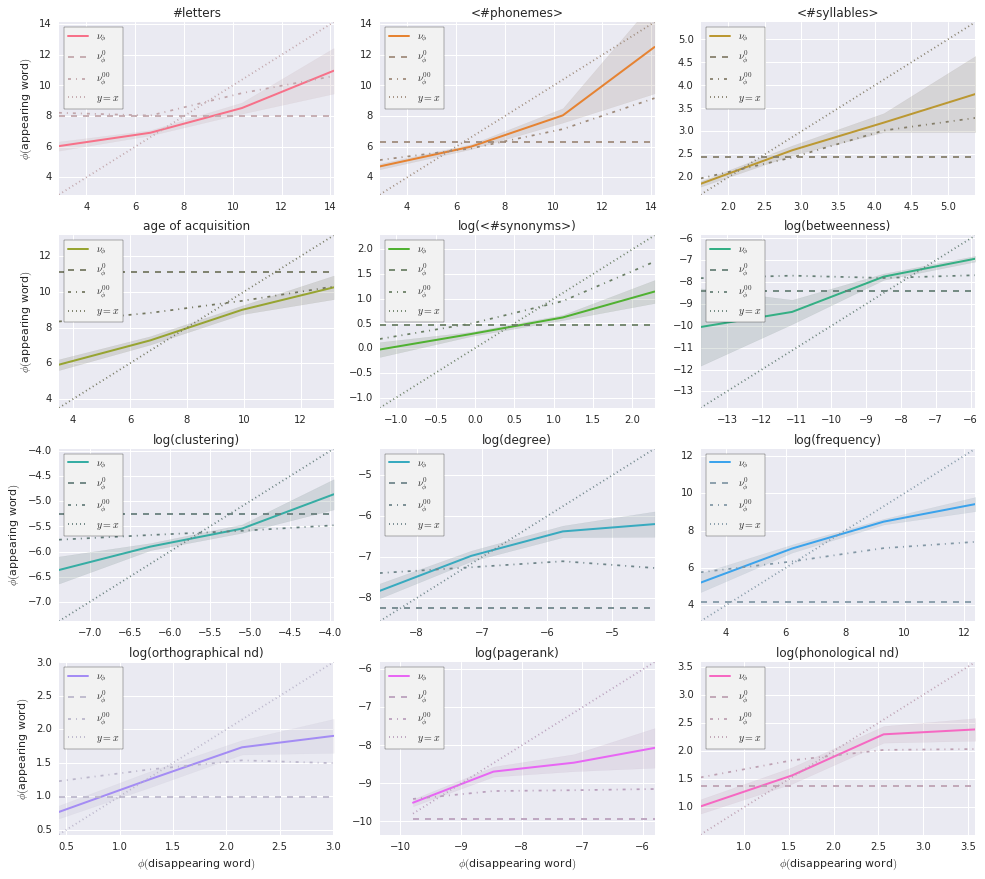

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

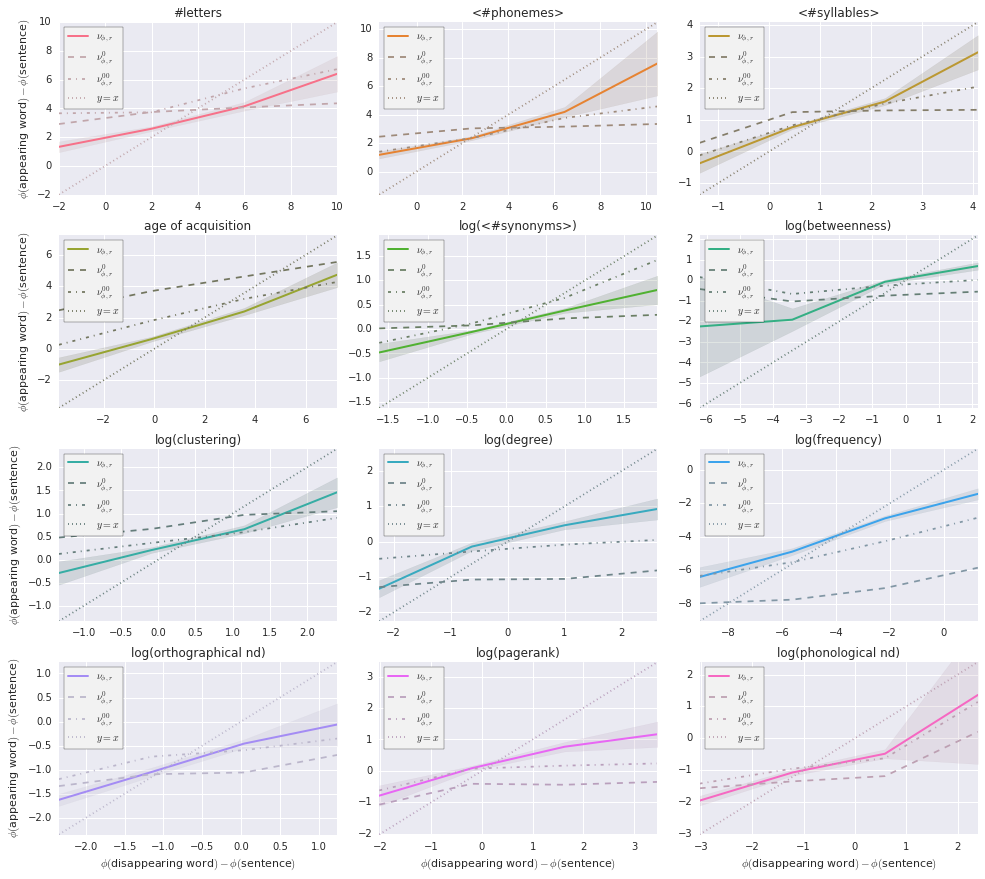

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

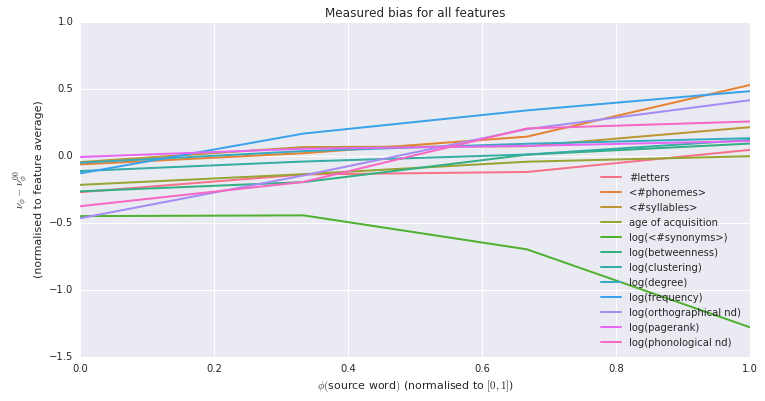

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

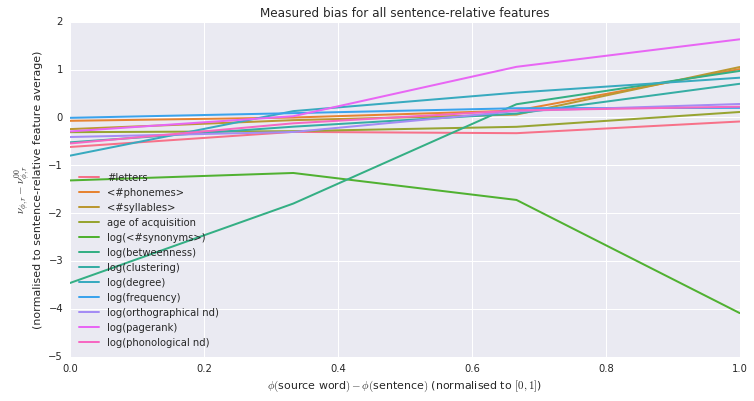

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

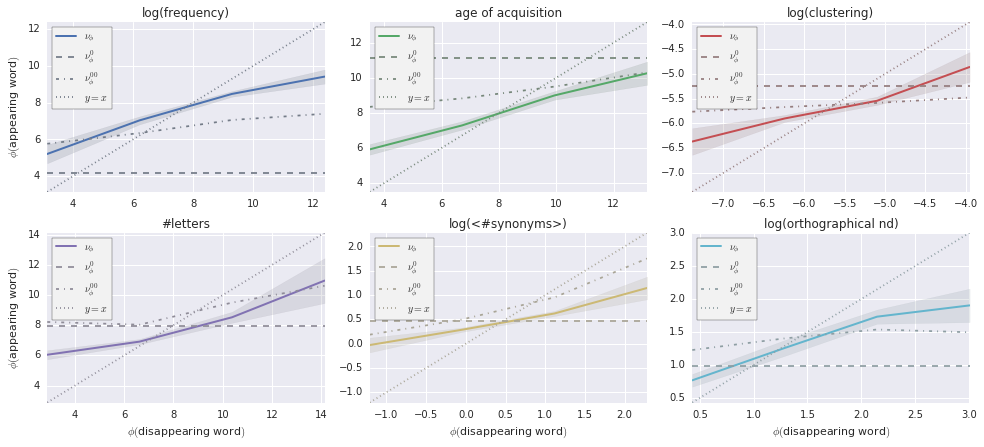

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

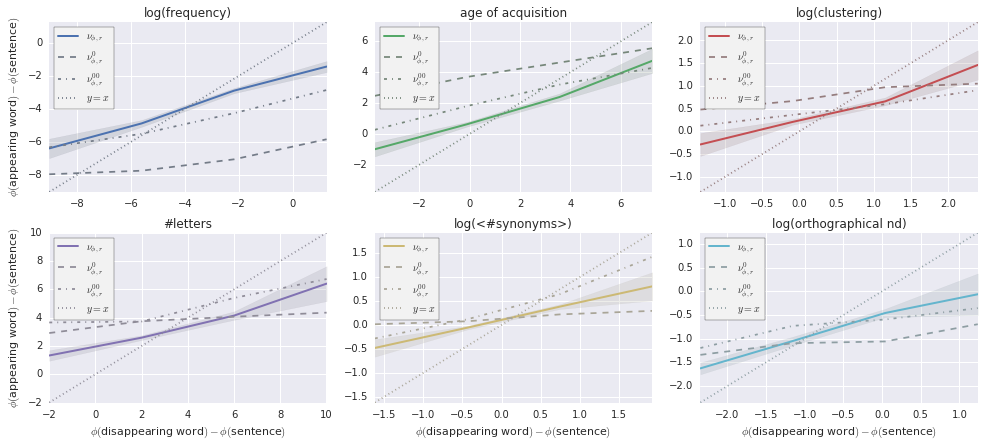

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

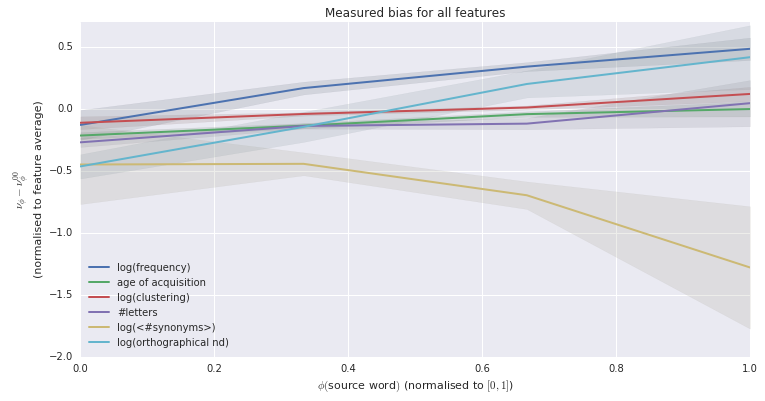

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

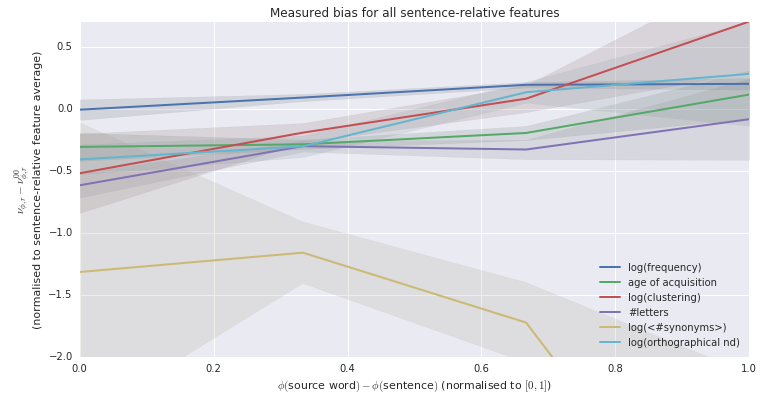

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


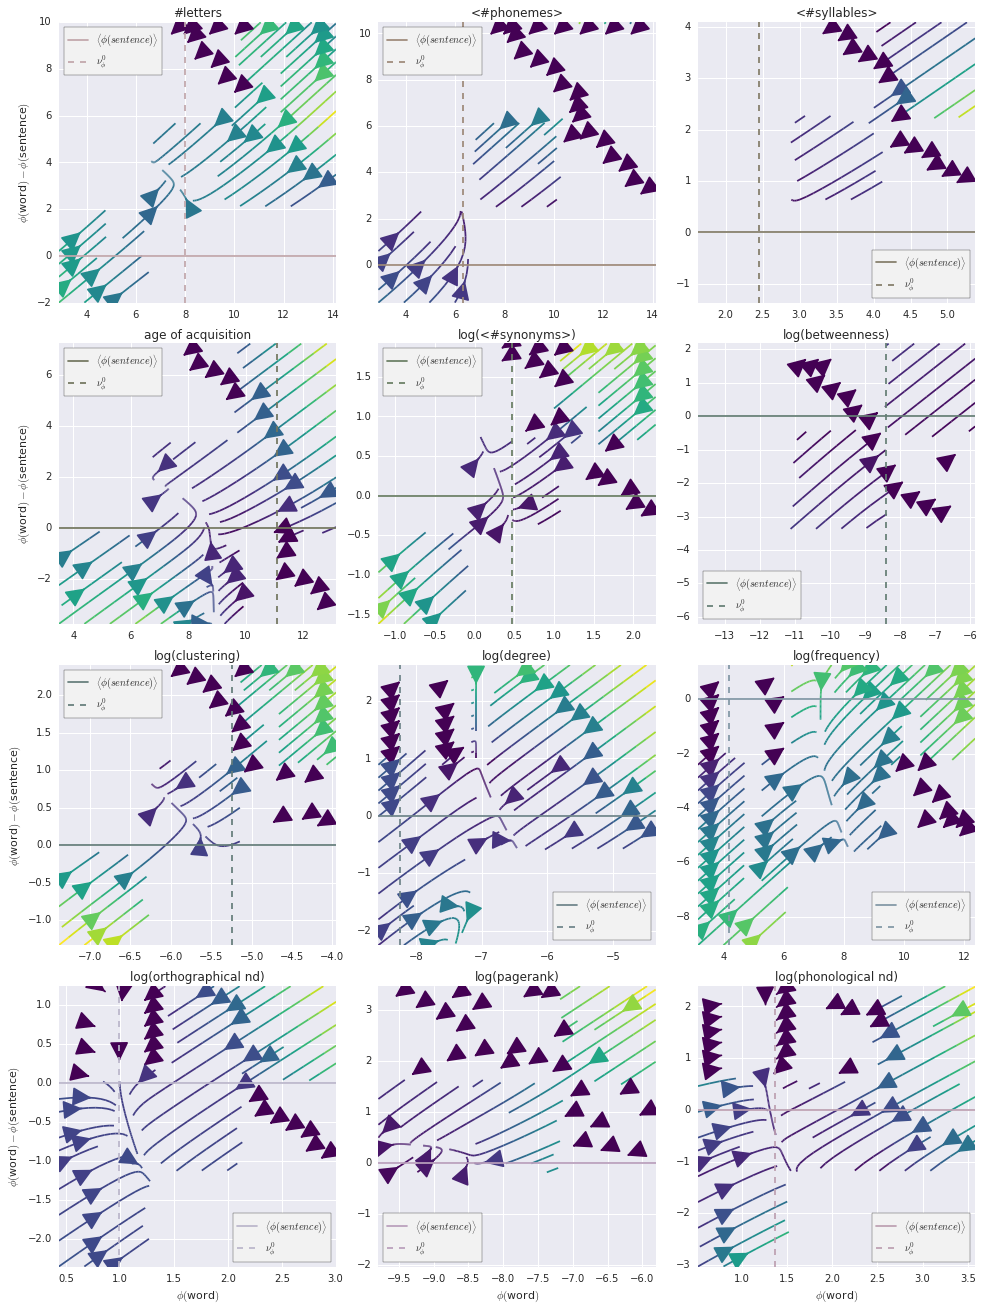

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


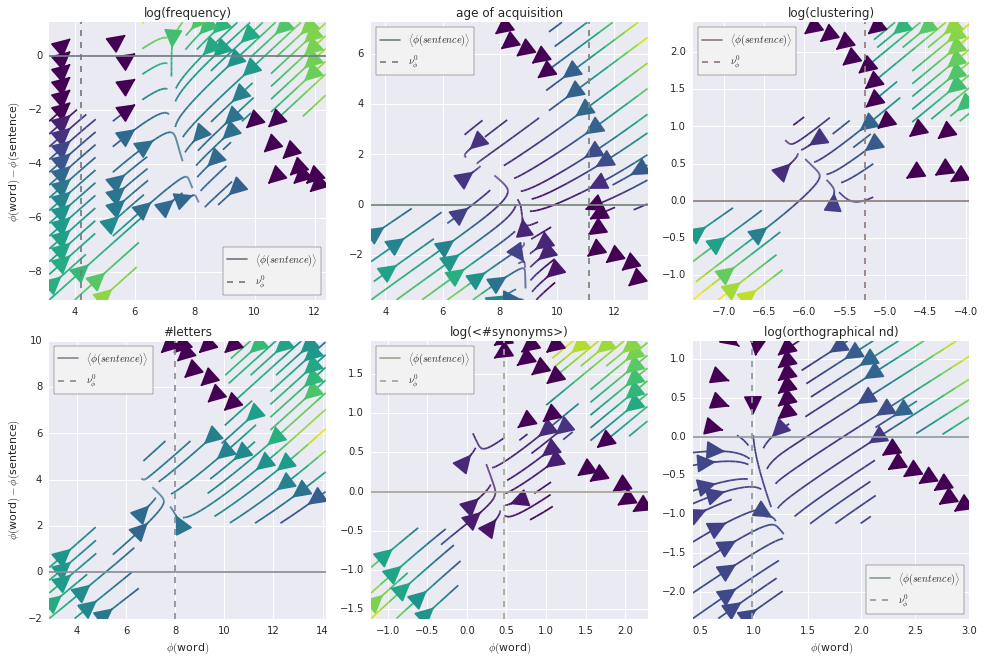

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.50698726  0.19425307  0.08273607  0.07724079  0.03510479  0.02631204
  0.02386173  0.01767014  0.01366418  0.01011507]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.533336,-0.215156,0.070221,-0.219877,-0.169691,0.441211,-0.204520,-0.238982,0.429688,-0.276563,0.179982,-0.008297
Component-1,0.417939,-0.370496,0.138988,-0.317411,-0.186745,-0.438708,0.145342,-0.289997,-0.421771,0.190742,-0.142507,0.029147
Component-2,0.367823,0.536326,-0.080540,0.232764,-0.667568,-0.059483,-0.006170,0.233426,-0.068718,0.061029,-0.057273,-0.030936


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 63446) |          | Elapsed Time: 0:00:50 ETA:  36 days, 19:51:34

  0% (  111 of 63446) |                    | Elapsed Time: 0:00:51 ETA:  0:08:47

  0% (  222 of 63446) |                    | Elapsed Time: 0:00:52 ETA:  0:08:43

  0% (  321 of 63446) |                    | Elapsed Time: 0:00:53 ETA:  0:09:03

  0% (  423 of 63446) |                    | Elapsed Time: 0:00:54 ETA:  0:09:09

  0% (  526 of 63446) |                    | Elapsed Time: 0:00:55 ETA:  0:09:11

  0% (  632 of 63446) |                    | Elapsed Time: 0:00:56 ETA:  0:09:09

  1% (  737 of 63446) |                    | Elapsed Time: 0:00:57 ETA:  0:09:09

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:57 ETA:  0:09:06

  1% (  899 of 63446) |                    | Elapsed Time: 0:00:58 ETA:  0:09:05

  1% ( 1006 of 63446) |                    | Elapsed Time: 0:00:59 ETA:  0:09:06

  1% ( 1117 of 63446) |                    | Elapsed Time: 0:01:00 ETA:  0:09:06

  1% ( 1229 of 63446) |                    | Elapsed Time: 0:01:01 ETA:  0:08:56

  2% ( 1341 of 63446) |                    | Elapsed Time: 0:01:02 ETA:  0:08:49

  2% ( 1443 of 63446) |                    | Elapsed Time: 0:01:03 ETA:  0:08:48

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:01:04 ETA:  0:08:24

  2% ( 1718 of 63446) |                    | Elapsed Time: 0:01:05 ETA:  0:08:11

  2% ( 1861 of 63446) |                    | Elapsed Time: 0:01:06 ETA:  0:07:48

  3% ( 1950 of 63446) |                    | Elapsed Time: 0:01:07 ETA:  0:07:58

  3% ( 2010 of 63446) |                    | Elapsed Time: 0:01:08 ETA:  0:08:28

  3% ( 2066 of 63446) |                    | Elapsed Time: 0:01:09 ETA:  0:09:06

  3% ( 2124 of 63446) |                    | Elapsed Time: 0:01:10 ETA:  0:09:48

  3% ( 2181 of 63446) |                    | Elapsed Time: 0:01:11 ETA:  0:10:27

  3% ( 2238 of 63446) |                    | Elapsed Time: 0:01:12 ETA:  0:11:48

  3% ( 2300 of 63446) |                    | Elapsed Time: 0:01:13 ETA:  0:12:14

  3% ( 2359 of 63446) |                    | Elapsed Time: 0:01:14 ETA:  0:13:44

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:01:15 ETA:  0:15:44

  3% ( 2470 of 63446) |                    | Elapsed Time: 0:01:16 ETA:  0:15:40

  4% ( 2566 of 63446) |                    | Elapsed Time: 0:01:17 ETA:  0:14:34

  4% ( 2660 of 63446) |                    | Elapsed Time: 0:01:18 ETA:  0:13:31

  4% ( 2757 of 63446) |                    | Elapsed Time: 0:01:19 ETA:  0:12:34

  4% ( 2860 of 63446) |                    | Elapsed Time: 0:01:20 ETA:  0:11:38

  4% ( 2955 of 63446) |                    | Elapsed Time: 0:01:21 ETA:  0:10:55

  4% ( 3051 of 63446) |                    | Elapsed Time: 0:01:22 ETA:  0:10:20

  4% ( 3147 of 63446) |                    | Elapsed Time: 0:01:23 ETA:  0:09:46

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:01:23 ETA:  0:09:41

  5% ( 3277 of 63446) |#                   | Elapsed Time: 0:01:24 ETA:  0:09:28

  5% ( 3387 of 63446) |#                   | Elapsed Time: 0:01:25 ETA:  0:09:16

  5% ( 3504 of 63446) |#                   | Elapsed Time: 0:01:26 ETA:  0:08:57

  5% ( 3644 of 63446) |#                   | Elapsed Time: 0:01:27 ETA:  0:08:25

  5% ( 3798 of 63446) |#                   | Elapsed Time: 0:01:28 ETA:  0:07:52

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:01:29 ETA:  0:07:01

  6% ( 4116 of 63446) |#                   | Elapsed Time: 0:01:30 ETA:  0:06:32

  6% ( 4270 of 63446) |#                   | Elapsed Time: 0:01:31 ETA:  0:06:18

  6% ( 4422 of 63446) |#                   | Elapsed Time: 0:01:32 ETA:  0:05:57

  7% ( 4571 of 63446) |#                   | Elapsed Time: 0:01:33 ETA:  0:05:41

  7% ( 4728 of 63446) |#                   | Elapsed Time: 0:01:34 ETA:  0:05:26

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:01:34 ETA:  0:05:22

  7% ( 4899 of 63446) |#                   | Elapsed Time: 0:01:35 ETA:  0:05:26

  7% ( 5025 of 63446) |#                   | Elapsed Time: 0:01:36 ETA:  0:05:36

  8% ( 5146 of 63446) |#                   | Elapsed Time: 0:01:37 ETA:  0:05:45

  8% ( 5267 of 63446) |#                   | Elapsed Time: 0:01:38 ETA:  0:05:55

  8% ( 5389 of 63446) |#                   | Elapsed Time: 0:01:39 ETA:  0:06:07

  8% ( 5518 of 63446) |#                   | Elapsed Time: 0:01:40 ETA:  0:06:16

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:01:41 ETA:  0:06:24

  8% ( 5682 of 63446) |#                   | Elapsed Time: 0:01:42 ETA:  0:06:37

  9% ( 5808 of 63446) |#                   | Elapsed Time: 0:01:43 ETA:  0:06:39

  9% ( 5928 of 63446) |#                   | Elapsed Time: 0:01:44 ETA:  0:06:48

  9% ( 6019 of 63446) |#                   | Elapsed Time: 0:01:45 ETA:  0:07:05

  9% ( 6110 of 63446) |#                   | Elapsed Time: 0:01:46 ETA:  0:07:20

  9% ( 6160 of 63446) |#                   | Elapsed Time: 0:01:47 ETA:  0:08:03

  9% ( 6254 of 63446) |#                   | Elapsed Time: 0:01:48 ETA:  0:08:21

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:48 ETA:  0:08:25

 10% ( 6465 of 63446) |##                  | Elapsed Time: 0:01:49 ETA:  0:08:18

 10% ( 6586 of 63446) |##                  | Elapsed Time: 0:01:50 ETA:  0:08:23

 10% ( 6722 of 63446) |##                  | Elapsed Time: 0:01:51 ETA:  0:08:15

 10% ( 6787 of 63446) |##                  | Elapsed Time: 0:01:52 ETA:  0:08:53

 10% ( 6848 of 63446) |##                  | Elapsed Time: 0:01:53 ETA:  0:09:16

 10% ( 6908 of 63446) |##                  | Elapsed Time: 0:01:54 ETA:  0:09:41

 10% ( 6968 of 63446) |##                  | Elapsed Time: 0:01:55 ETA:  0:09:31

 11% ( 7028 of 63446) |##                  | Elapsed Time: 0:01:56 ETA:  0:10:02

 11% ( 7108 of 63446) |##                  | Elapsed Time: 0:01:57 ETA:  0:10:37

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:01:58 ETA:  0:11:12

 11% ( 7268 of 63446) |##                  | Elapsed Time: 0:01:59 ETA:  0:11:01

 11% ( 7351 of 63446) |##                  | Elapsed Time: 0:02:00 ETA:  0:12:07

 11% ( 7428 of 63446) |##                  | Elapsed Time: 0:02:01 ETA:  0:11:50

 11% ( 7525 of 63446) |##                  | Elapsed Time: 0:02:02 ETA:  0:11:04

 12% ( 7623 of 63446) |##                  | Elapsed Time: 0:02:03 ETA:  0:10:20

 12% ( 7742 of 63446) |##                  | Elapsed Time: 0:02:04 ETA:  0:09:22

 12% ( 7882 of 63446) |##                  | Elapsed Time: 0:02:05 ETA:  0:08:15

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:02:05 ETA:  0:07:49

 12% ( 8050 of 63446) |##                  | Elapsed Time: 0:02:06 ETA:  0:07:38

 12% ( 8136 of 63446) |##                  | Elapsed Time: 0:02:07 ETA:  0:08:06

 12% ( 8235 of 63446) |##                  | Elapsed Time: 0:02:08 ETA:  0:07:54

 13% ( 8329 of 63446) |##                  | Elapsed Time: 0:02:09 ETA:  0:07:41

 13% ( 8421 of 63446) |##                  | Elapsed Time: 0:02:10 ETA:  0:07:44

 13% ( 8506 of 63446) |##                  | Elapsed Time: 0:02:11 ETA:  0:07:52

 13% ( 8595 of 63446) |##                  | Elapsed Time: 0:02:12 ETA:  0:08:13

 13% ( 8687 of 63446) |##                  | Elapsed Time: 0:02:13 ETA:  0:08:49

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:02:14 ETA:  0:08:56

 13% ( 8827 of 63446) |##                  | Elapsed Time: 0:02:15 ETA:  0:09:09

 14% ( 8928 of 63446) |##                  | Elapsed Time: 0:02:16 ETA:  0:08:55

 14% ( 9028 of 63446) |##                  | Elapsed Time: 0:02:17 ETA:  0:08:53

 14% ( 9126 of 63446) |##                  | Elapsed Time: 0:02:18 ETA:  0:08:48

 14% ( 9225 of 63446) |##                  | Elapsed Time: 0:02:19 ETA:  0:08:41

 14% ( 9322 of 63446) |##                  | Elapsed Time: 0:02:20 ETA:  0:08:31

 14% ( 9422 of 63446) |##                  | Elapsed Time: 0:02:21 ETA:  0:08:21

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:02:22 ETA:  0:08:13

 15% ( 9619 of 63446) |###                 | Elapsed Time: 0:02:23 ETA:  0:08:13

 15% ( 9720 of 63446) |###                 | Elapsed Time: 0:02:24 ETA:  0:08:13

 15% ( 9814 of 63446) |###                 | Elapsed Time: 0:02:25 ETA:  0:08:17

 15% ( 9913 of 63446) |###                 | Elapsed Time: 0:02:26 ETA:  0:08:17

 15% (10014 of 63446) |###                 | Elapsed Time: 0:02:27 ETA:  0:08:14

 15% (10112 of 63446) |###                 | Elapsed Time: 0:02:28 ETA:  0:08:13

 16% (10215 of 63446) |###                 | Elapsed Time: 0:02:29 ETA:  0:08:08

 16% (10310 of 63446) |###                 | Elapsed Time: 0:02:29 ETA:  0:07:55

 16% (10428 of 63446) |###                 | Elapsed Time: 0:02:30 ETA:  0:07:43

 16% (10546 of 63446) |###                 | Elapsed Time: 0:02:31 ETA:  0:07:31

 16% (10663 of 63446) |###                 | Elapsed Time: 0:02:32 ETA:  0:07:20

 16% (10780 of 63446) |###                 | Elapsed Time: 0:02:33 ETA:  0:07:05

 17% (10897 of 63446) |###                 | Elapsed Time: 0:02:34 ETA:  0:06:54

 17% (11011 of 63446) |###                 | Elapsed Time: 0:02:35 ETA:  0:06:45

 17% (11104 of 63446) |###                 | Elapsed Time: 0:02:36 ETA:  0:06:34

 17% (11219 of 63446) |###                 | Elapsed Time: 0:02:37 ETA:  0:06:26

 17% (11311 of 63446) |###                 | Elapsed Time: 0:02:38 ETA:  0:06:41

 17% (11410 of 63446) |###                 | Elapsed Time: 0:02:39 ETA:  0:06:51

 18% (11508 of 63446) |###                 | Elapsed Time: 0:02:40 ETA:  0:07:02

 18% (11610 of 63446) |###                 | Elapsed Time: 0:02:41 ETA:  0:07:10

 18% (11712 of 63446) |###                 | Elapsed Time: 0:02:42 ETA:  0:07:18

 18% (11813 of 63446) |###                 | Elapsed Time: 0:02:43 ETA:  0:07:28

 18% (11897 of 63446) |###                 | Elapsed Time: 0:02:44 ETA:  0:07:36

 18% (11997 of 63446) |###                 | Elapsed Time: 0:02:45 ETA:  0:07:45

 19% (12103 of 63446) |###                 | Elapsed Time: 0:02:46 ETA:  0:07:50

 19% (12217 of 63446) |###                 | Elapsed Time: 0:02:47 ETA:  0:07:33

 19% (12316 of 63446) |###                 | Elapsed Time: 0:02:48 ETA:  0:07:32

 19% (12420 of 63446) |###                 | Elapsed Time: 0:02:49 ETA:  0:07:27

 19% (12535 of 63446) |###                 | Elapsed Time: 0:02:50 ETA:  0:07:17

 19% (12649 of 63446) |###                 | Elapsed Time: 0:02:51 ETA:  0:07:09

 20% (12690 of 63446) |####                | Elapsed Time: 0:02:51 ETA:  0:07:05

 20% (12804 of 63446) |####                | Elapsed Time: 0:02:52 ETA:  0:06:56

 20% (12917 of 63446) |####                | Elapsed Time: 0:02:53 ETA:  0:06:46

 20% (13033 of 63446) |####                | Elapsed Time: 0:02:54 ETA:  0:06:39

 20% (13149 of 63446) |####                | Elapsed Time: 0:02:55 ETA:  0:06:36

 20% (13268 of 63446) |####                | Elapsed Time: 0:02:56 ETA:  0:06:23

 21% (13392 of 63446) |####                | Elapsed Time: 0:02:57 ETA:  0:06:10

 21% (13483 of 63446) |####                | Elapsed Time: 0:02:58 ETA:  0:06:07

 21% (13605 of 63446) |####                | Elapsed Time: 0:02:59 ETA:  0:06:02

 21% (13719 of 63446) |####                | Elapsed Time: 0:03:00 ETA:  0:06:01

 21% (13824 of 63446) |####                | Elapsed Time: 0:03:01 ETA:  0:06:05

 21% (13936 of 63446) |####                | Elapsed Time: 0:03:02 ETA:  0:06:04

 22% (14057 of 63446) |####                | Elapsed Time: 0:03:03 ETA:  0:06:01

 22% (14196 of 63446) |####                | Elapsed Time: 0:03:04 ETA:  0:05:48

 22% (14276 of 63446) |####                | Elapsed Time: 0:03:05 ETA:  0:05:43

 22% (14411 of 63446) |####                | Elapsed Time: 0:03:06 ETA:  0:05:36

 22% (14548 of 63446) |####                | Elapsed Time: 0:03:07 ETA:  0:05:27

 23% (14699 of 63446) |####                | Elapsed Time: 0:03:08 ETA:  0:05:12

 23% (14851 of 63446) |####                | Elapsed Time: 0:03:09 ETA:  0:04:54

 23% (14965 of 63446) |####                | Elapsed Time: 0:03:10 ETA:  0:04:49

 23% (15069 of 63446) |####                | Elapsed Time: 0:03:11 ETA:  0:04:56

 23% (15161 of 63446) |####                | Elapsed Time: 0:03:12 ETA:  0:05:19

 24% (15261 of 63446) |####                | Elapsed Time: 0:03:13 ETA:  0:05:33

 24% (15399 of 63446) |####                | Elapsed Time: 0:03:14 ETA:  0:05:31

 24% (15526 of 63446) |####                | Elapsed Time: 0:03:15 ETA:  0:05:35

 24% (15658 of 63446) |####                | Elapsed Time: 0:03:16 ETA:  0:05:45

 24% (15793 of 63446) |####                | Elapsed Time: 0:03:17 ETA:  0:05:53

 25% (15862 of 63446) |#####               | Elapsed Time: 0:03:18 ETA:  0:05:50

 25% (15991 of 63446) |#####               | Elapsed Time: 0:03:19 ETA:  0:05:26

 25% (16116 of 63446) |#####               | Elapsed Time: 0:03:20 ETA:  0:05:20

 25% (16238 of 63446) |#####               | Elapsed Time: 0:03:21 ETA:  0:05:05

 25% (16358 of 63446) |#####               | Elapsed Time: 0:03:22 ETA:  0:04:55

 25% (16453 of 63446) |#####               | Elapsed Time: 0:03:23 ETA:  0:05:15

 26% (16554 of 63446) |#####               | Elapsed Time: 0:03:24 ETA:  0:05:27

 26% (16655 of 63446) |#####               | Elapsed Time: 0:03:25 ETA:  0:05:55

 26% (16783 of 63446) |#####               | Elapsed Time: 0:03:26 ETA:  0:05:48

 26% (16935 of 63446) |#####               | Elapsed Time: 0:03:27 ETA:  0:05:33

 26% (17065 of 63446) |#####               | Elapsed Time: 0:03:28 ETA:  0:05:29

 27% (17181 of 63446) |#####               | Elapsed Time: 0:03:29 ETA:  0:05:32

 27% (17291 of 63446) |#####               | Elapsed Time: 0:03:30 ETA:  0:05:37

 27% (17407 of 63446) |#####               | Elapsed Time: 0:03:31 ETA:  0:05:23

 27% (17448 of 63446) |#####               | Elapsed Time: 0:03:31 ETA:  0:05:06

 27% (17601 of 63446) |#####               | Elapsed Time: 0:03:32 ETA:  0:04:36

 27% (17722 of 63446) |#####               | Elapsed Time: 0:03:33 ETA:  0:04:39

 28% (17843 of 63446) |#####               | Elapsed Time: 0:03:34 ETA:  0:04:41

 28% (17964 of 63446) |#####               | Elapsed Time: 0:03:35 ETA:  0:04:55

 28% (18102 of 63446) |#####               | Elapsed Time: 0:03:36 ETA:  0:04:50

 28% (18241 of 63446) |#####               | Elapsed Time: 0:03:37 ETA:  0:04:32

 28% (18383 of 63446) |#####               | Elapsed Time: 0:03:38 ETA:  0:04:16

 29% (18531 of 63446) |#####               | Elapsed Time: 0:03:39 ETA:  0:04:02

 29% (18681 of 63446) |#####               | Elapsed Time: 0:03:40 ETA:  0:03:59

 29% (18827 of 63446) |#####               | Elapsed Time: 0:03:41 ETA:  0:04:00

 29% (18978 of 63446) |#####               | Elapsed Time: 0:03:42 ETA:  0:03:48

 30% (19034 of 63446) |######              | Elapsed Time: 0:03:42 ETA:  0:03:39

 30% (19180 of 63446) |######              | Elapsed Time: 0:03:43 ETA:  0:03:29

 30% (19332 of 63446) |######              | Elapsed Time: 0:03:44 ETA:  0:03:23

 30% (19467 of 63446) |######              | Elapsed Time: 0:03:45 ETA:  0:03:29

 30% (19605 of 63446) |######              | Elapsed Time: 0:03:46 ETA:  0:03:29

 31% (19716 of 63446) |######              | Elapsed Time: 0:03:47 ETA:  0:03:42

 31% (19827 of 63446) |######              | Elapsed Time: 0:03:48 ETA:  0:04:01

 31% (19939 of 63446) |######              | Elapsed Time: 0:03:49 ETA:  0:04:20

 31% (20074 of 63446) |######              | Elapsed Time: 0:03:50 ETA:  0:04:19

 31% (20210 of 63446) |######              | Elapsed Time: 0:03:51 ETA:  0:04:24

 32% (20315 of 63446) |######              | Elapsed Time: 0:03:59 ETA:  0:12:06

 32% (20452 of 63446) |######              | Elapsed Time: 0:04:00 ETA:  0:12:03

 32% (20582 of 63446) |######              | Elapsed Time: 0:04:01 ETA:  0:12:10

 32% (20620 of 63446) |######              | Elapsed Time: 0:04:02 ETA:  0:12:37

 32% (20769 of 63446) |######              | Elapsed Time: 0:04:03 ETA:  0:11:53

 32% (20914 of 63446) |######              | Elapsed Time: 0:04:04 ETA:  0:10:44

 33% (21051 of 63446) |######              | Elapsed Time: 0:04:05 ETA:  0:10:23

 33% (21188 of 63446) |######              | Elapsed Time: 0:04:06 ETA:  0:10:20

 33% (21315 of 63446) |######              | Elapsed Time: 0:04:07 ETA:  0:10:26

 33% (21414 of 63446) |######              | Elapsed Time: 0:04:07 ETA:  0:03:39

 33% (21507 of 63446) |######              | Elapsed Time: 0:04:08 ETA:  0:03:58

 34% (21584 of 63446) |######              | Elapsed Time: 0:04:09 ETA:  0:04:24

 34% (21668 of 63446) |######              | Elapsed Time: 0:04:10 ETA:  0:04:45

 34% (21761 of 63446) |######              | Elapsed Time: 0:04:11 ETA:  0:05:14

 34% (21852 of 63446) |######              | Elapsed Time: 0:04:12 ETA:  0:05:45

 34% (21942 of 63446) |######              | Elapsed Time: 0:04:13 ETA:  0:06:16

 34% (22084 of 63446) |######              | Elapsed Time: 0:04:14 ETA:  0:06:12

 34% (22170 of 63446) |######              | Elapsed Time: 0:04:15 ETA:  0:06:41

 35% (22207 of 63446) |#######             | Elapsed Time: 0:04:16 ETA:  0:06:53

 35% (22323 of 63446) |#######             | Elapsed Time: 0:04:17 ETA:  0:06:33

 35% (22461 of 63446) |#######             | Elapsed Time: 0:04:18 ETA:  0:05:46

 35% (22598 of 63446) |#######             | Elapsed Time: 0:04:19 ETA:  0:05:11

 35% (22685 of 63446) |#######             | Elapsed Time: 0:04:20 ETA:  0:05:14

 35% (22772 of 63446) |#######             | Elapsed Time: 0:04:21 ETA:  0:05:16

 36% (22858 of 63446) |#######             | Elapsed Time: 0:04:22 ETA:  0:05:18

 36% (22963 of 63446) |#######             | Elapsed Time: 0:04:23 ETA:  0:05:42

 36% (23000 of 63446) |#######             | Elapsed Time: 0:04:23 ETA:  0:05:21

 36% (23135 of 63446) |#######             | Elapsed Time: 0:04:24 ETA:  0:05:04

 36% (23252 of 63446) |#######             | Elapsed Time: 0:04:25 ETA:  0:05:03

 36% (23307 of 63446) |#######             | Elapsed Time: 0:04:26 ETA:  0:05:58

 36% (23377 of 63446) |#######             | Elapsed Time: 0:04:27 ETA:  0:06:50

 37% (23518 of 63446) |#######             | Elapsed Time: 0:04:28 ETA:  0:06:05

 37% (23644 of 63446) |#######             | Elapsed Time: 0:04:29 ETA:  0:05:35

 37% (23737 of 63446) |#######             | Elapsed Time: 0:04:30 ETA:  0:05:29

 37% (23793 of 63446) |#######             | Elapsed Time: 0:04:31 ETA:  0:05:29

 37% (23897 of 63446) |#######             | Elapsed Time: 0:04:32 ETA:  0:05:35

 37% (24020 of 63446) |#######             | Elapsed Time: 0:04:33 ETA:  0:05:42

 38% (24142 of 63446) |#######             | Elapsed Time: 0:04:34 ETA:  0:05:37

 38% (24271 of 63446) |#######             | Elapsed Time: 0:04:35 ETA:  0:04:49

 38% (24396 of 63446) |#######             | Elapsed Time: 0:04:36 ETA:  0:04:17

 38% (24519 of 63446) |#######             | Elapsed Time: 0:04:37 ETA:  0:04:26

 38% (24586 of 63446) |#######             | Elapsed Time: 0:04:37 ETA:  0:04:33

 38% (24685 of 63446) |#######             | Elapsed Time: 0:04:38 ETA:  0:04:28

 39% (24787 of 63446) |#######             | Elapsed Time: 0:04:39 ETA:  0:04:31

 39% (24887 of 63446) |#######             | Elapsed Time: 0:04:40 ETA:  0:04:32

 39% (25020 of 63446) |#######             | Elapsed Time: 0:04:41 ETA:  0:04:26

 39% (25136 of 63446) |#######             | Elapsed Time: 0:04:42 ETA:  0:04:28

 39% (25266 of 63446) |#######             | Elapsed Time: 0:04:43 ETA:  0:04:27

 40% (25379 of 63446) |########            | Elapsed Time: 0:04:44 ETA:  0:04:20

 40% (25521 of 63446) |########            | Elapsed Time: 0:04:45 ETA:  0:04:09

 40% (25646 of 63446) |########            | Elapsed Time: 0:04:46 ETA:  0:04:03

 40% (25765 of 63446) |########            | Elapsed Time: 0:04:47 ETA:  0:03:52

 40% (25905 of 63446) |########            | Elapsed Time: 0:04:48 ETA:  0:03:33

 41% (26032 of 63446) |########            | Elapsed Time: 0:04:49 ETA:  0:03:20

 41% (26138 of 63446) |########            | Elapsed Time: 0:04:50 ETA:  0:03:32

 41% (26172 of 63446) |########            | Elapsed Time: 0:04:51 ETA:  0:03:32

 41% (26272 of 63446) |########            | Elapsed Time: 0:04:52 ETA:  0:03:47

 41% (26389 of 63446) |########            | Elapsed Time: 0:04:53 ETA:  0:03:56

 41% (26532 of 63446) |########            | Elapsed Time: 0:04:54 ETA:  0:03:54

 42% (26668 of 63446) |########            | Elapsed Time: 0:04:55 ETA:  0:03:47

 42% (26797 of 63446) |########            | Elapsed Time: 0:04:56 ETA:  0:03:40

 42% (26923 of 63446) |########            | Elapsed Time: 0:04:57 ETA:  0:03:46

 42% (26965 of 63446) |########            | Elapsed Time: 0:04:57 ETA:  0:03:47

 42% (27092 of 63446) |########            | Elapsed Time: 0:04:58 ETA:  0:03:34

 42% (27224 of 63446) |########            | Elapsed Time: 0:04:59 ETA:  0:03:23

 43% (27341 of 63446) |########            | Elapsed Time: 0:05:00 ETA:  0:03:14

 43% (27455 of 63446) |########            | Elapsed Time: 0:05:01 ETA:  0:03:15

 43% (27585 of 63446) |########            | Elapsed Time: 0:05:02 ETA:  0:03:19

 43% (27715 of 63446) |########            | Elapsed Time: 0:05:03 ETA:  0:03:21

 43% (27758 of 63446) |########            | Elapsed Time: 0:05:03 ETA:  0:03:19

 43% (27884 of 63446) |########            | Elapsed Time: 0:05:04 ETA:  0:03:18

 44% (28004 of 63446) |########            | Elapsed Time: 0:05:05 ETA:  0:03:21

 44% (28124 of 63446) |########            | Elapsed Time: 0:05:06 ETA:  0:03:23

 44% (28266 of 63446) |########            | Elapsed Time: 0:05:07 ETA:  0:03:17

 44% (28402 of 63446) |########            | Elapsed Time: 0:05:08 ETA:  0:03:07

 45% (28551 of 63446) |#########           | Elapsed Time: 0:05:09 ETA:  0:03:01

 45% (28683 of 63446) |#########           | Elapsed Time: 0:05:10 ETA:  0:02:59

 45% (28793 of 63446) |#########           | Elapsed Time: 0:05:11 ETA:  0:03:11

 45% (28906 of 63446) |#########           | Elapsed Time: 0:05:12 ETA:  0:03:17

 45% (29024 of 63446) |#########           | Elapsed Time: 0:05:13 ETA:  0:03:16

 45% (29161 of 63446) |#########           | Elapsed Time: 0:05:14 ETA:  0:03:07

 46% (29265 of 63446) |#########           | Elapsed Time: 0:05:15 ETA:  0:03:26

 46% (29344 of 63446) |#########           | Elapsed Time: 0:05:16 ETA:  0:03:44

 46% (29441 of 63446) |#########           | Elapsed Time: 0:05:17 ETA:  0:04:01

 46% (29558 of 63446) |#########           | Elapsed Time: 0:05:18 ETA:  0:03:59

 46% (29675 of 63446) |#########           | Elapsed Time: 0:05:19 ETA:  0:04:07

 46% (29740 of 63446) |#########           | Elapsed Time: 0:05:20 ETA:  0:04:32

 47% (29854 of 63446) |#########           | Elapsed Time: 0:05:21 ETA:  0:04:31

 47% (29969 of 63446) |#########           | Elapsed Time: 0:05:22 ETA:  0:04:32

 47% (30086 of 63446) |#########           | Elapsed Time: 0:05:23 ETA:  0:04:44

 47% (30137 of 63446) |#########           | Elapsed Time: 0:05:24 ETA:  0:04:39

 47% (30251 of 63446) |#########           | Elapsed Time: 0:05:25 ETA:  0:04:28

 47% (30394 of 63446) |#########           | Elapsed Time: 0:05:26 ETA:  0:03:58

 48% (30471 of 63446) |#########           | Elapsed Time: 0:05:27 ETA:  0:04:22

 48% (30565 of 63446) |#########           | Elapsed Time: 0:05:28 ETA:  0:04:36

 48% (30631 of 63446) |#########           | Elapsed Time: 0:05:29 ETA:  0:04:34

 48% (30733 of 63446) |#########           | Elapsed Time: 0:05:30 ETA:  0:04:41

 48% (30839 of 63446) |#########           | Elapsed Time: 0:05:31 ETA:  0:04:46

 48% (30930 of 63446) |#########           | Elapsed Time: 0:05:32 ETA:  0:05:02

 48% (31025 of 63446) |#########           | Elapsed Time: 0:05:33 ETA:  0:05:10

 49% (31119 of 63446) |#########           | Elapsed Time: 0:05:34 ETA:  0:05:25

 49% (31222 of 63446) |#########           | Elapsed Time: 0:05:35 ETA:  0:05:56

 49% (31300 of 63446) |#########           | Elapsed Time: 0:05:36 ETA:  0:05:56

 49% (31409 of 63446) |#########           | Elapsed Time: 0:05:37 ETA:  0:05:42

 49% (31506 of 63446) |#########           | Elapsed Time: 0:05:38 ETA:  0:05:17

 49% (31616 of 63446) |#########           | Elapsed Time: 0:05:39 ETA:  0:05:10

 50% (31724 of 63446) |##########          | Elapsed Time: 0:05:40 ETA:  0:05:00

 50% (31844 of 63446) |##########          | Elapsed Time: 0:05:41 ETA:  0:04:41

 50% (31979 of 63446) |##########          | Elapsed Time: 0:05:42 ETA:  0:04:13

 50% (32096 of 63446) |##########          | Elapsed Time: 0:05:43 ETA:  0:03:58

 50% (32191 of 63446) |##########          | Elapsed Time: 0:05:44 ETA:  0:04:02

 50% (32289 of 63446) |##########          | Elapsed Time: 0:05:45 ETA:  0:03:47

 51% (32382 of 63446) |##########          | Elapsed Time: 0:05:46 ETA:  0:03:55

 51% (32517 of 63446) |##########          | Elapsed Time: 0:05:47 ETA:  0:03:30

 51% (32641 of 63446) |##########          | Elapsed Time: 0:05:48 ETA:  0:03:22

 51% (32740 of 63446) |##########          | Elapsed Time: 0:05:49 ETA:  0:03:33

 51% (32841 of 63446) |##########          | Elapsed Time: 0:05:50 ETA:  0:03:42

 51% (32945 of 63446) |##########          | Elapsed Time: 0:05:51 ETA:  0:04:00

 52% (33052 of 63446) |##########          | Elapsed Time: 0:05:52 ETA:  0:04:05

 52% (33161 of 63446) |##########          | Elapsed Time: 0:05:53 ETA:  0:03:56

 52% (33278 of 63446) |##########          | Elapsed Time: 0:05:54 ETA:  0:03:44

 52% (33310 of 63446) |##########          | Elapsed Time: 0:05:54 ETA:  0:03:31

 52% (33431 of 63446) |##########          | Elapsed Time: 0:05:55 ETA:  0:03:41

 52% (33561 of 63446) |##########          | Elapsed Time: 0:05:56 ETA:  0:03:36

 53% (33694 of 63446) |##########          | Elapsed Time: 0:05:57 ETA:  0:03:15

 53% (33804 of 63446) |##########          | Elapsed Time: 0:05:58 ETA:  0:03:09

 53% (33904 of 63446) |##########          | Elapsed Time: 0:05:59 ETA:  0:03:11

 53% (33980 of 63446) |##########          | Elapsed Time: 0:06:00 ETA:  0:03:28

 53% (34057 of 63446) |##########          | Elapsed Time: 0:06:01 ETA:  0:03:47

 53% (34103 of 63446) |##########          | Elapsed Time: 0:06:01 ETA:  0:03:50

 53% (34224 of 63446) |##########          | Elapsed Time: 0:06:02 ETA:  0:03:42

 54% (34337 of 63446) |##########          | Elapsed Time: 0:06:03 ETA:  0:03:46

 54% (34470 of 63446) |##########          | Elapsed Time: 0:06:04 ETA:  0:03:43

 54% (34603 of 63446) |##########          | Elapsed Time: 0:06:05 ETA:  0:03:42

 54% (34739 of 63446) |##########          | Elapsed Time: 0:06:06 ETA:  0:03:24

 54% (34866 of 63446) |##########          | Elapsed Time: 0:06:07 ETA:  0:03:07

 55% (34896 of 63446) |###########         | Elapsed Time: 0:06:08 ETA:  0:02:43

 55% (35001 of 63446) |###########         | Elapsed Time: 0:06:09 ETA:  0:02:26

 55% (35062 of 63446) |###########         | Elapsed Time: 0:06:10 ETA:  0:02:58

 55% (35146 of 63446) |###########         | Elapsed Time: 0:06:11 ETA:  0:03:19

 55% (35244 of 63446) |###########         | Elapsed Time: 0:06:12 ETA:  0:03:28

 55% (35327 of 63446) |###########         | Elapsed Time: 0:06:13 ETA:  0:04:01

 55% (35428 of 63446) |###########         | Elapsed Time: 0:06:14 ETA:  0:04:24

 55% (35526 of 63446) |###########         | Elapsed Time: 0:06:15 ETA:  0:04:54

 56% (35618 of 63446) |###########         | Elapsed Time: 0:06:16 ETA:  0:05:27

 56% (35689 of 63446) |###########         | Elapsed Time: 0:06:17 ETA:  0:05:30

 56% (35782 of 63446) |###########         | Elapsed Time: 0:06:18 ETA:  0:05:40

 56% (35912 of 63446) |###########         | Elapsed Time: 0:06:19 ETA:  0:04:39

 56% (36047 of 63446) |###########         | Elapsed Time: 0:06:20 ETA:  0:04:01

 57% (36170 of 63446) |###########         | Elapsed Time: 0:06:21 ETA:  0:03:44

 57% (36287 of 63446) |###########         | Elapsed Time: 0:06:22 ETA:  0:03:21

 57% (36420 of 63446) |###########         | Elapsed Time: 0:06:23 ETA:  0:03:00

 57% (36482 of 63446) |###########         | Elapsed Time: 0:06:23 ETA:  0:02:47

 57% (36589 of 63446) |###########         | Elapsed Time: 0:06:24 ETA:  0:02:36

 57% (36698 of 63446) |###########         | Elapsed Time: 0:06:25 ETA:  0:02:30

 57% (36790 of 63446) |###########         | Elapsed Time: 0:06:26 ETA:  0:02:30

 58% (36884 of 63446) |###########         | Elapsed Time: 0:06:27 ETA:  0:02:49

 58% (37007 of 63446) |###########         | Elapsed Time: 0:06:28 ETA:  0:02:55

 58% (37115 of 63446) |###########         | Elapsed Time: 0:06:29 ETA:  0:03:02

 58% (37249 of 63446) |###########         | Elapsed Time: 0:06:30 ETA:  0:02:52

 58% (37275 of 63446) |###########         | Elapsed Time: 0:06:30 ETA:  0:03:09

 58% (37407 of 63446) |###########         | Elapsed Time: 0:06:31 ETA:  0:02:59

 59% (37532 of 63446) |###########         | Elapsed Time: 0:06:32 ETA:  0:02:47

 59% (37669 of 63446) |###########         | Elapsed Time: 0:06:33 ETA:  0:02:30

 59% (37803 of 63446) |###########         | Elapsed Time: 0:06:34 ETA:  0:02:06

 59% (37902 of 63446) |###########         | Elapsed Time: 0:06:35 ETA:  0:02:02

 59% (37998 of 63446) |###########         | Elapsed Time: 0:06:36 ETA:  0:02:15

 60% (38068 of 63446) |############        | Elapsed Time: 0:06:37 ETA:  0:02:01

 60% (38220 of 63446) |############        | Elapsed Time: 0:06:38 ETA:  0:01:51

 60% (38354 of 63446) |############        | Elapsed Time: 0:06:39 ETA:  0:01:41

 60% (38480 of 63446) |############        | Elapsed Time: 0:06:40 ETA:  0:01:42

 60% (38625 of 63446) |############        | Elapsed Time: 0:06:41 ETA:  0:01:32

 61% (38740 of 63446) |############        | Elapsed Time: 0:06:42 ETA:  0:01:41

 61% (38861 of 63446) |############        | Elapsed Time: 0:06:43 ETA:  0:01:43

 61% (38973 of 63446) |############        | Elapsed Time: 0:06:44 ETA:  0:01:36

 61% (39084 of 63446) |############        | Elapsed Time: 0:06:45 ETA:  0:01:28

 61% (39158 of 63446) |############        | Elapsed Time: 0:06:46 ETA:  0:01:56

 61% (39263 of 63446) |############        | Elapsed Time: 0:06:47 ETA:  0:02:18

 62% (39399 of 63446) |############        | Elapsed Time: 0:06:48 ETA:  0:02:16

 62% (39538 of 63446) |############        | Elapsed Time: 0:06:49 ETA:  0:02:08

 62% (39654 of 63446) |############        | Elapsed Time: 0:06:50 ETA:  0:02:21

 62% (39787 of 63446) |############        | Elapsed Time: 0:06:51 ETA:  0:02:11

 62% (39918 of 63446) |############        | Elapsed Time: 0:06:52 ETA:  0:02:09

 63% (40059 of 63446) |############        | Elapsed Time: 0:06:53 ETA:  0:01:53

 63% (40174 of 63446) |############        | Elapsed Time: 0:06:54 ETA:  0:01:50

 63% (40327 of 63446) |############        | Elapsed Time: 0:06:55 ETA:  0:01:13

 63% (40447 of 63446) |############        | Elapsed Time: 0:06:56 ETA:  0:01:00

 63% (40584 of 63446) |############        | Elapsed Time: 0:06:57 ETA:  0:00:58

 64% (40731 of 63446) |############        | Elapsed Time: 0:06:58 ETA:  0:00:54

 64% (40848 of 63446) |############        | Elapsed Time: 0:06:59 ETA:  0:00:54

 64% (40989 of 63446) |############        | Elapsed Time: 0:07:00 ETA:  0:00:50

 64% (41121 of 63446) |############        | Elapsed Time: 0:07:01 ETA:  0:00:49

 65% (41240 of 63446) |#############       | Elapsed Time: 0:07:02 ETA:  0:00:51

 65% (41384 of 63446) |#############       | Elapsed Time: 0:07:03 ETA:  0:00:38

 65% (41521 of 63446) |#############       | Elapsed Time: 0:07:04 ETA:  0:00:43

 65% (41651 of 63446) |#############       | Elapsed Time: 0:07:05 ETA:  0:00:46

 65% (41753 of 63446) |#############       | Elapsed Time: 0:07:06 ETA:  0:00:58

 65% (41851 of 63446) |#############       | Elapsed Time: 0:07:07 ETA:  0:01:19

 66% (41940 of 63446) |#############       | Elapsed Time: 0:07:08 ETA:  0:01:30

 66% (42033 of 63446) |#############       | Elapsed Time: 0:07:09 ETA:  0:01:45

 66% (42161 of 63446) |#############       | Elapsed Time: 0:07:10 ETA:  0:01:46

 66% (42283 of 63446) |#############       | Elapsed Time: 0:07:11 ETA:  0:01:50

 66% (42393 of 63446) |#############       | Elapsed Time: 0:07:12 ETA:  0:02:07

 67% (42543 of 63446) |#############       | Elapsed Time: 0:07:13 ETA:  0:01:59

 67% (42667 of 63446) |#############       | Elapsed Time: 0:07:14 ETA:  0:02:01

 67% (42794 of 63446) |#############       | Elapsed Time: 0:07:15 ETA:  0:01:47

 67% (42827 of 63446) |#############       | Elapsed Time: 0:07:15 ETA:  0:01:32

 67% (42948 of 63446) |#############       | Elapsed Time: 0:07:16 ETA:  0:01:14

 67% (43014 of 63446) |#############       | Elapsed Time: 0:07:17 ETA:  0:01:37

 67% (43125 of 63446) |#############       | Elapsed Time: 0:07:18 ETA:  0:01:45

 68% (43247 of 63446) |#############       | Elapsed Time: 0:07:19 ETA:  0:01:44

 68% (43382 of 63446) |#############       | Elapsed Time: 0:07:20 ETA:  0:01:29

 68% (43506 of 63446) |#############       | Elapsed Time: 0:07:21 ETA:  0:01:43

 68% (43594 of 63446) |#############       | Elapsed Time: 0:07:22 ETA:  0:02:03

 68% (43620 of 63446) |#############       | Elapsed Time: 0:07:22 ETA:  0:02:13

 68% (43702 of 63446) |#############       | Elapsed Time: 0:07:23 ETA:  0:02:36

 69% (43790 of 63446) |#############       | Elapsed Time: 0:07:24 ETA:  0:02:58

 69% (43850 of 63446) |#############       | Elapsed Time: 0:07:25 ETA:  0:03:02

 69% (43950 of 63446) |#############       | Elapsed Time: 0:07:26 ETA:  0:03:10

 69% (44049 of 63446) |#############       | Elapsed Time: 0:07:27 ETA:  0:03:27

 69% (44152 of 63446) |#############       | Elapsed Time: 0:07:28 ETA:  0:03:54

 69% (44252 of 63446) |#############       | Elapsed Time: 0:07:29 ETA:  0:04:14

 69% (44346 of 63446) |#############       | Elapsed Time: 0:07:30 ETA:  0:04:08

 70% (44413 of 63446) |##############      | Elapsed Time: 0:07:31 ETA:  0:04:01

 70% (44542 of 63446) |##############      | Elapsed Time: 0:07:32 ETA:  0:03:22

 70% (44675 of 63446) |##############      | Elapsed Time: 0:07:33 ETA:  0:02:48

 70% (44783 of 63446) |##############      | Elapsed Time: 0:07:34 ETA:  0:02:14

 70% (44843 of 63446) |##############      | Elapsed Time: 0:07:35 ETA:  0:03:16

 70% (44934 of 63446) |##############      | Elapsed Time: 0:07:36 ETA:  0:03:21

 70% (44998 of 63446) |##############      | Elapsed Time: 0:07:37 ETA:  0:03:50

 71% (45066 of 63446) |##############      | Elapsed Time: 0:07:38 ETA:  0:04:16

 71% (45169 of 63446) |##############      | Elapsed Time: 0:07:39 ETA:  0:04:07

 71% (45206 of 63446) |##############      | Elapsed Time: 0:07:40 ETA:  0:04:28

 71% (45292 of 63446) |##############      | Elapsed Time: 0:07:41 ETA:  0:05:08

 71% (45361 of 63446) |##############      | Elapsed Time: 0:07:42 ETA:  0:06:19

 71% (45466 of 63446) |##############      | Elapsed Time: 0:07:43 ETA:  0:06:22

 71% (45588 of 63446) |##############      | Elapsed Time: 0:07:44 ETA:  0:04:27

 71% (45665 of 63446) |##############      | Elapsed Time: 0:07:45 ETA:  0:04:40

 72% (45704 of 63446) |##############      | Elapsed Time: 0:07:46 ETA:  0:05:06

 72% (45777 of 63446) |##############      | Elapsed Time: 0:07:47 ETA:  0:04:59

 72% (45858 of 63446) |##############      | Elapsed Time: 0:07:48 ETA:  0:05:23

 72% (45938 of 63446) |##############      | Elapsed Time: 0:07:49 ETA:  0:05:16

 72% (45999 of 63446) |##############      | Elapsed Time: 0:07:49 ETA:  0:04:56

 72% (46126 of 63446) |##############      | Elapsed Time: 0:07:50 ETA:  0:03:56

 72% (46251 of 63446) |##############      | Elapsed Time: 0:07:51 ETA:  0:03:37

 73% (46369 of 63446) |##############      | Elapsed Time: 0:07:52 ETA:  0:03:38

 73% (46462 of 63446) |##############      | Elapsed Time: 0:07:53 ETA:  0:03:23

 73% (46556 of 63446) |##############      | Elapsed Time: 0:07:54 ETA:  0:02:38

 73% (46650 of 63446) |##############      | Elapsed Time: 0:07:55 ETA:  0:02:22

 73% (46736 of 63446) |##############      | Elapsed Time: 0:07:56 ETA:  0:02:17

 73% (46792 of 63446) |##############      | Elapsed Time: 0:07:57 ETA:  0:02:04

 73% (46885 of 63446) |##############      | Elapsed Time: 0:07:58 ETA:  0:02:19

 74% (46986 of 63446) |##############      | Elapsed Time: 0:07:59 ETA:  0:02:37

 74% (47072 of 63446) |##############      | Elapsed Time: 0:08:00 ETA:  0:03:07

 74% (47172 of 63446) |##############      | Elapsed Time: 0:08:01 ETA:  0:03:21

 74% (47284 of 63446) |##############      | Elapsed Time: 0:08:02 ETA:  0:03:04

 74% (47378 of 63446) |##############      | Elapsed Time: 0:08:03 ETA:  0:03:04

 74% (47468 of 63446) |##############      | Elapsed Time: 0:08:04 ETA:  0:03:06

 74% (47562 of 63446) |##############      | Elapsed Time: 0:08:05 ETA:  0:02:58

 75% (47585 of 63446) |###############     | Elapsed Time: 0:08:05 ETA:  0:02:58

 75% (47695 of 63446) |###############     | Elapsed Time: 0:08:06 ETA:  0:02:42

 75% (47816 of 63446) |###############     | Elapsed Time: 0:08:07 ETA:  0:02:25

 75% (47918 of 63446) |###############     | Elapsed Time: 0:08:08 ETA:  0:02:14

 75% (47974 of 63446) |###############     | Elapsed Time: 0:08:09 ETA:  0:02:47

 75% (48101 of 63446) |###############     | Elapsed Time: 0:08:10 ETA:  0:02:33

 75% (48196 of 63446) |###############     | Elapsed Time: 0:08:11 ETA:  0:02:32

 76% (48261 of 63446) |###############     | Elapsed Time: 0:08:12 ETA:  0:02:51

 76% (48357 of 63446) |###############     | Elapsed Time: 0:08:13 ETA:  0:02:49

 76% (48378 of 63446) |###############     | Elapsed Time: 0:08:14 ETA:  0:02:53

 76% (48482 of 63446) |###############     | Elapsed Time: 0:08:15 ETA:  0:02:58

 76% (48603 of 63446) |###############     | Elapsed Time: 0:08:16 ETA:  0:02:58

 76% (48685 of 63446) |###############     | Elapsed Time: 0:08:17 ETA:  0:03:13

 76% (48764 of 63446) |###############     | Elapsed Time: 0:08:18 ETA:  0:02:52

 77% (48882 of 63446) |###############     | Elapsed Time: 0:08:19 ETA:  0:02:59

 77% (48974 of 63446) |###############     | Elapsed Time: 0:08:20 ETA:  0:02:59

 77% (49064 of 63446) |###############     | Elapsed Time: 0:08:21 ETA:  0:02:37

 77% (49171 of 63446) |###############     | Elapsed Time: 0:08:22 ETA:  0:02:25

 77% (49301 of 63446) |###############     | Elapsed Time: 0:08:23 ETA:  0:01:56

 77% (49405 of 63446) |###############     | Elapsed Time: 0:08:24 ETA:  0:01:54

 78% (49504 of 63446) |###############     | Elapsed Time: 0:08:25 ETA:  0:02:09

 78% (49635 of 63446) |###############     | Elapsed Time: 0:08:26 ETA:  0:01:35

 78% (49767 of 63446) |###############     | Elapsed Time: 0:08:27 ETA:  0:01:02

 78% (49872 of 63446) |###############     | Elapsed Time: 0:08:28 ETA:  0:01:08

 78% (49964 of 63446) |###############     | Elapsed Time: 0:08:29 ETA:  0:01:03

 78% (50039 of 63446) |###############     | Elapsed Time: 0:08:30 ETA:  0:01:25

 79% (50159 of 63446) |###############     | Elapsed Time: 0:08:31 ETA:  0:01:32

 79% (50291 of 63446) |###############     | Elapsed Time: 0:08:32 ETA:  0:01:11

 79% (50411 of 63446) |###############     | Elapsed Time: 0:08:33 ETA:  0:00:57

 79% (50517 of 63446) |###############     | Elapsed Time: 0:08:34 ETA:  0:01:12

 79% (50595 of 63446) |###############     | Elapsed Time: 0:08:35 ETA:  0:01:50

 79% (50665 of 63446) |###############     | Elapsed Time: 0:08:36 ETA:  0:02:17

 80% (50757 of 63446) |################    | Elapsed Time: 0:08:37 ETA:  0:02:10

 80% (50898 of 63446) |################    | Elapsed Time: 0:08:38 ETA:  0:01:19

 80% (51025 of 63446) |################    | Elapsed Time: 0:08:39 ETA:  0:01:14

 80% (51129 of 63446) |################    | Elapsed Time: 0:08:40 ETA:  0:01:33

 80% (51235 of 63446) |################    | Elapsed Time: 0:08:41 ETA:  0:01:42

 80% (51328 of 63446) |################    | Elapsed Time: 0:08:42 ETA:  0:01:50

 81% (51459 of 63446) |################    | Elapsed Time: 0:08:43 ETA:  0:01:10

 81% (51550 of 63446) |################    | Elapsed Time: 0:08:44 ETA:  0:00:37

 81% (51672 of 63446) |################    | Elapsed Time: 0:08:45 ETA:  0:00:14

 81% (51825 of 63446) |################    | Elapsed Time: 0:08:46 ETA:  0:00:00

 81% (51960 of 63446) |################    | Elapsed Time: 0:08:47 ETA:  0:00:00

 82% (52085 of 63446) |################    | Elapsed Time: 0:08:48 ETA:  0:00:00

 82% (52187 of 63446) |################    | Elapsed Time: 0:08:49 ETA:  0:00:00

 82% (52309 of 63446) |################    | Elapsed Time: 0:08:50 ETA:  0:00:00

 82% (52343 of 63446) |################    | Elapsed Time: 0:08:50 ETA:  0:00:00

 82% (52467 of 63446) |################    | Elapsed Time: 0:08:51 ETA:  0:00:00

 82% (52620 of 63446) |################    | Elapsed Time: 0:08:52 ETA:  0:00:00

 83% (52734 of 63446) |################    | Elapsed Time: 0:08:53 ETA:  0:00:00

 83% (52867 of 63446) |################    | Elapsed Time: 0:08:54 ETA:  0:00:00

 83% (52961 of 63446) |################    | Elapsed Time: 0:08:55 ETA:  0:00:00

 83% (53063 of 63446) |################    | Elapsed Time: 0:08:57 ETA:  0:00:39

 83% (53137 of 63446) |################    | Elapsed Time: 0:08:57 ETA:  0:00:34

 83% (53255 of 63446) |################    | Elapsed Time: 0:08:58 ETA:  0:00:36

 84% (53370 of 63446) |################    | Elapsed Time: 0:08:59 ETA:  0:00:31

 84% (53501 of 63446) |################    | Elapsed Time: 0:09:00 ETA:  0:00:27

 84% (53599 of 63446) |################    | Elapsed Time: 0:09:01 ETA:  0:00:57

 84% (53707 of 63446) |################    | Elapsed Time: 0:09:02 ETA:  0:01:00

 84% (53786 of 63446) |################    | Elapsed Time: 0:09:03 ETA:  0:01:34

 84% (53889 of 63446) |################    | Elapsed Time: 0:09:04 ETA:  0:01:27

 85% (53930 of 63446) |#################   | Elapsed Time: 0:09:05 ETA:  0:00:45

 85% (54043 of 63446) |#################   | Elapsed Time: 0:09:06 ETA:  0:00:41

 85% (54144 of 63446) |#################   | Elapsed Time: 0:09:07 ETA:  0:00:51

 85% (54256 of 63446) |#################   | Elapsed Time: 0:09:08 ETA:  0:00:51

 85% (54344 of 63446) |#################   | Elapsed Time: 0:09:09 ETA:  0:01:21

 85% (54451 of 63446) |#################   | Elapsed Time: 0:09:10 ETA:  0:01:13

 86% (54570 of 63446) |#################   | Elapsed Time: 0:09:11 ETA:  0:01:04

 86% (54723 of 63446) |#################   | Elapsed Time: 0:09:12 ETA:  0:00:21

 86% (54840 of 63446) |#################   | Elapsed Time: 0:09:13 ETA:  0:00:18

 86% (54963 of 63446) |#################   | Elapsed Time: 0:09:14 ETA:  0:00:12

 86% (55079 of 63446) |#################   | Elapsed Time: 0:09:15 ETA:  0:00:02

 86% (55193 of 63446) |#################   | Elapsed Time: 0:09:16 ETA:  0:00:00

 87% (55313 of 63446) |#################   | Elapsed Time: 0:09:17 ETA:  0:00:00

 87% (55399 of 63446) |#################   | Elapsed Time: 0:09:18 ETA:  0:00:00

 87% (55516 of 63446) |#################   | Elapsed Time: 0:09:19 ETA:  0:00:17

 87% (55658 of 63446) |#################   | Elapsed Time: 0:09:20 ETA:  0:00:00

 87% (55792 of 63446) |#################   | Elapsed Time: 0:09:21 ETA:  0:00:00

 88% (55845 of 63446) |#################   | Elapsed Time: 0:09:22 ETA:  0:00:25

 88% (55957 of 63446) |#################   | Elapsed Time: 0:09:23 ETA:  0:00:27

 88% (56066 of 63446) |#################   | Elapsed Time: 0:09:24 ETA:  0:00:29

 88% (56189 of 63446) |#################   | Elapsed Time: 0:09:25 ETA:  0:00:26

 88% (56259 of 63446) |#################   | Elapsed Time: 0:09:26 ETA:  0:00:36

 88% (56309 of 63446) |#################   | Elapsed Time: 0:09:27 ETA:  0:00:24

 88% (56431 of 63446) |#################   | Elapsed Time: 0:09:28 ETA:  0:00:18

 89% (56555 of 63446) |#################   | Elapsed Time: 0:09:29 ETA:  0:00:30

 89% (56662 of 63446) |#################   | Elapsed Time: 0:09:30 ETA:  0:00:48

 89% (56772 of 63446) |#################   | Elapsed Time: 0:09:31 ETA:  0:00:10

 89% (56884 of 63446) |#################   | Elapsed Time: 0:09:32 ETA:  0:00:09

 89% (56979 of 63446) |#################   | Elapsed Time: 0:09:33 ETA:  0:00:16

 90% (57102 of 63446) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:00

 90% (57233 of 63446) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:00

 90% (57347 of 63446) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:00

 90% (57452 of 63446) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:02

 90% (57555 of 63446) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:03

 90% (57652 of 63446) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:10

 90% (57730 of 63446) |##################  | Elapsed Time: 0:09:40 ETA:  0:00:32

 91% (57836 of 63446) |##################  | Elapsed Time: 0:09:41 ETA:  0:00:24

 91% (57895 of 63446) |##################  | Elapsed Time: 0:09:41 ETA:  0:00:15

 91% (58023 of 63446) |##################  | Elapsed Time: 0:09:42 ETA:  0:00:02

 91% (58152 of 63446) |##################  | Elapsed Time: 0:09:43 ETA:  0:00:02

 91% (58263 of 63446) |##################  | Elapsed Time: 0:09:44 ETA:  0:00:03

 91% (58365 of 63446) |##################  | Elapsed Time: 0:09:45 ETA:  0:00:04

 92% (58486 of 63446) |##################  | Elapsed Time: 0:09:46 ETA:  0:00:00

 92% (58603 of 63446) |##################  | Elapsed Time: 0:09:47 ETA:  0:00:00

 92% (58688 of 63446) |##################  | Elapsed Time: 0:09:48 ETA:  0:00:00

 92% (58782 of 63446) |##################  | Elapsed Time: 0:09:49 ETA:  0:00:00

 92% (58875 of 63446) |##################  | Elapsed Time: 0:09:50 ETA:  0:00:00

 92% (58967 of 63446) |##################  | Elapsed Time: 0:09:51 ETA:  0:00:00

 93% (59057 of 63446) |##################  | Elapsed Time: 0:09:52 ETA:  0:00:20

 93% (59171 of 63446) |##################  | Elapsed Time: 0:09:53 ETA:  0:00:17

 93% (59281 of 63446) |##################  | Elapsed Time: 0:09:54 ETA:  0:00:10

 93% (59388 of 63446) |##################  | Elapsed Time: 0:09:55 ETA:  0:00:19

 93% (59481 of 63446) |##################  | Elapsed Time: 0:09:56 ETA:  0:00:48

 93% (59583 of 63446) |##################  | Elapsed Time: 0:09:57 ETA:  0:00:40

 94% (59696 of 63446) |##################  | Elapsed Time: 0:09:58 ETA:  0:00:24

 94% (59814 of 63446) |##################  | Elapsed Time: 0:09:59 ETA:  0:00:04

 94% (59910 of 63446) |##################  | Elapsed Time: 0:10:00 ETA:  0:00:00

 94% (59996 of 63446) |##################  | Elapsed Time: 0:10:01 ETA:  0:00:18

 94% (60116 of 63446) |##################  | Elapsed Time: 0:10:02 ETA:  0:00:09

 94% (60229 of 63446) |##################  | Elapsed Time: 0:10:03 ETA:  0:00:04

 95% (60274 of 63446) |################### | Elapsed Time: 0:10:04 ETA:  0:00:00

 95% (60389 of 63446) |################### | Elapsed Time: 0:10:05 ETA:  0:00:00

 95% (60502 of 63446) |################### | Elapsed Time: 0:10:06 ETA:  0:00:00

 95% (60596 of 63446) |################### | Elapsed Time: 0:10:07 ETA:  0:00:00

 95% (60724 of 63446) |################### | Elapsed Time: 0:10:08 ETA:  0:00:00

 95% (60849 of 63446) |################### | Elapsed Time: 0:10:09 ETA:  0:00:00

 96% (60956 of 63446) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:10:10 ETA:  0:00:00

 96% (61177 of 63446) |################### | Elapsed Time: 0:10:11 ETA:  0:00:00

 96% (61298 of 63446) |################### | Elapsed Time: 0:10:12 ETA:  0:00:00

 96% (61401 of 63446) |################### | Elapsed Time: 0:10:13 ETA:  0:00:00

 96% (61500 of 63446) |################### | Elapsed Time: 0:10:14 ETA:  0:00:00

 97% (61631 of 63446) |################### | Elapsed Time: 0:10:15 ETA:  0:00:00

 97% (61730 of 63446) |################### | Elapsed Time: 0:10:16 ETA:  0:00:00

 97% (61860 of 63446) |################### | Elapsed Time: 0:10:17 ETA:  0:00:00

 97% (61971 of 63446) |################### | Elapsed Time: 0:10:18 ETA:  0:00:00

 97% (62069 of 63446) |################### | Elapsed Time: 0:10:19 ETA:  0:00:00

 98% (62194 of 63446) |################### | Elapsed Time: 0:10:21 ETA:  0:00:00

 98% (62317 of 63446) |################### | Elapsed Time: 0:10:22 ETA:  0:00:00

 98% (62455 of 63446) |################### | Elapsed Time: 0:10:23 ETA:  0:00:00

 98% (62566 of 63446) |################### | Elapsed Time: 0:10:24 ETA:  0:00:00

 98% (62653 of 63446) |################### | Elapsed Time: 0:10:24 ETA:  0:00:00

 98% (62758 of 63446) |################### | Elapsed Time: 0:10:25 ETA:  0:00:00

 99% (62882 of 63446) |################### | Elapsed Time: 0:10:26 ETA:  0:00:00

 99% (62998 of 63446) |################### | Elapsed Time: 0:10:27 ETA:  0:00:00

 99% (63094 of 63446) |################### | Elapsed Time: 0:10:28 ETA:  0:00:00

 99% (63202 of 63446) |################### | Elapsed Time: 0:10:29 ETA:  0:00:00

 99% (63323 of 63446) |################### | Elapsed Time: 0:10:30 ETA:  0:00:00

100% (63446 of 63446) |####################| Elapsed Time: 0:10:31 Time: 0:10:31


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

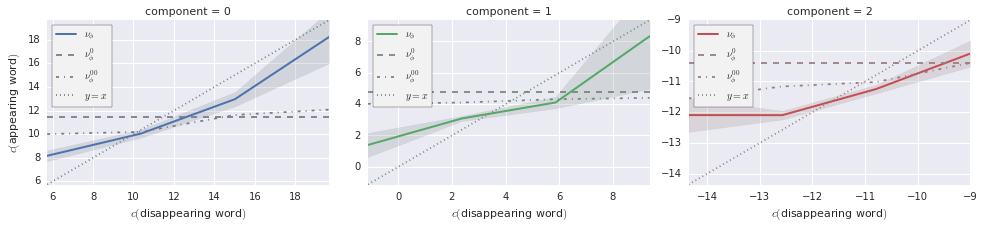

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.56129877  0.20402319  0.1365441   0.03923056  0.03374701]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,0.757602,0.075974,-0.255695,0.543163,-0.244557,-0.007273
Component-1,0.526892,0.107650,-0.261540,-0.764077,0.242009,0.003360
Component-2,0.370646,-0.086290,0.920758,-0.071603,0.001087,-0.047467


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 63446) |          | Elapsed Time: 0:00:15 ETA:  11 days, 14:27:41

  0% (  115 of 63446) |                    | Elapsed Time: 0:00:16 ETA:  0:09:04

  0% (  230 of 63446) |                    | Elapsed Time: 0:00:17 ETA:  0:09:00

  0% (  331 of 63446) |                    | Elapsed Time: 0:00:18 ETA:  0:09:20

  0% (  438 of 63446) |                    | Elapsed Time: 0:00:19 ETA:  0:09:23

  0% (  543 of 63446) |                    | Elapsed Time: 0:00:20 ETA:  0:09:26

  1% (  650 of 63446) |                    | Elapsed Time: 0:00:21 ETA:  0:09:27

  1% (  755 of 63446) |                    | Elapsed Time: 0:00:22 ETA:  0:09:28

  1% (  794 of 63446) |                    | Elapsed Time: 0:00:23 ETA:  0:09:31

  1% (  897 of 63446) |                    | Elapsed Time: 0:00:24 ETA:  0:09:33

  1% ( 1001 of 63446) |                    | Elapsed Time: 0:00:25 ETA:  0:09:38

  1% ( 1108 of 63446) |                    | Elapsed Time: 0:00:26 ETA:  0:09:43

  1% ( 1220 of 63446) |                    | Elapsed Time: 0:00:27 ETA:  0:09:34

  2% ( 1333 of 63446) |                    | Elapsed Time: 0:00:28 ETA:  0:09:30

  2% ( 1436 of 63446) |                    | Elapsed Time: 0:00:29 ETA:  0:09:30

  2% ( 1587 of 63446) |                    | Elapsed Time: 0:00:30 ETA:  0:09:09

  2% ( 1719 of 63446) |                    | Elapsed Time: 0:00:31 ETA:  0:08:51

  2% ( 1849 of 63446) |                    | Elapsed Time: 0:00:32 ETA:  0:08:34

  3% ( 1943 of 63446) |                    | Elapsed Time: 0:00:33 ETA:  0:08:39

  3% ( 2006 of 63446) |                    | Elapsed Time: 0:00:34 ETA:  0:09:04

  3% ( 2071 of 63446) |                    | Elapsed Time: 0:00:35 ETA:  0:09:35

  3% ( 2139 of 63446) |                    | Elapsed Time: 0:00:36 ETA:  0:10:09

  3% ( 2206 of 63446) |                    | Elapsed Time: 0:00:37 ETA:  0:10:39

  3% ( 2272 of 63446) |                    | Elapsed Time: 0:00:38 ETA:  0:11:38

  3% ( 2345 of 63446) |                    | Elapsed Time: 0:00:39 ETA:  0:11:57

  3% ( 2380 of 63446) |                    | Elapsed Time: 0:00:39 ETA:  0:12:55

  3% ( 2470 of 63446) |                    | Elapsed Time: 0:00:40 ETA:  0:13:47

  4% ( 2569 of 63446) |                    | Elapsed Time: 0:00:41 ETA:  0:13:39

  4% ( 2677 of 63446) |                    | Elapsed Time: 0:00:42 ETA:  0:12:40

  4% ( 2782 of 63446) |                    | Elapsed Time: 0:00:43 ETA:  0:11:54

  4% ( 2894 of 63446) |                    | Elapsed Time: 0:00:44 ETA:  0:11:09

  4% ( 3009 of 63446) |                    | Elapsed Time: 0:00:45 ETA:  0:10:25

  4% ( 3128 of 63446) |                    | Elapsed Time: 0:00:46 ETA:  0:09:42

  5% ( 3173 of 63446) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:14

  5% ( 3287 of 63446) |#                   | Elapsed Time: 0:00:48 ETA:  0:09:00

  5% ( 3411 of 63446) |#                   | Elapsed Time: 0:00:49 ETA:  0:08:37

  5% ( 3537 of 63446) |#                   | Elapsed Time: 0:00:50 ETA:  0:08:21

  5% ( 3691 of 63446) |#                   | Elapsed Time: 0:00:51 ETA:  0:07:54

  6% ( 3847 of 63446) |#                   | Elapsed Time: 0:00:52 ETA:  0:07:28

  6% ( 3966 of 63446) |#                   | Elapsed Time: 0:00:53 ETA:  0:07:08

  6% ( 4124 of 63446) |#                   | Elapsed Time: 0:00:54 ETA:  0:06:48

  6% ( 4280 of 63446) |#                   | Elapsed Time: 0:00:55 ETA:  0:06:32

  6% ( 4433 of 63446) |#                   | Elapsed Time: 0:00:56 ETA:  0:06:25

  7% ( 4595 of 63446) |#                   | Elapsed Time: 0:00:57 ETA:  0:06:08

  7% ( 4759 of 63446) |#                   | Elapsed Time: 0:00:58 ETA:  0:05:45

  7% ( 4902 of 63446) |#                   | Elapsed Time: 0:00:59 ETA:  0:05:48

  7% ( 5043 of 63446) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:52

  8% ( 5177 of 63446) |#                   | Elapsed Time: 0:01:01 ETA:  0:06:00

  8% ( 5308 of 63446) |#                   | Elapsed Time: 0:01:02 ETA:  0:06:08

  8% ( 5442 of 63446) |#                   | Elapsed Time: 0:01:03 ETA:  0:06:15

  8% ( 5552 of 63446) |#                   | Elapsed Time: 0:01:03 ETA:  0:06:21

  8% ( 5692 of 63446) |#                   | Elapsed Time: 0:01:04 ETA:  0:06:29

  9% ( 5822 of 63446) |#                   | Elapsed Time: 0:01:05 ETA:  0:06:41

  9% ( 5944 of 63446) |#                   | Elapsed Time: 0:01:06 ETA:  0:06:46

  9% ( 6042 of 63446) |#                   | Elapsed Time: 0:01:07 ETA:  0:07:04

  9% ( 6130 of 63446) |#                   | Elapsed Time: 0:01:08 ETA:  0:07:27

  9% ( 6196 of 63446) |#                   | Elapsed Time: 0:01:09 ETA:  0:08:00

 10% ( 6345 of 63446) |##                  | Elapsed Time: 0:01:11 ETA:  0:08:01

 10% ( 6475 of 63446) |##                  | Elapsed Time: 0:01:12 ETA:  0:08:01

 10% ( 6608 of 63446) |##                  | Elapsed Time: 0:01:13 ETA:  0:08:04

 10% ( 6741 of 63446) |##                  | Elapsed Time: 0:01:14 ETA:  0:08:01

 10% ( 6815 of 63446) |##                  | Elapsed Time: 0:01:15 ETA:  0:08:30

 10% ( 6892 of 63446) |##                  | Elapsed Time: 0:01:16 ETA:  0:08:44

 10% ( 6965 of 63446) |##                  | Elapsed Time: 0:01:17 ETA:  0:08:55

 11% ( 7035 of 63446) |##                  | Elapsed Time: 0:01:18 ETA:  0:08:51

 11% ( 7138 of 63446) |##                  | Elapsed Time: 0:01:19 ETA:  0:09:24

 11% ( 7279 of 63446) |##                  | Elapsed Time: 0:01:20 ETA:  0:09:15

 11% ( 7374 of 63446) |##                  | Elapsed Time: 0:01:21 ETA:  0:09:45

 11% ( 7471 of 63446) |##                  | Elapsed Time: 0:01:22 ETA:  0:10:17

 11% ( 7613 of 63446) |##                  | Elapsed Time: 0:01:23 ETA:  0:09:17

 12% ( 7748 of 63446) |##                  | Elapsed Time: 0:01:24 ETA:  0:08:31

 12% ( 7886 of 63446) |##                  | Elapsed Time: 0:01:25 ETA:  0:07:48

 12% ( 7931 of 63446) |##                  | Elapsed Time: 0:01:25 ETA:  0:07:15

 12% ( 8052 of 63446) |##                  | Elapsed Time: 0:01:26 ETA:  0:07:03

 12% ( 8150 of 63446) |##                  | Elapsed Time: 0:01:27 ETA:  0:07:16

 13% ( 8258 of 63446) |##                  | Elapsed Time: 0:01:28 ETA:  0:07:33

 13% ( 8360 of 63446) |##                  | Elapsed Time: 0:01:29 ETA:  0:07:28

 13% ( 8469 of 63446) |##                  | Elapsed Time: 0:01:30 ETA:  0:07:20

 13% ( 8580 of 63446) |##                  | Elapsed Time: 0:01:31 ETA:  0:07:37

 13% ( 8692 of 63446) |##                  | Elapsed Time: 0:01:32 ETA:  0:07:49

 13% ( 8724 of 63446) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:05

 13% ( 8839 of 63446) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:07

 14% ( 8952 of 63446) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:11

 14% ( 9063 of 63446) |##                  | Elapsed Time: 0:01:35 ETA:  0:08:01

 14% ( 9172 of 63446) |##                  | Elapsed Time: 0:01:36 ETA:  0:08:00

 14% ( 9287 of 63446) |##                  | Elapsed Time: 0:01:37 ETA:  0:07:50

 14% ( 9402 of 63446) |##                  | Elapsed Time: 0:01:38 ETA:  0:07:46

 15% ( 9517 of 63446) |###                 | Elapsed Time: 0:01:39 ETA:  0:07:42

 15% ( 9625 of 63446) |###                 | Elapsed Time: 0:01:40 ETA:  0:07:43

 15% ( 9734 of 63446) |###                 | Elapsed Time: 0:01:41 ETA:  0:07:45

 15% ( 9833 of 63446) |###                 | Elapsed Time: 0:01:42 ETA:  0:07:52

 15% ( 9943 of 63446) |###                 | Elapsed Time: 0:01:43 ETA:  0:07:53

 15% (10041 of 63446) |###                 | Elapsed Time: 0:01:44 ETA:  0:08:00

 15% (10140 of 63446) |###                 | Elapsed Time: 0:01:45 ETA:  0:08:06

 16% (10239 of 63446) |###                 | Elapsed Time: 0:01:46 ETA:  0:08:15

 16% (10310 of 63446) |###                 | Elapsed Time: 0:01:47 ETA:  0:08:13

 16% (10430 of 63446) |###                 | Elapsed Time: 0:01:48 ETA:  0:08:09

 16% (10549 of 63446) |###                 | Elapsed Time: 0:01:49 ETA:  0:08:01

 16% (10662 of 63446) |###                 | Elapsed Time: 0:01:50 ETA:  0:07:58

 16% (10773 of 63446) |###                 | Elapsed Time: 0:01:51 ETA:  0:07:50

 17% (10888 of 63446) |###                 | Elapsed Time: 0:01:52 ETA:  0:07:46

 17% (10997 of 63446) |###                 | Elapsed Time: 0:01:53 ETA:  0:07:37

 17% (11104 of 63446) |###                 | Elapsed Time: 0:01:54 ETA:  0:07:28

 17% (11219 of 63446) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:17

 17% (11307 of 63446) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:34

 17% (11397 of 63446) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:51

 18% (11494 of 63446) |###                 | Elapsed Time: 0:01:58 ETA:  0:08:04

 18% (11590 of 63446) |###                 | Elapsed Time: 0:01:59 ETA:  0:08:14

 18% (11690 of 63446) |###                 | Elapsed Time: 0:02:00 ETA:  0:08:20

 18% (11781 of 63446) |###                 | Elapsed Time: 0:02:01 ETA:  0:08:36

 18% (11897 of 63446) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:56

 18% (11998 of 63446) |###                 | Elapsed Time: 0:02:03 ETA:  0:09:07

 19% (12107 of 63446) |###                 | Elapsed Time: 0:02:04 ETA:  0:08:48

 19% (12224 of 63446) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:26

 19% (12336 of 63446) |###                 | Elapsed Time: 0:02:06 ETA:  0:08:13

 19% (12454 of 63446) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:57

 19% (12582 of 63446) |###                 | Elapsed Time: 0:02:08 ETA:  0:07:36

 20% (12690 of 63446) |####                | Elapsed Time: 0:02:09 ETA:  0:07:19

 20% (12811 of 63446) |####                | Elapsed Time: 0:02:10 ETA:  0:07:03

 20% (12931 of 63446) |####                | Elapsed Time: 0:02:11 ETA:  0:06:57

 20% (13057 of 63446) |####                | Elapsed Time: 0:02:12 ETA:  0:06:43

 20% (13179 of 63446) |####                | Elapsed Time: 0:02:13 ETA:  0:06:36

 20% (13308 of 63446) |####                | Elapsed Time: 0:02:14 ETA:  0:06:29

 21% (13432 of 63446) |####                | Elapsed Time: 0:02:15 ETA:  0:06:23

 21% (13483 of 63446) |####                | Elapsed Time: 0:02:15 ETA:  0:06:20

 21% (13606 of 63446) |####                | Elapsed Time: 0:02:16 ETA:  0:06:21

 21% (13725 of 63446) |####                | Elapsed Time: 0:02:17 ETA:  0:06:20

 21% (13836 of 63446) |####                | Elapsed Time: 0:02:18 ETA:  0:06:24

 21% (13945 of 63446) |####                | Elapsed Time: 0:02:19 ETA:  0:06:29

 22% (14084 of 63446) |####                | Elapsed Time: 0:02:20 ETA:  0:06:21

 22% (14222 of 63446) |####                | Elapsed Time: 0:02:21 ETA:  0:06:12

 22% (14276 of 63446) |####                | Elapsed Time: 0:02:22 ETA:  0:06:12

 22% (14412 of 63446) |####                | Elapsed Time: 0:02:23 ETA:  0:06:04

 22% (14553 of 63446) |####                | Elapsed Time: 0:02:24 ETA:  0:05:55

 23% (14717 of 63446) |####                | Elapsed Time: 0:02:25 ETA:  0:05:36

 23% (14865 of 63446) |####                | Elapsed Time: 0:02:26 ETA:  0:05:22

 23% (14974 of 63446) |####                | Elapsed Time: 0:02:27 ETA:  0:05:22

 23% (15069 of 63446) |####                | Elapsed Time: 0:02:28 ETA:  0:05:30

 23% (15156 of 63446) |####                | Elapsed Time: 0:02:29 ETA:  0:05:55

 24% (15240 of 63446) |####                | Elapsed Time: 0:02:30 ETA:  0:06:19

 24% (15372 of 63446) |####                | Elapsed Time: 0:02:31 ETA:  0:06:20

 24% (15499 of 63446) |####                | Elapsed Time: 0:02:32 ETA:  0:06:27

 24% (15623 of 63446) |####                | Elapsed Time: 0:02:33 ETA:  0:06:50

 24% (15756 of 63446) |####                | Elapsed Time: 0:02:34 ETA:  0:06:59

 25% (15862 of 63446) |#####               | Elapsed Time: 0:02:35 ETA:  0:06:48

 25% (15993 of 63446) |#####               | Elapsed Time: 0:02:36 ETA:  0:06:24

 25% (16118 of 63446) |#####               | Elapsed Time: 0:02:37 ETA:  0:06:19

 25% (16243 of 63446) |#####               | Elapsed Time: 0:02:38 ETA:  0:06:00

 25% (16362 of 63446) |#####               | Elapsed Time: 0:02:39 ETA:  0:05:43

 25% (16461 of 63446) |#####               | Elapsed Time: 0:02:40 ETA:  0:05:57

 26% (16557 of 63446) |#####               | Elapsed Time: 0:02:41 ETA:  0:06:11

 26% (16655 of 63446) |#####               | Elapsed Time: 0:02:42 ETA:  0:06:23

 26% (16769 of 63446) |#####               | Elapsed Time: 0:02:43 ETA:  0:06:32

 26% (16910 of 63446) |#####               | Elapsed Time: 0:02:44 ETA:  0:06:22

 26% (17051 of 63446) |#####               | Elapsed Time: 0:02:45 ETA:  0:06:16

 27% (17161 of 63446) |#####               | Elapsed Time: 0:02:46 ETA:  0:06:23

 27% (17274 of 63446) |#####               | Elapsed Time: 0:02:47 ETA:  0:06:28

 27% (17392 of 63446) |#####               | Elapsed Time: 0:02:48 ETA:  0:06:28

 27% (17448 of 63446) |#####               | Elapsed Time: 0:02:48 ETA:  0:06:11

 27% (17590 of 63446) |#####               | Elapsed Time: 0:02:49 ETA:  0:05:45

 27% (17706 of 63446) |#####               | Elapsed Time: 0:02:50 ETA:  0:05:36

 28% (17823 of 63446) |#####               | Elapsed Time: 0:02:51 ETA:  0:05:33

 28% (17939 of 63446) |#####               | Elapsed Time: 0:02:52 ETA:  0:05:44

 28% (18064 of 63446) |#####               | Elapsed Time: 0:02:53 ETA:  0:05:52

 28% (18201 of 63446) |#####               | Elapsed Time: 0:02:54 ETA:  0:05:37

 28% (18241 of 63446) |#####               | Elapsed Time: 0:02:54 ETA:  0:05:28

 28% (18382 of 63446) |#####               | Elapsed Time: 0:02:55 ETA:  0:05:15

 29% (18523 of 63446) |#####               | Elapsed Time: 0:02:56 ETA:  0:05:13

 29% (18661 of 63446) |#####               | Elapsed Time: 0:02:58 ETA:  0:05:14

 29% (18797 of 63446) |#####               | Elapsed Time: 0:02:59 ETA:  0:05:04

 29% (18935 of 63446) |#####               | Elapsed Time: 0:03:00 ETA:  0:04:54

 30% (19034 of 63446) |######              | Elapsed Time: 0:03:00 ETA:  0:04:46

 30% (19170 of 63446) |######              | Elapsed Time: 0:03:01 ETA:  0:04:41

 30% (19297 of 63446) |######              | Elapsed Time: 0:03:02 ETA:  0:04:44

 30% (19423 of 63446) |######              | Elapsed Time: 0:03:03 ETA:  0:04:47

 30% (19542 of 63446) |######              | Elapsed Time: 0:03:04 ETA:  0:04:55

 31% (19678 of 63446) |######              | Elapsed Time: 0:03:05 ETA:  0:04:57

 31% (19761 of 63446) |######              | Elapsed Time: 0:03:06 ETA:  0:05:20

 31% (19827 of 63446) |######              | Elapsed Time: 0:03:07 ETA:  0:05:26

 31% (19937 of 63446) |######              | Elapsed Time: 0:03:08 ETA:  0:05:39

 31% (20061 of 63446) |######              | Elapsed Time: 0:03:09 ETA:  0:05:41

 31% (20183 of 63446) |######              | Elapsed Time: 0:03:10 ETA:  0:05:47

 32% (20307 of 63446) |######              | Elapsed Time: 0:03:11 ETA:  0:05:48

 32% (20460 of 63446) |######              | Elapsed Time: 0:03:12 ETA:  0:05:33

 32% (20620 of 63446) |######              | Elapsed Time: 0:03:13 ETA:  0:05:19

 32% (20774 of 63446) |######              | Elapsed Time: 0:03:14 ETA:  0:04:42

 33% (20942 of 63446) |######              | Elapsed Time: 0:03:15 ETA:  0:04:23

 33% (21098 of 63446) |######              | Elapsed Time: 0:03:16 ETA:  0:04:03

 33% (21249 of 63446) |######              | Elapsed Time: 0:03:17 ETA:  0:03:52

 33% (21414 of 63446) |######              | Elapsed Time: 0:03:18 ETA:  0:03:35

 33% (21533 of 63446) |######              | Elapsed Time: 0:03:19 ETA:  0:03:47

 34% (21620 of 63446) |######              | Elapsed Time: 0:03:20 ETA:  0:04:15

 34% (21736 of 63446) |######              | Elapsed Time: 0:03:21 ETA:  0:04:24

 34% (21844 of 63446) |######              | Elapsed Time: 0:03:22 ETA:  0:04:43

 34% (21953 of 63446) |######              | Elapsed Time: 0:03:23 ETA:  0:05:11

 34% (22097 of 63446) |######              | Elapsed Time: 0:03:24 ETA:  0:05:16

 35% (22207 of 63446) |#######             | Elapsed Time: 0:03:25 ETA:  0:05:54

 35% (22342 of 63446) |#######             | Elapsed Time: 0:03:26 ETA:  0:05:44

 35% (22494 of 63446) |#######             | Elapsed Time: 0:03:27 ETA:  0:05:24

 35% (22635 of 63446) |#######             | Elapsed Time: 0:03:28 ETA:  0:04:55

 35% (22728 of 63446) |#######             | Elapsed Time: 0:03:29 ETA:  0:05:05

 35% (22838 of 63446) |#######             | Elapsed Time: 0:03:30 ETA:  0:05:03

 36% (22951 of 63446) |#######             | Elapsed Time: 0:03:31 ETA:  0:05:00

 36% (23000 of 63446) |#######             | Elapsed Time: 0:03:32 ETA:  0:05:07

 36% (23157 of 63446) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:38

 36% (23275 of 63446) |#######             | Elapsed Time: 0:03:34 ETA:  0:04:43

 36% (23346 of 63446) |#######             | Elapsed Time: 0:03:35 ETA:  0:05:14

 37% (23486 of 63446) |#######             | Elapsed Time: 0:03:36 ETA:  0:05:20

 37% (23628 of 63446) |#######             | Elapsed Time: 0:03:37 ETA:  0:05:19

 37% (23732 of 63446) |#######             | Elapsed Time: 0:03:38 ETA:  0:05:12

 37% (23793 of 63446) |#######             | Elapsed Time: 0:03:38 ETA:  0:05:07

 37% (23912 of 63446) |#######             | Elapsed Time: 0:03:39 ETA:  0:05:03

 37% (24051 of 63446) |#######             | Elapsed Time: 0:03:40 ETA:  0:04:57

 38% (24182 of 63446) |#######             | Elapsed Time: 0:03:41 ETA:  0:05:10

 38% (24312 of 63446) |#######             | Elapsed Time: 0:03:42 ETA:  0:05:03

 38% (24465 of 63446) |#######             | Elapsed Time: 0:03:43 ETA:  0:04:23

 38% (24586 of 63446) |#######             | Elapsed Time: 0:03:44 ETA:  0:04:29

 38% (24708 of 63446) |#######             | Elapsed Time: 0:03:45 ETA:  0:04:37

 39% (24819 of 63446) |#######             | Elapsed Time: 0:03:46 ETA:  0:04:32

 39% (24934 of 63446) |#######             | Elapsed Time: 0:03:47 ETA:  0:04:34

 39% (25064 of 63446) |#######             | Elapsed Time: 0:03:48 ETA:  0:04:28

 39% (25195 of 63446) |#######             | Elapsed Time: 0:03:49 ETA:  0:04:31

 39% (25343 of 63446) |#######             | Elapsed Time: 0:03:50 ETA:  0:04:23

 40% (25379 of 63446) |########            | Elapsed Time: 0:03:50 ETA:  0:04:20

 40% (25527 of 63446) |########            | Elapsed Time: 0:03:51 ETA:  0:04:21

 40% (25656 of 63446) |########            | Elapsed Time: 0:03:52 ETA:  0:04:17

 40% (25792 of 63446) |########            | Elapsed Time: 0:03:53 ETA:  0:04:10

 40% (25940 of 63446) |########            | Elapsed Time: 0:03:54 ETA:  0:03:53

 41% (26050 of 63446) |########            | Elapsed Time: 0:03:55 ETA:  0:03:53

 41% (26132 of 63446) |########            | Elapsed Time: 0:03:56 ETA:  0:04:13

 41% (26172 of 63446) |########            | Elapsed Time: 0:03:57 ETA:  0:04:20

 41% (26267 of 63446) |########            | Elapsed Time: 0:03:58 ETA:  0:04:48

 41% (26375 of 63446) |########            | Elapsed Time: 0:03:59 ETA:  0:04:58

 41% (26492 of 63446) |########            | Elapsed Time: 0:04:00 ETA:  0:05:15

 41% (26597 of 63446) |########            | Elapsed Time: 0:04:01 ETA:  0:05:28

 42% (26713 of 63446) |########            | Elapsed Time: 0:04:02 ETA:  0:05:39

 42% (26851 of 63446) |########            | Elapsed Time: 0:04:03 ETA:  0:05:45

 42% (26965 of 63446) |########            | Elapsed Time: 0:04:04 ETA:  0:05:35

 42% (27098 of 63446) |########            | Elapsed Time: 0:04:05 ETA:  0:05:03

 42% (27250 of 63446) |########            | Elapsed Time: 0:04:06 ETA:  0:04:39

 43% (27378 of 63446) |########            | Elapsed Time: 0:04:07 ETA:  0:04:23

 43% (27507 of 63446) |########            | Elapsed Time: 0:04:08 ETA:  0:04:12

 43% (27640 of 63446) |########            | Elapsed Time: 0:04:09 ETA:  0:04:04

 43% (27758 of 63446) |########            | Elapsed Time: 0:04:10 ETA:  0:03:52

 43% (27879 of 63446) |########            | Elapsed Time: 0:04:11 ETA:  0:03:49

 44% (27991 of 63446) |########            | Elapsed Time: 0:04:12 ETA:  0:03:59

 44% (28113 of 63446) |########            | Elapsed Time: 0:04:13 ETA:  0:03:59

 44% (28259 of 63446) |########            | Elapsed Time: 0:04:14 ETA:  0:03:53

 44% (28398 of 63446) |########            | Elapsed Time: 0:04:15 ETA:  0:03:57

 45% (28551 of 63446) |#########           | Elapsed Time: 0:04:16 ETA:  0:03:48

 45% (28702 of 63446) |#########           | Elapsed Time: 0:04:17 ETA:  0:03:39

 45% (28825 of 63446) |#########           | Elapsed Time: 0:04:18 ETA:  0:03:42

 45% (28951 of 63446) |#########           | Elapsed Time: 0:04:19 ETA:  0:03:39

 45% (29090 of 63446) |#########           | Elapsed Time: 0:04:20 ETA:  0:03:26

 46% (29221 of 63446) |#########           | Elapsed Time: 0:04:21 ETA:  0:03:22

 46% (29324 of 63446) |#########           | Elapsed Time: 0:04:22 ETA:  0:03:39

 46% (29344 of 63446) |#########           | Elapsed Time: 0:04:22 ETA:  0:03:47

 46% (29434 of 63446) |#########           | Elapsed Time: 0:04:23 ETA:  0:04:16

 46% (29556 of 63446) |#########           | Elapsed Time: 0:04:24 ETA:  0:04:16

 46% (29673 of 63446) |#########           | Elapsed Time: 0:04:25 ETA:  0:04:33

 46% (29747 of 63446) |#########           | Elapsed Time: 0:04:26 ETA:  0:05:01

 47% (29860 of 63446) |#########           | Elapsed Time: 0:04:27 ETA:  0:05:09

 47% (29975 of 63446) |#########           | Elapsed Time: 0:04:28 ETA:  0:05:24

 47% (30089 of 63446) |#########           | Elapsed Time: 0:04:29 ETA:  0:05:34

 47% (30137 of 63446) |#########           | Elapsed Time: 0:04:29 ETA:  0:05:29

 47% (30244 of 63446) |#########           | Elapsed Time: 0:04:30 ETA:  0:05:26

 47% (30375 of 63446) |#########           | Elapsed Time: 0:04:31 ETA:  0:04:59

 48% (30462 of 63446) |#########           | Elapsed Time: 0:04:32 ETA:  0:05:20

 48% (30551 of 63446) |#########           | Elapsed Time: 0:04:33 ETA:  0:05:37

 48% (30630 of 63446) |#########           | Elapsed Time: 0:04:34 ETA:  0:05:33

 48% (30754 of 63446) |#########           | Elapsed Time: 0:04:35 ETA:  0:05:25

 48% (30885 of 63446) |#########           | Elapsed Time: 0:04:36 ETA:  0:05:13

 48% (30930 of 63446) |#########           | Elapsed Time: 0:04:37 ETA:  0:05:14

 48% (31057 of 63446) |#########           | Elapsed Time: 0:04:38 ETA:  0:05:02

 49% (31186 of 63446) |#########           | Elapsed Time: 0:04:39 ETA:  0:04:46

 49% (31302 of 63446) |#########           | Elapsed Time: 0:04:40 ETA:  0:04:55

 49% (31436 of 63446) |#########           | Elapsed Time: 0:04:41 ETA:  0:04:26

 49% (31549 of 63446) |#########           | Elapsed Time: 0:04:42 ETA:  0:04:12

 49% (31675 of 63446) |#########           | Elapsed Time: 0:04:43 ETA:  0:03:47

 50% (31724 of 63446) |##########          | Elapsed Time: 0:04:43 ETA:  0:03:48

 50% (31849 of 63446) |##########          | Elapsed Time: 0:04:44 ETA:  0:03:50

 50% (31992 of 63446) |##########          | Elapsed Time: 0:04:45 ETA:  0:03:39

 50% (32115 of 63446) |##########          | Elapsed Time: 0:04:46 ETA:  0:03:40

 50% (32226 of 63446) |##########          | Elapsed Time: 0:04:47 ETA:  0:03:49

 50% (32337 of 63446) |##########          | Elapsed Time: 0:04:48 ETA:  0:03:50

 51% (32456 of 63446) |##########          | Elapsed Time: 0:04:49 ETA:  0:03:56

 51% (32517 of 63446) |##########          | Elapsed Time: 0:04:50 ETA:  0:03:43

 51% (32652 of 63446) |##########          | Elapsed Time: 0:04:51 ETA:  0:03:37

 51% (32776 of 63446) |##########          | Elapsed Time: 0:04:52 ETA:  0:03:36

 51% (32902 of 63446) |##########          | Elapsed Time: 0:04:53 ETA:  0:03:34

 52% (33028 of 63446) |##########          | Elapsed Time: 0:04:54 ETA:  0:03:41

 52% (33165 of 63446) |##########          | Elapsed Time: 0:04:55 ETA:  0:03:33

 52% (33310 of 63446) |##########          | Elapsed Time: 0:04:56 ETA:  0:03:11

 52% (33446 of 63446) |##########          | Elapsed Time: 0:04:57 ETA:  0:03:01

 52% (33591 of 63446) |##########          | Elapsed Time: 0:04:58 ETA:  0:02:59

 53% (33728 of 63446) |##########          | Elapsed Time: 0:04:59 ETA:  0:02:57

 53% (33845 of 63446) |##########          | Elapsed Time: 0:05:00 ETA:  0:02:59

 53% (33956 of 63446) |##########          | Elapsed Time: 0:05:01 ETA:  0:03:05

 53% (34059 of 63446) |##########          | Elapsed Time: 0:05:02 ETA:  0:03:15

 53% (34103 of 63446) |##########          | Elapsed Time: 0:05:02 ETA:  0:03:15

 53% (34248 of 63446) |##########          | Elapsed Time: 0:05:03 ETA:  0:03:10

 54% (34382 of 63446) |##########          | Elapsed Time: 0:05:04 ETA:  0:03:07

 54% (34533 of 63446) |##########          | Elapsed Time: 0:05:05 ETA:  0:02:59

 54% (34684 of 63446) |##########          | Elapsed Time: 0:05:06 ETA:  0:02:55

 54% (34820 of 63446) |##########          | Elapsed Time: 0:05:07 ETA:  0:02:55

 55% (34896 of 63446) |###########         | Elapsed Time: 0:05:08 ETA:  0:02:46

 55% (35011 of 63446) |###########         | Elapsed Time: 0:05:09 ETA:  0:02:43

 55% (35079 of 63446) |###########         | Elapsed Time: 0:05:10 ETA:  0:02:59

 55% (35180 of 63446) |###########         | Elapsed Time: 0:05:11 ETA:  0:03:15

 55% (35292 of 63446) |###########         | Elapsed Time: 0:05:12 ETA:  0:03:30

 55% (35410 of 63446) |###########         | Elapsed Time: 0:05:13 ETA:  0:03:37

 56% (35540 of 63446) |###########         | Elapsed Time: 0:05:14 ETA:  0:03:47

 56% (35663 of 63446) |###########         | Elapsed Time: 0:05:15 ETA:  0:04:01

 56% (35689 of 63446) |###########         | Elapsed Time: 0:05:15 ETA:  0:04:14

 56% (35823 of 63446) |###########         | Elapsed Time: 0:05:16 ETA:  0:04:08

 56% (35966 of 63446) |###########         | Elapsed Time: 0:05:17 ETA:  0:03:50

 56% (36104 of 63446) |###########         | Elapsed Time: 0:05:18 ETA:  0:03:11

 57% (36239 of 63446) |###########         | Elapsed Time: 0:05:19 ETA:  0:02:53

 57% (36380 of 63446) |###########         | Elapsed Time: 0:05:20 ETA:  0:02:39

 57% (36482 of 63446) |###########         | Elapsed Time: 0:05:21 ETA:  0:02:29

 57% (36630 of 63446) |###########         | Elapsed Time: 0:05:22 ETA:  0:02:20

 57% (36752 of 63446) |###########         | Elapsed Time: 0:05:23 ETA:  0:02:21

 58% (36890 of 63446) |###########         | Elapsed Time: 0:05:24 ETA:  0:02:18

 58% (37030 of 63446) |###########         | Elapsed Time: 0:05:25 ETA:  0:02:15

 58% (37157 of 63446) |###########         | Elapsed Time: 0:05:26 ETA:  0:02:20

 58% (37275 of 63446) |###########         | Elapsed Time: 0:05:27 ETA:  0:02:23

 58% (37404 of 63446) |###########         | Elapsed Time: 0:05:28 ETA:  0:02:25

 59% (37521 of 63446) |###########         | Elapsed Time: 0:05:29 ETA:  0:02:34

 59% (37651 of 63446) |###########         | Elapsed Time: 0:05:30 ETA:  0:02:37

 59% (37794 of 63446) |###########         | Elapsed Time: 0:05:31 ETA:  0:02:38

 59% (37896 of 63446) |###########         | Elapsed Time: 0:05:32 ETA:  0:02:44

 59% (37996 of 63446) |###########         | Elapsed Time: 0:05:33 ETA:  0:03:00

 60% (38068 of 63446) |############        | Elapsed Time: 0:05:33 ETA:  0:03:03

 60% (38209 of 63446) |############        | Elapsed Time: 0:05:34 ETA:  0:02:55

 60% (38334 of 63446) |############        | Elapsed Time: 0:05:35 ETA:  0:02:55

 60% (38452 of 63446) |############        | Elapsed Time: 0:05:36 ETA:  0:02:59

 60% (38589 of 63446) |############        | Elapsed Time: 0:05:37 ETA:  0:02:48

 61% (38706 of 63446) |############        | Elapsed Time: 0:05:38 ETA:  0:02:53

 61% (38834 of 63446) |############        | Elapsed Time: 0:05:39 ETA:  0:03:00

 61% (38861 of 63446) |############        | Elapsed Time: 0:05:39 ETA:  0:02:49

 61% (38974 of 63446) |############        | Elapsed Time: 0:05:40 ETA:  0:02:42

 61% (39083 of 63446) |############        | Elapsed Time: 0:05:41 ETA:  0:02:54

 61% (39156 of 63446) |############        | Elapsed Time: 0:05:42 ETA:  0:03:30

 61% (39259 of 63446) |############        | Elapsed Time: 0:05:43 ETA:  0:03:43

 62% (39389 of 63446) |############        | Elapsed Time: 0:05:44 ETA:  0:03:35

 62% (39535 of 63446) |############        | Elapsed Time: 0:05:45 ETA:  0:03:28

 62% (39654 of 63446) |############        | Elapsed Time: 0:05:46 ETA:  0:03:26

 62% (39781 of 63446) |############        | Elapsed Time: 0:05:47 ETA:  0:03:26

 62% (39907 of 63446) |############        | Elapsed Time: 0:05:48 ETA:  0:03:19

 63% (40037 of 63446) |############        | Elapsed Time: 0:05:49 ETA:  0:03:09

 63% (40151 of 63446) |############        | Elapsed Time: 0:05:50 ETA:  0:03:06

 63% (40287 of 63446) |############        | Elapsed Time: 0:05:51 ETA:  0:02:34

 63% (40412 of 63446) |############        | Elapsed Time: 0:05:52 ETA:  0:02:24

 63% (40447 of 63446) |############        | Elapsed Time: 0:05:53 ETA:  0:02:24

 63% (40577 of 63446) |############        | Elapsed Time: 0:05:54 ETA:  0:02:31

 64% (40708 of 63446) |############        | Elapsed Time: 0:05:55 ETA:  0:02:24

 64% (40829 of 63446) |############        | Elapsed Time: 0:05:56 ETA:  0:02:26

 64% (40957 of 63446) |############        | Elapsed Time: 0:05:57 ETA:  0:02:24

 64% (41092 of 63446) |############        | Elapsed Time: 0:05:58 ETA:  0:02:21

 64% (41216 of 63446) |############        | Elapsed Time: 0:05:59 ETA:  0:02:15

 65% (41240 of 63446) |#############       | Elapsed Time: 0:05:59 ETA:  0:02:20

 65% (41378 of 63446) |#############       | Elapsed Time: 0:06:00 ETA:  0:02:12

 65% (41506 of 63446) |#############       | Elapsed Time: 0:06:01 ETA:  0:02:12

 65% (41635 of 63446) |#############       | Elapsed Time: 0:06:02 ETA:  0:02:12

 65% (41738 of 63446) |#############       | Elapsed Time: 0:06:03 ETA:  0:02:24

 65% (41838 of 63446) |#############       | Elapsed Time: 0:06:04 ETA:  0:02:33

 66% (41936 of 63446) |#############       | Elapsed Time: 0:06:05 ETA:  0:02:48

 66% (42033 of 63446) |#############       | Elapsed Time: 0:06:06 ETA:  0:03:00

 66% (42156 of 63446) |#############       | Elapsed Time: 0:06:07 ETA:  0:03:00

 66% (42274 of 63446) |#############       | Elapsed Time: 0:06:08 ETA:  0:02:58

 66% (42383 of 63446) |#############       | Elapsed Time: 0:06:09 ETA:  0:03:13

 67% (42525 of 63446) |#############       | Elapsed Time: 0:06:10 ETA:  0:03:04

 67% (42652 of 63446) |#############       | Elapsed Time: 0:06:11 ETA:  0:03:03

 67% (42769 of 63446) |#############       | Elapsed Time: 0:06:12 ETA:  0:02:55

 67% (42827 of 63446) |#############       | Elapsed Time: 0:06:12 ETA:  0:02:40

 67% (42944 of 63446) |#############       | Elapsed Time: 0:06:13 ETA:  0:02:30

 67% (43013 of 63446) |#############       | Elapsed Time: 0:06:14 ETA:  0:02:52

 67% (43113 of 63446) |#############       | Elapsed Time: 0:06:15 ETA:  0:03:04

 68% (43233 of 63446) |#############       | Elapsed Time: 0:06:16 ETA:  0:03:02

 68% (43357 of 63446) |#############       | Elapsed Time: 0:06:17 ETA:  0:02:52

 68% (43484 of 63446) |#############       | Elapsed Time: 0:06:18 ETA:  0:03:01

 68% (43569 of 63446) |#############       | Elapsed Time: 0:06:19 ETA:  0:03:25

 68% (43620 of 63446) |#############       | Elapsed Time: 0:06:20 ETA:  0:03:26

 68% (43711 of 63446) |#############       | Elapsed Time: 0:06:21 ETA:  0:03:46

 69% (43806 of 63446) |#############       | Elapsed Time: 0:06:22 ETA:  0:04:01

 69% (43872 of 63446) |#############       | Elapsed Time: 0:06:23 ETA:  0:04:03

 69% (43983 of 63446) |#############       | Elapsed Time: 0:06:24 ETA:  0:03:54

 69% (44098 of 63446) |#############       | Elapsed Time: 0:06:25 ETA:  0:03:57

 69% (44210 of 63446) |#############       | Elapsed Time: 0:06:26 ETA:  0:04:04

 69% (44329 of 63446) |#############       | Elapsed Time: 0:06:27 ETA:  0:04:09

 70% (44413 of 63446) |##############      | Elapsed Time: 0:06:28 ETA:  0:03:46

 70% (44547 of 63446) |##############      | Elapsed Time: 0:06:29 ETA:  0:03:30

 70% (44670 of 63446) |##############      | Elapsed Time: 0:06:30 ETA:  0:03:08

 70% (44788 of 63446) |##############      | Elapsed Time: 0:06:31 ETA:  0:02:53

 70% (44904 of 63446) |##############      | Elapsed Time: 0:06:32 ETA:  0:02:25

 70% (44992 of 63446) |##############      | Elapsed Time: 0:06:33 ETA:  0:02:36

 71% (45088 of 63446) |##############      | Elapsed Time: 0:06:34 ETA:  0:02:46

 71% (45206 of 63446) |##############      | Elapsed Time: 0:06:35 ETA:  0:02:48

 71% (45313 of 63446) |##############      | Elapsed Time: 0:06:36 ETA:  0:02:54

 71% (45421 of 63446) |##############      | Elapsed Time: 0:06:37 ETA:  0:03:09

 71% (45566 of 63446) |##############      | Elapsed Time: 0:06:38 ETA:  0:02:54

 71% (45679 of 63446) |##############      | Elapsed Time: 0:06:39 ETA:  0:02:58

 72% (45762 of 63446) |##############      | Elapsed Time: 0:06:40 ETA:  0:03:19

 72% (45863 of 63446) |##############      | Elapsed Time: 0:06:41 ETA:  0:03:08

 72% (45999 of 63446) |##############      | Elapsed Time: 0:06:42 ETA:  0:02:52

 72% (46142 of 63446) |##############      | Elapsed Time: 0:06:43 ETA:  0:02:30

 72% (46287 of 63446) |##############      | Elapsed Time: 0:06:44 ETA:  0:02:08

 73% (46412 of 63446) |##############      | Elapsed Time: 0:06:45 ETA:  0:01:58

 73% (46541 of 63446) |##############      | Elapsed Time: 0:06:46 ETA:  0:02:06

 73% (46657 of 63446) |##############      | Elapsed Time: 0:06:47 ETA:  0:02:02

 73% (46792 of 63446) |##############      | Elapsed Time: 0:06:48 ETA:  0:01:32

 73% (46905 of 63446) |##############      | Elapsed Time: 0:06:49 ETA:  0:01:33

 74% (47024 of 63446) |##############      | Elapsed Time: 0:06:50 ETA:  0:01:38

 74% (47123 of 63446) |##############      | Elapsed Time: 0:06:51 ETA:  0:02:00

 74% (47260 of 63446) |##############      | Elapsed Time: 0:06:52 ETA:  0:02:03

 74% (47379 of 63446) |##############      | Elapsed Time: 0:06:53 ETA:  0:02:05

 74% (47491 of 63446) |##############      | Elapsed Time: 0:06:54 ETA:  0:02:14

 75% (47585 of 63446) |###############     | Elapsed Time: 0:06:55 ETA:  0:02:12

 75% (47722 of 63446) |###############     | Elapsed Time: 0:06:56 ETA:  0:01:58

 75% (47850 of 63446) |###############     | Elapsed Time: 0:06:57 ETA:  0:01:52

 75% (47940 of 63446) |###############     | Elapsed Time: 0:06:58 ETA:  0:02:03

 75% (48053 of 63446) |###############     | Elapsed Time: 0:06:59 ETA:  0:02:05

 75% (48178 of 63446) |###############     | Elapsed Time: 0:07:00 ETA:  0:01:50

 76% (48277 of 63446) |###############     | Elapsed Time: 0:07:01 ETA:  0:02:09

 76% (48378 of 63446) |###############     | Elapsed Time: 0:07:02 ETA:  0:02:11

 76% (48496 of 63446) |###############     | Elapsed Time: 0:07:03 ETA:  0:02:07

 76% (48650 of 63446) |###############     | Elapsed Time: 0:07:04 ETA:  0:01:47

 76% (48735 of 63446) |###############     | Elapsed Time: 0:07:05 ETA:  0:02:13

 77% (48861 of 63446) |###############     | Elapsed Time: 0:07:06 ETA:  0:02:13

 77% (48982 of 63446) |###############     | Elapsed Time: 0:07:07 ETA:  0:01:55

 77% (49099 of 63446) |###############     | Elapsed Time: 0:07:08 ETA:  0:01:52

 77% (49171 of 63446) |###############     | Elapsed Time: 0:07:08 ETA:  0:01:49

 77% (49306 of 63446) |###############     | Elapsed Time: 0:07:09 ETA:  0:01:29

 77% (49426 of 63446) |###############     | Elapsed Time: 0:07:10 ETA:  0:01:26

 78% (49539 of 63446) |###############     | Elapsed Time: 0:07:11 ETA:  0:01:27

 78% (49663 of 63446) |###############     | Elapsed Time: 0:07:12 ETA:  0:01:42

 78% (49793 of 63446) |###############     | Elapsed Time: 0:07:13 ETA:  0:01:18

 78% (49885 of 63446) |###############     | Elapsed Time: 0:07:14 ETA:  0:01:35

 78% (49964 of 63446) |###############     | Elapsed Time: 0:07:15 ETA:  0:01:40

 78% (50053 of 63446) |###############     | Elapsed Time: 0:07:16 ETA:  0:01:55

 79% (50192 of 63446) |###############     | Elapsed Time: 0:07:17 ETA:  0:01:48

 79% (50327 of 63446) |###############     | Elapsed Time: 0:07:18 ETA:  0:01:47

 79% (50461 of 63446) |###############     | Elapsed Time: 0:07:19 ETA:  0:01:39

 79% (50566 of 63446) |###############     | Elapsed Time: 0:07:20 ETA:  0:01:42

 79% (50627 of 63446) |###############     | Elapsed Time: 0:07:21 ETA:  0:02:17

 79% (50714 of 63446) |###############     | Elapsed Time: 0:07:22 ETA:  0:02:44

 80% (50757 of 63446) |################    | Elapsed Time: 0:07:22 ETA:  0:02:33

 80% (50893 of 63446) |################    | Elapsed Time: 0:07:23 ETA:  0:02:13

 80% (51029 of 63446) |################    | Elapsed Time: 0:07:24 ETA:  0:01:44

 80% (51147 of 63446) |################    | Elapsed Time: 0:07:26 ETA:  0:01:55

 80% (51256 of 63446) |################    | Elapsed Time: 0:07:27 ETA:  0:02:10

 80% (51374 of 63446) |################    | Elapsed Time: 0:07:28 ETA:  0:02:19

 81% (51497 of 63446) |################    | Elapsed Time: 0:07:29 ETA:  0:02:06

 81% (51550 of 63446) |################    | Elapsed Time: 0:07:29 ETA:  0:01:28

 81% (51672 of 63446) |################    | Elapsed Time: 0:07:30 ETA:  0:01:07

 81% (51814 of 63446) |################    | Elapsed Time: 0:07:31 ETA:  0:00:54

 81% (51946 of 63446) |################    | Elapsed Time: 0:07:32 ETA:  0:00:56

 82% (52067 of 63446) |################    | Elapsed Time: 0:07:33 ETA:  0:01:02

 82% (52183 of 63446) |################    | Elapsed Time: 0:07:34 ETA:  0:01:03

 82% (52303 of 63446) |################    | Elapsed Time: 0:07:35 ETA:  0:00:56

 82% (52343 of 63446) |################    | Elapsed Time: 0:07:35 ETA:  0:00:54

 82% (52471 of 63446) |################    | Elapsed Time: 0:07:36 ETA:  0:00:50

 82% (52612 of 63446) |################    | Elapsed Time: 0:07:37 ETA:  0:00:43

 83% (52735 of 63446) |################    | Elapsed Time: 0:07:38 ETA:  0:00:41

 83% (52868 of 63446) |################    | Elapsed Time: 0:07:39 ETA:  0:00:44

 83% (52966 of 63446) |################    | Elapsed Time: 0:07:40 ETA:  0:01:00

 83% (53063 of 63446) |################    | Elapsed Time: 0:07:41 ETA:  0:01:15

 83% (53137 of 63446) |################    | Elapsed Time: 0:07:42 ETA:  0:01:07

 83% (53257 of 63446) |################    | Elapsed Time: 0:07:43 ETA:  0:01:06

 84% (53382 of 63446) |################    | Elapsed Time: 0:07:44 ETA:  0:01:02

 84% (53511 of 63446) |################    | Elapsed Time: 0:07:45 ETA:  0:01:01

 84% (53645 of 63446) |################    | Elapsed Time: 0:07:46 ETA:  0:01:04

 84% (53764 of 63446) |################    | Elapsed Time: 0:07:47 ETA:  0:01:05

 84% (53892 of 63446) |################    | Elapsed Time: 0:07:48 ETA:  0:01:07

 85% (53930 of 63446) |#################   | Elapsed Time: 0:07:48 ETA:  0:00:53

 85% (54046 of 63446) |#################   | Elapsed Time: 0:07:49 ETA:  0:00:39

 85% (54173 of 63446) |#################   | Elapsed Time: 0:07:50 ETA:  0:00:39

 85% (54301 of 63446) |#################   | Elapsed Time: 0:07:51 ETA:  0:00:34

 85% (54438 of 63446) |#################   | Elapsed Time: 0:07:52 ETA:  0:00:28

 86% (54590 of 63446) |#################   | Elapsed Time: 0:07:53 ETA:  0:00:16

 86% (54723 of 63446) |#################   | Elapsed Time: 0:07:54 ETA:  0:00:05

 86% (54872 of 63446) |#################   | Elapsed Time: 0:07:55 ETA:  0:00:00

 86% (55029 of 63446) |#################   | Elapsed Time: 0:07:56 ETA:  0:00:00

 86% (55167 of 63446) |#################   | Elapsed Time: 0:07:57 ETA:  0:00:00

 87% (55309 of 63446) |#################   | Elapsed Time: 0:07:58 ETA:  0:00:00

 87% (55436 of 63446) |#################   | Elapsed Time: 0:07:59 ETA:  0:00:00

 87% (55516 of 63446) |#################   | Elapsed Time: 0:08:00 ETA:  0:00:00

 87% (55680 of 63446) |#################   | Elapsed Time: 0:08:01 ETA:  0:00:00

 87% (55814 of 63446) |#################   | Elapsed Time: 0:08:02 ETA:  0:00:00

 88% (55906 of 63446) |#################   | Elapsed Time: 0:08:03 ETA:  0:00:00

 88% (56025 of 63446) |#################   | Elapsed Time: 0:08:04 ETA:  0:00:00

 88% (56157 of 63446) |#################   | Elapsed Time: 0:08:05 ETA:  0:00:00

 88% (56245 of 63446) |#################   | Elapsed Time: 0:08:06 ETA:  0:00:14

 88% (56309 of 63446) |#################   | Elapsed Time: 0:08:06 ETA:  0:00:20

 88% (56437 of 63446) |#################   | Elapsed Time: 0:08:07 ETA:  0:00:19

 89% (56573 of 63446) |#################   | Elapsed Time: 0:08:08 ETA:  0:00:23

 89% (56696 of 63446) |#################   | Elapsed Time: 0:08:09 ETA:  0:00:43

 89% (56815 of 63446) |#################   | Elapsed Time: 0:08:10 ETA:  0:00:50

 89% (56930 of 63446) |#################   | Elapsed Time: 0:08:11 ETA:  0:00:37

 89% (57058 of 63446) |#################   | Elapsed Time: 0:08:12 ETA:  0:00:31

 90% (57102 of 63446) |##################  | Elapsed Time: 0:08:13 ETA:  0:00:35

 90% (57235 of 63446) |##################  | Elapsed Time: 0:08:14 ETA:  0:00:09

 90% (57359 of 63446) |##################  | Elapsed Time: 0:08:15 ETA:  0:00:10

 90% (57476 of 63446) |##################  | Elapsed Time: 0:08:16 ETA:  0:00:14

 90% (57592 of 63446) |##################  | Elapsed Time: 0:08:17 ETA:  0:00:24

 90% (57697 of 63446) |##################  | Elapsed Time: 0:08:18 ETA:  0:00:32

 91% (57805 of 63446) |##################  | Elapsed Time: 0:08:19 ETA:  0:00:37

 91% (57895 of 63446) |##################  | Elapsed Time: 0:08:19 ETA:  0:00:27

 91% (58031 of 63446) |##################  | Elapsed Time: 0:08:20 ETA:  0:00:21

 91% (58179 of 63446) |##################  | Elapsed Time: 0:08:21 ETA:  0:00:09

 91% (58311 of 63446) |##################  | Elapsed Time: 0:08:22 ETA:  0:00:09

 92% (58435 of 63446) |##################  | Elapsed Time: 0:08:23 ETA:  0:00:08

 92% (58561 of 63446) |##################  | Elapsed Time: 0:08:24 ETA:  0:00:02

 92% (58688 of 63446) |##################  | Elapsed Time: 0:08:25 ETA:  0:00:00

 92% (58818 of 63446) |##################  | Elapsed Time: 0:08:26 ETA:  0:00:00

 92% (58929 of 63446) |##################  | Elapsed Time: 0:08:27 ETA:  0:00:00

 93% (59020 of 63446) |##################  | Elapsed Time: 0:08:28 ETA:  0:00:00

 93% (59150 of 63446) |##################  | Elapsed Time: 0:08:29 ETA:  0:00:01

 93% (59278 of 63446) |##################  | Elapsed Time: 0:08:30 ETA:  0:00:09

 93% (59394 of 63446) |##################  | Elapsed Time: 0:08:31 ETA:  0:00:17

 93% (59481 of 63446) |##################  | Elapsed Time: 0:08:32 ETA:  0:00:16

 93% (59602 of 63446) |##################  | Elapsed Time: 0:08:33 ETA:  0:00:18

 94% (59745 of 63446) |##################  | Elapsed Time: 0:08:34 ETA:  0:00:09

 94% (59870 of 63446) |##################  | Elapsed Time: 0:08:35 ETA:  0:00:11

 94% (59993 of 63446) |##################  | Elapsed Time: 0:08:36 ETA:  0:00:04

 94% (60133 of 63446) |##################  | Elapsed Time: 0:08:37 ETA:  0:00:00

 95% (60274 of 63446) |################### | Elapsed Time: 0:08:38 ETA:  0:00:00

 95% (60410 of 63446) |################### | Elapsed Time: 0:08:39 ETA:  0:00:00

 95% (60533 of 63446) |################### | Elapsed Time: 0:08:40 ETA:  0:00:00

 95% (60655 of 63446) |################### | Elapsed Time: 0:08:41 ETA:  0:00:00

 95% (60796 of 63446) |################### | Elapsed Time: 0:08:42 ETA:  0:00:00

 96% (60911 of 63446) |################### | Elapsed Time: 0:08:43 ETA:  0:00:00

 96% (61067 of 63446) |################### | Elapsed Time: 0:08:44 ETA:  0:00:00

 96% (61183 of 63446) |################### | Elapsed Time: 0:08:45 ETA:  0:00:00

 96% (61305 of 63446) |################### | Elapsed Time: 0:08:46 ETA:  0:00:00

 96% (61371 of 63446) |################### | Elapsed Time: 0:10:22 ETA:  1:43:12

 96% (61431 of 63446) |################### | Elapsed Time: 0:10:23 ETA:  1:51:10

 97% (61543 of 63446) |################### | Elapsed Time: 0:10:24 ETA:  1:52:31

 97% (61662 of 63446) |################### | Elapsed Time: 0:10:25 ETA:  1:55:37

 97% (61782 of 63446) |################### | Elapsed Time: 0:10:26 ETA:  1:54:53

 97% (61860 of 63446) |################### | Elapsed Time: 0:10:27 ETA:  2:04:27

 97% (61966 of 63446) |################### | Elapsed Time: 0:10:28 ETA:  1:51:33

 97% (62084 of 63446) |################### | Elapsed Time: 0:10:29 ETA:  1:51:16

 98% (62205 of 63446) |################### | Elapsed Time: 0:10:30 ETA:  1:51:23

 98% (62340 of 63446) |################### | Elapsed Time: 0:10:31 ETA:  0:00:00

 98% (62472 of 63446) |################### | Elapsed Time: 0:10:32 ETA:  0:00:00

 98% (62589 of 63446) |################### | Elapsed Time: 0:10:33 ETA:  0:00:00

 98% (62653 of 63446) |################### | Elapsed Time: 0:10:34 ETA:  0:00:00

 98% (62761 of 63446) |################### | Elapsed Time: 0:10:35 ETA:  0:00:00

 99% (62887 of 63446) |################### | Elapsed Time: 0:10:36 ETA:  0:00:00

 99% (63009 of 63446) |################### | Elapsed Time: 0:10:37 ETA:  0:00:00

 99% (63127 of 63446) |################### | Elapsed Time: 0:10:38 ETA:  0:00:00

 99% (63247 of 63446) |################### | Elapsed Time: 0:10:39 ETA:  0:00:00

 99% (63373 of 63446) |################### | Elapsed Time: 0:10:40 ETA:  0:00:00

100% (63446 of 63446) |####################| Elapsed Time: 0:10:40 Time: 0:10:40


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

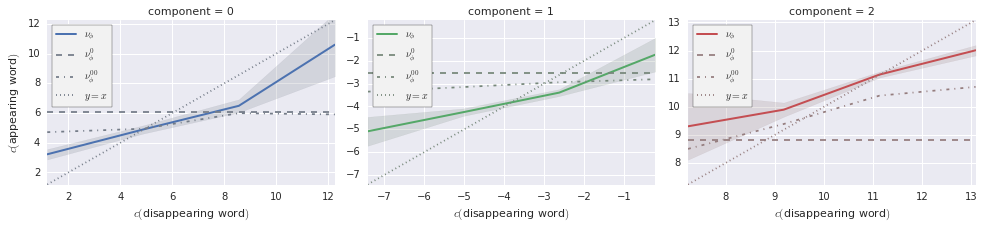

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1735 (cluster-unique) substitutions, but the PCA is in fact computed on 604 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.